In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
dir = 'image'
train_data = train_datagen.flow_from_directory(directory = dir ,target_size=(224,224) , batch_size=32 , seed=42)

Found 7470 images belonging to 1 classes.


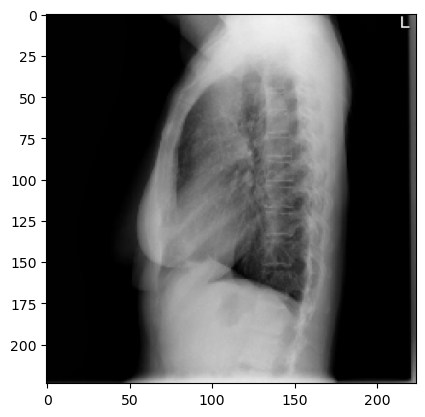

In [4]:
images , labels  = next(train_data)
import matplotlib.pyplot as plt
import random
plt.imshow(images[random.randint(1,31)])

In [5]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

In [6]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

df = pd.DataFrame() # initialize the dataframe
columns = ['image_id', 'caption', 'comparison', 'indication', 'findings', 'impression', 'height', 'width'] # define the columns
for file in tqdm(os.listdir("reports/")):
    if file.endswith(".xml"):
        k = "reports/"
        path =    k + file
        mytree = ET.parse(path)# parsing xml report
        
        comparison = mytree.find(".//AbstractText[@Label='COMPARISON']").text if mytree.find(".//AbstractText[@Label='COMPARISON']") is not None else '' # extracting comparison text
        indication = mytree.find(".//AbstractText[@Label='INDICATION']").text if mytree.find(".//AbstractText[@Label='INDICATION']") is not None else '' #extracting indication text
        findings = mytree.find(".//AbstractText[@Label='FINDINGS']").text if mytree.find(".//AbstractText[@Label='FINDINGS']") is not None else '' # extracting findings text
        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']").text if mytree.find(".//AbstractText[@Label='IMPRESSION']") is not None else ''  # extracting impression text


        for x in mytree.findall("parentImage"):
            image_id = x.attrib['id']+".png"
            filename = 'image/last_one/'+ image_id
            image = cv2.imread(filename) # reading image
            
            height, width, _ = image.shape # gets the height and width from the image
            

            caption = '' if x.find('caption') is None or x.find('caption').text is None else x.find('caption').text
            
            new_row = pd.Series([image_id, caption, comparison, indication, findings, impression, height, width], index=columns) # creates a series for the row

            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True) # concatenates the new row to the df

  0%|          | 0/3955 [00:00<?, ?it/s]

In [7]:
df

image_id  \
0     CXR1_1_IM-0001-3001.png   
1     CXR1_1_IM-0001-4001.png   
2      CXR10_IM-0002-1001.png   
3      CXR10_IM-0002-2001.png   
4     CXR100_IM-0002-1001.png   
...                       ...   
7465  CXR998_IM-2479-1001.png   
7466  CXR998_IM-2479-2001.png   
7467  CXR999_IM-2480-1001.png   
7468  CXR999_IM-2480-2001.png   
7469  CXR999_IM-2480-3001.png   

                                                caption  \
0                             Xray Chest PA and Lateral   
1                             Xray Chest PA and Lateral   
2                    PA and lateral chest x-XXXX XXXX.    
3                    PA and lateral chest x-XXXX XXXX.    
4          CHEST 2V FRONTAL/LATERAL XXXX, XXXX XXXX PM    
...                                                 ...   
7465  PA and lateral chest x-XXXX dated XXXX, XXXX a...   
7466  PA and lateral chest x-XXXX dated XXXX, XXXX a...   
7467  Chest Two views PA and lateral XXXX, XXXX XXXX...   
7468  Chest Two views PA and lateral XXXX, XXXX XXXX...   
7469  Chest Two views PA and lateral XXXX, XXXX XXXX...   

                   comparison                       indication  \
0                       None.                 Positive TB test   
1                       None.                 Positive TB test   
2     Chest radiographs XXXX.  XXXX-year-old male, chest pain.   
3     Chest radiographs XXXX.  XXXX-year-old male, chest pain.   
4                       None.                             None   
...                       ...                              ...   
7465                    None.    XXXX-year-old XXXX with pain.   
7466                    None.    XXXX-year-old XXXX with pain.   
7467                     None                       Chest pain   
7468                     None                       Chest pain   
7469                     None                       Chest pain   

                                               findings  \
0     The cardiac silhouette and mediastinum size ar...   
1     The cardiac silhouette and mediastinum size ar...   
2     The cardiomediastinal silhouette is within nor...   
3     The cardiomediastinal silhouette is within nor...   
4     Both lungs are clear and expanded. Heart and m...   
...                                                 ...   
7465  Cardiomediastinal silhouette demonstrates norm...   
7466  Cardiomediastinal silhouette demonstrates norm...   
7467  Lungs are clear bilaterally. There is no focal...   
7468  Lungs are clear bilaterally. There is no focal...   
7469  Lungs are clear bilaterally. There is no focal...   

                                 impression  height  width  
0                      Normal chest x-XXXX.     624    512  
1                      Normal chest x-XXXX.     420    512  
2         No acute cardiopulmonary process.     624    512  
3         No acute cardiopulmonary process.     420    512  
4                        No active disease.     420    512  
...                                     ...     ...    ...  
7465  No acute cardiopulmonary abnormality.     420    512  
7466  No acute cardiopulmonary abnormality.     624    512  
7467  No acute cardiopulmonary abnormality.     420    512  
7468  No acute cardiopulmonary abnormality.     624    512  
7469  No acute cardiopulmonary abnormality.     420    512  

[7470 rows x 8 columns]

In [8]:
len(df['impression'].unique())

1771

In [9]:
df['findings'].head(10)

0    The cardiac silhouette and mediastinum size ar...
1    The cardiac silhouette and mediastinum size ar...
2    The cardiomediastinal silhouette is within nor...
3    The cardiomediastinal silhouette is within nor...
4    Both lungs are clear and expanded. Heart and m...
5    Both lungs are clear and expanded. Heart and m...
6    There is XXXX increased opacity within the rig...
7    There is XXXX increased opacity within the rig...
8    There is XXXX increased opacity within the rig...
9    Interstitial markings are diffusely prominent ...
Name: findings, dtype: object

In [10]:
def absolute_path(image):
    str = 'image/last_one/' + image
    return str

df['image_path'] = df['image_id'].apply(lambda x : absolute_path(x))
df.head()

image_id                                        caption  \
0  CXR1_1_IM-0001-3001.png                      Xray Chest PA and Lateral   
1  CXR1_1_IM-0001-4001.png                      Xray Chest PA and Lateral   
2   CXR10_IM-0002-1001.png             PA and lateral chest x-XXXX XXXX.    
3   CXR10_IM-0002-2001.png             PA and lateral chest x-XXXX XXXX.    
4  CXR100_IM-0002-1001.png   CHEST 2V FRONTAL/LATERAL XXXX, XXXX XXXX PM    

                comparison                       indication  \
0                    None.                 Positive TB test   
1                    None.                 Positive TB test   
2  Chest radiographs XXXX.  XXXX-year-old male, chest pain.   
3  Chest radiographs XXXX.  XXXX-year-old male, chest pain.   
4                    None.                             None   

                                            findings  \
0  The cardiac silhouette and mediastinum size ar...   
1  The cardiac silhouette and mediastinum size ar...   
2  The cardiomediastinal silhouette is within nor...   
3  The cardiomediastinal silhouette is within nor...   
4  Both lungs are clear and expanded. Heart and m...   

                          impression  height  width  \
0               Normal chest x-XXXX.     624    512   
1               Normal chest x-XXXX.     420    512   
2  No acute cardiopulmonary process.     624    512   
3  No acute cardiopulmonary process.     420    512   
4                 No active disease.     420    512   

                               image_path  
0  image/last_one/CXR1_1_IM-0001-3001.png  
1  image/last_one/CXR1_1_IM-0001-4001.png  
2   image/last_one/CXR10_IM-0002-1001.png  
3   image/last_one/CXR10_IM-0002-2001.png  
4  image/last_one/CXR100_IM-0002-1001.png

In [11]:
data = df[['image_id' ,'findings', 'height' ,'impression', 'width' , 'image_path']]
data

image_id  \
0     CXR1_1_IM-0001-3001.png   
1     CXR1_1_IM-0001-4001.png   
2      CXR10_IM-0002-1001.png   
3      CXR10_IM-0002-2001.png   
4     CXR100_IM-0002-1001.png   
...                       ...   
7465  CXR998_IM-2479-1001.png   
7466  CXR998_IM-2479-2001.png   
7467  CXR999_IM-2480-1001.png   
7468  CXR999_IM-2480-2001.png   
7469  CXR999_IM-2480-3001.png   

                                               findings  height  \
0     The cardiac silhouette and mediastinum size ar...     624   
1     The cardiac silhouette and mediastinum size ar...     420   
2     The cardiomediastinal silhouette is within nor...     624   
3     The cardiomediastinal silhouette is within nor...     420   
4     Both lungs are clear and expanded. Heart and m...     420   
...                                                 ...     ...   
7465  Cardiomediastinal silhouette demonstrates norm...     420   
7466  Cardiomediastinal silhouette demonstrates norm...     624   
7467  Lungs are clear bilaterally. There is no focal...     420   
7468  Lungs are clear bilaterally. There is no focal...     624   
7469  Lungs are clear bilaterally. There is no focal...     420   

                                 impression  width  \
0                      Normal chest x-XXXX.    512   
1                      Normal chest x-XXXX.    512   
2         No acute cardiopulmonary process.    512   
3         No acute cardiopulmonary process.    512   
4                        No active disease.    512   
...                                     ...    ...   
7465  No acute cardiopulmonary abnormality.    512   
7466  No acute cardiopulmonary abnormality.    512   
7467  No acute cardiopulmonary abnormality.    512   
7468  No acute cardiopulmonary abnormality.    512   
7469  No acute cardiopulmonary abnormality.    512   

                                  image_path  
0     image/last_one/CXR1_1_IM-0001-3001.png  
1     image/last_one/CXR1_1_IM-0001-4001.png  
2      image/last_one/CXR10_IM-0002-1001.png  
3      image/last_one/CXR10_IM-0002-2001.png  
4     image/last_one/CXR100_IM-0002-1001.png  
...                                      ...  
7465  image/last_one/CXR998_IM-2479-1001.png  
7466  image/last_one/CXR998_IM-2479-2001.png  
7467  image/last_one/CXR999_IM-2480-1001.png  
7468  image/last_one/CXR999_IM-2480-2001.png  
7469  image/last_one/CXR999_IM-2480-3001.png  

[7470 rows x 6 columns]

In [12]:
data.isnull().sum()

image_id        0
findings      997
height          0
impression     52
width           0
image_path      0
dtype: int64

In [13]:
data['image_path'].sample(10)

566     image/last_one/CXR1273_IM-0183-1001.png
5947    image/last_one/CXR3873_IM-1965-1001.png
2085    image/last_one/CXR2008_IM-0658-2001.png
498     image/last_one/CXR1240_IM-0162-2001.png
2014    image/last_one/CXR1973_IM-0633-1001.png
2156    image/last_one/CXR2043_IM-0686-2001.png
3547    image/last_one/CXR2722_IM-1184-2001.png
1887    image/last_one/CXR1911_IM-0593-1002.png
3623    image/last_one/CXR2760_IM-1207-2001.png
2250     image/last_one/CXR209_IM-0721-1001.png
Name: image_path, dtype: object

In [14]:
data.dropna(inplace = True)

In [15]:
data.shape

(6461, 6)

In [16]:
data.isnull().sum()

image_id      0
findings      0
height        0
impression    0
width         0
image_path    0
dtype: int64

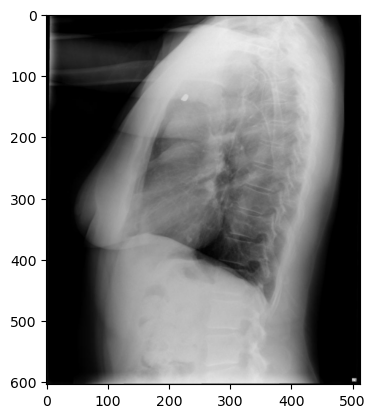

In [17]:
ele=random.randint(1 , 6472)
plt.figure()
img = cv2.imread(data['image_path'].values[ele])
plt.imshow(img)


In [18]:
images = {}
findings = {}

for img,fin,imp in data[['image_path','findings' , 'impression']].values:
    a = img.split('.')
    file_type = a[-1]
    a = a[0].split('-')
    a.pop(len(a)-1)
   
    a = ('-'.join(e for e in a))
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin+" " +imp
    else: 
        images[a] += 1
        findings[a] = fin+" "+imp
images 

{'image/last_one/CXR1_1_IM-0001': 2,
 'image/last_one/CXR10_IM-0002': 2,
 'image/last_one/CXR100_IM-0002': 2,
 'image/last_one/CXR1000_IM-0003': 3,
 'image/last_one/CXR1001_IM-0004': 2,
 'image/last_one/CXR1003_IM-0005': 1,
 'image/last_one/CXR1004_IM-0005': 2,
 'image/last_one/CXR1005_IM-0006': 2,
 'image/last_one/CXR1006_IM-0007': 2,
 'image/last_one/CXR1007_IM-0008': 3,
 'image/last_one/CXR1008_IM-0009': 2,
 'image/last_one/CXR1009_IM-0010': 2,
 'image/last_one/CXR101_IM-0011': 2,
 'image/last_one/CXR1010_IM-0012': 2,
 'image/last_one/CXR1011_IM-0013': 2,
 'image/last_one/CXR1012_IM-0013': 1,
 'image/last_one/CXR1013_IM-0013': 2,
 'image/last_one/CXR1015_IM-0001': 2,
 'image/last_one/CXR1015_IM-0013': 2,
 'image/last_one/CXR1017_IM-0013': 2,
 'image/last_one/CXR1018_IM-0014': 2,
 'image/last_one/CXR1019_IM-0015': 2,
 'image/last_one/CXR102_IM-0016': 2,
 'image/last_one/CXR1020_IM-0017': 2,
 'image/last_one/CXR1022_IM-0017': 2,
 'image/last_one/CXR1023_IM-0018': 2,
 'image/last_one/C

In [19]:
data.keys()

Index(['image_id', 'findings', 'height', 'impression', 'width', 'image_path'], dtype='object')

In [20]:
def train_test_split(data):
    persons = list(data.keys())
    persons_train = persons[:2500]
    persons_cv = persons[2500:3000]
    persons_test = persons[3000:3350]
    return persons_train, persons_cv, persons_test

images_train, images_cv, images_test = train_test_split(images)

In [21]:
findings

{'image/last_one/CXR1_1_IM-0001': 'The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.',
 'image/last_one/CXR10_IM-0002': 'The cardiomediastinal silhouette is within normal limits for size and contour. The lungs are normally inflated without evidence of focal airspace disease, pleural effusion, or pneumothorax. Stable calcified granuloma within the right upper lung. No acute bone abnormality.. No acute cardiopulmonary process.',
 'image/last_one/CXR100_IM-0002': 'Both lungs are clear and expanded. Heart and mediastinum normal. No active disease.',
 'image/last_one/CXR1000_IM-0003': 'There is XXXX increased opacity within the right upper lobe with possible mass and associated area of atelectasis or focal consolidation. The cardiac silhouette is within normal limits. XXXX opacity in the left midlung overlying t

In [22]:
def combining_images(image_set):
    image_per_person = defaultdict(list) 
    for pid in image_set:
        for img in data['image_path'].values:
            if pid in img:
                image_per_person[pid].append(img)
            else:
                continue
    return image_per_person

In [23]:
train_data = combining_images(images_train)
test_data = combining_images(images_test)
Cross_validation_data = combining_images(images_cv)
data2 = combining_images(images)
data2

defaultdict(list,
            {'image/last_one/CXR1_1_IM-0001': ['image/last_one/CXR1_1_IM-0001-3001.png',
              'image/last_one/CXR1_1_IM-0001-4001.png'],
             'image/last_one/CXR10_IM-0002': ['image/last_one/CXR10_IM-0002-1001.png',
              'image/last_one/CXR10_IM-0002-2001.png'],
             'image/last_one/CXR100_IM-0002': ['image/last_one/CXR100_IM-0002-1001.png',
              'image/last_one/CXR100_IM-0002-2001.png'],
             'image/last_one/CXR1000_IM-0003': ['image/last_one/CXR1000_IM-0003-1001.png',
              'image/last_one/CXR1000_IM-0003-2001.png',
              'image/last_one/CXR1000_IM-0003-3001.png'],
             'image/last_one/CXR1001_IM-0004': ['image/last_one/CXR1001_IM-0004-1001.png',
              'image/last_one/CXR1001_IM-0004-1002.png'],
             'image/last_one/CXR1003_IM-0005': ['image/last_one/CXR1003_IM-0005-2002.png'],
             'image/last_one/CXR1004_IM-0005': ['image/last_one/CXR1004_IM-0005-1001.png',
         

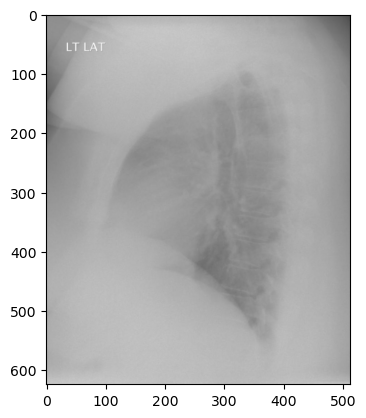

In [24]:
import cv2 
import matplotlib.pyplot as plt
plt.imshow(cv2.imread(train_data['image/last_one/CXR1222_IM-0150'][1]))

In [25]:
def show_images(filename):
    import matplotlib.pyplot as plt
    import cv2
    img = cv2.imread(filename)
    plt.imshow(img)


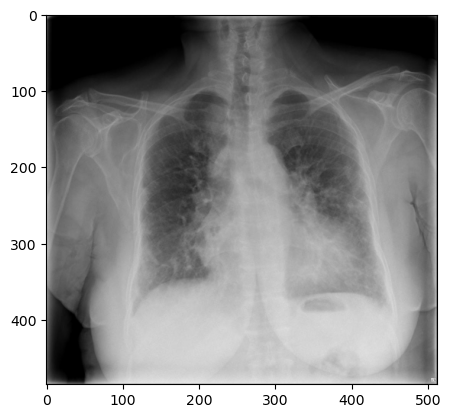

In [26]:
show_images('image/last_one/CXR1001_IM-0004-1001.png')

In [27]:
def show_images_of_person(person):
    for key in data2[person]:
        print(key)
        show_images(key)
        plt.figure()


image/last_one/CXR101_IM-0011-2001.png
image/last_one/CXR101_IM-0011-4004.png


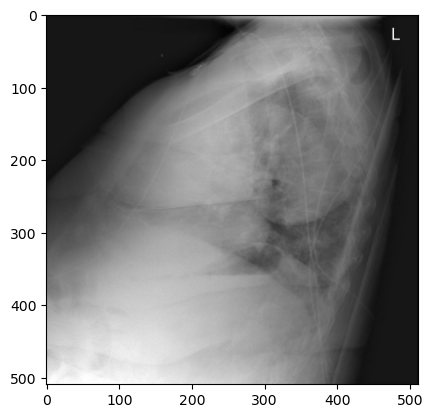

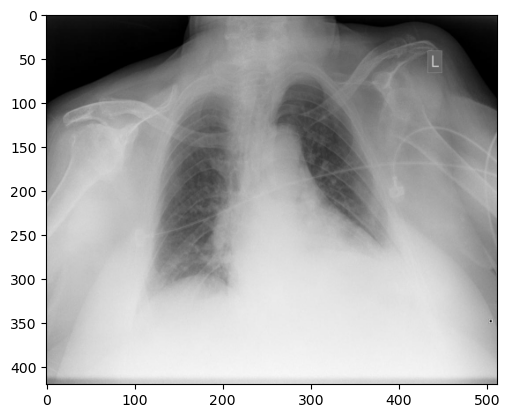

<Figure size 640x480 with 0 Axes>

In [28]:
show_images_of_person('image/last_one/CXR101_IM-0011')

In [29]:
import itertools
a = itertools.combinations(['a','b','c','d'], 2)
for i in a:
    print(i)

('a', 'b')
('a', 'c')
('a', 'd')
('b', 'c')
('b', 'd')
('c', 'd')


In [30]:
import itertools

def create_data(image_per_person):
    # new dataset
    person_id, image1, image2, report = [],[],[],[]
    for pid, imgs in image_per_person.items():   #contains pid and the images associated with that pid

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report
    
    return data

In [31]:
test = create_data(test_data)
train = create_data(train_data)
cross_validation = create_data(Cross_validation_data)

In [32]:
Report = np.array(test['Report'])

In [33]:
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

In [34]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

In [35]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return 'startseq' + ' ' + x + ' ' + 'endseq'

In [36]:
train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
cross_validation['Report'] = cross_validation['Report'].apply(lambda x : remodelling(x))

In [37]:
train['Report'] = text_preprocessing(train['Report'])
test['Report'] = text_preprocessing(test['Report'])
cross_validation['Report'] = text_preprocessing(cross_validation['Report'])

In [38]:
a=np.array(train['Report'])
a

array(['startseq the cardiac silhouette and mediastinum size are within normal limits .  there no pulmonary edema .  there no focal consolidation .  there are no pleural effusion .  there no evidence pneumothora .  normal chest endseq',
       'startseq the cardiomediastinal silhouette within normal limits for size and contour .  the lungs are normally inflated without evidence focal airspace disease pleural effusion pneumothora .  stable calcified granuloma within the right upper lung .  no acute bone abnormality .  no acute cardiopulmonary process .  endseq',
       'startseq both lungs are clear and epanded .  heart and mediastinum normal .  no active disease .  endseq',
       ...,
       'startseq stable cardiomediastinal silhouette .  pulmonary vascularity within normal limits .  lungs are epanded and clear airspace disease .  negative for pneumothora pleural effusion .  limited evaluation reveals the grossly intact .  no acute cardiopulmonary abnormality .  endseq',
       'star

# Making the model

In [39]:
import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import tensorflow as tf
import re
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [40]:
test = pd.read_csv('test1.csv')
train = pd.read_csv('train1.csv')
cross_validation = pd.read_csv('cross_validation1.csv')
train.drop(columns=['Unnamed: 0'] , inplace=True)
test.drop(columns=['Unnamed: 0'] , inplace=True)
cross_validation.drop(columns=['Unnamed: 0'] , inplace=True)

In [41]:
type(train)

pandas.core.frame.DataFrame

In [42]:
chexNet = densenet.DenseNet121(include_top=False, weights = None,   input_shape=(224,224,3), pooling="avg")
X = chexNet.output
X = Dense(14, activation="softmax", name="predictions")(X)
model = Model(inputs=chexNet.input, outputs=X)

In [43]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,051,854 (26.90 MB)

 Trainable params: 6,968,206 (26.58 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [44]:
model.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [45]:
chexNet = Model(inputs = model.input, outputs = model.layers[-2].output)

In [46]:
chexNet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [47]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


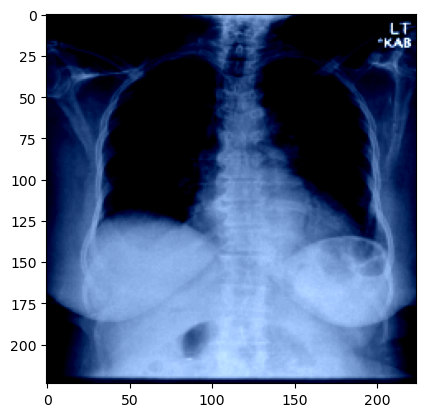

In [48]:
img = load_image('image/last_one/CXR1082_IM-0058-1001.png')
plt.figure()
plt.imshow(img[0])

In [49]:
Xnet_features = {}
for key, img1, img2, finding in tqdm(train.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1)    
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

for key, img1, img2, finding in tqdm(test.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1)    
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

for key, img1, img2, finding in tqdm(cross_validation.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1)    
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

  0%|                                                                                         | 0/2758 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  0%|                                                                               | 1/2758 [00:06<5:04:31,  6.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  0%|                                                                               | 2/2758 [00:07<2:19:26,  3.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  0%|                                                                               | 3/2758 [00:07<1:27:30,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  0%|                                                                               | 4/2758 [00:08<1:05:11,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  0%|▏                                                                                | 5/2758 [00:08<50:06,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  0%|▏                                                                                | 6/2758 [00:09<42:01,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  0%|▏                                                                                | 7/2758 [00:10<36:28,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  0%|▏                                                                                | 8/2758 [00:10<32:17,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  0%|▎                                                                                | 9/2758 [00:11<30:48,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  0%|▎                                                                               | 10/2758 [00:11<27:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  0%|▎                                                                               | 11/2758 [00:11<24:24,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  0%|▎                                                                               | 12/2758 [00:12<22:57,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  0%|▍                                                                               | 13/2758 [00:12<21:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  1%|▍                                                                               | 14/2758 [00:13<22:02,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  1%|▍                                                                               | 15/2758 [00:13<24:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  1%|▍                                                                               | 16/2758 [00:14<25:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  1%|▍                                                                               | 17/2758 [00:15<24:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  1%|▌                                                                               | 18/2758 [00:15<25:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  1%|▌                                                                               | 19/2758 [00:16<24:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  1%|▌                                                                               | 20/2758 [00:16<22:11,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  1%|▌                                                                               | 21/2758 [00:16<21:12,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  1%|▋                                                                               | 22/2758 [00:17<20:33,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  1%|▋                                                                               | 23/2758 [00:17<20:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  1%|▋                                                                               | 24/2758 [00:18<19:55,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  1%|▋                                                                               | 25/2758 [00:18<19:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  1%|▊                                                                               | 26/2758 [00:18<18:40,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  1%|▊                                                                               | 27/2758 [00:19<18:03,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  1%|▊                                                                               | 28/2758 [00:19<17:39,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  1%|▊                                                                               | 29/2758 [00:20<17:43,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  1%|▊                                                                               | 30/2758 [00:20<17:15,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  1%|▉                                                                               | 31/2758 [00:20<16:41,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  1%|▉                                                                               | 32/2758 [00:21<16:38,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  1%|▉                                                                               | 33/2758 [00:21<18:09,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  1%|▉                                                                               | 34/2758 [00:22<20:01,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  1%|█                                                                               | 35/2758 [00:22<19:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  1%|█                                                                               | 36/2758 [00:22<18:12,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  1%|█                                                                               | 37/2758 [00:23<18:18,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  1%|█                                                                               | 38/2758 [00:23<18:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  1%|█▏                                                                              | 39/2758 [00:24<18:07,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  1%|█▏                                                                              | 40/2758 [00:24<22:56,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  1%|█▏                                                                              | 41/2758 [00:25<21:51,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  2%|█▏                                                                              | 42/2758 [00:25<21:47,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  2%|█▏                                                                              | 43/2758 [00:26<20:57,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  2%|█▎                                                                              | 44/2758 [00:26<19:03,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  2%|█▎                                                                              | 45/2758 [00:26<18:14,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  2%|█▎                                                                              | 46/2758 [00:27<18:09,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  2%|█▎                                                                              | 47/2758 [00:27<17:40,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  2%|█▍                                                                              | 48/2758 [00:28<19:46,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


  2%|█▍                                                                              | 49/2758 [00:28<22:47,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  2%|█▍                                                                              | 50/2758 [00:29<24:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  2%|█▍                                                                              | 51/2758 [00:30<26:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  2%|█▌                                                                              | 52/2758 [00:31<30:21,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  2%|█▌                                                                              | 53/2758 [00:31<28:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  2%|█▌                                                                              | 54/2758 [00:32<29:27,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  2%|█▌                                                                              | 55/2758 [00:32<27:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  2%|█▌                                                                              | 56/2758 [00:33<30:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  2%|█▋                                                                              | 57/2758 [00:34<31:21,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  2%|█▋                                                                              | 58/2758 [00:34<29:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  2%|█▋                                                                              | 59/2758 [00:35<26:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  2%|█▋                                                                              | 60/2758 [00:35<24:28,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|█▊                                                                              | 61/2758 [00:36<22:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  2%|█▊                                                                              | 62/2758 [00:37<30:17,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  2%|█▊                                                                              | 63/2758 [00:37<26:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  2%|█▊                                                                              | 64/2758 [00:38<24:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  2%|█▉                                                                              | 65/2758 [00:38<24:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|█▉                                                                              | 66/2758 [00:39<24:40,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  2%|█▉                                                                              | 67/2758 [00:39<23:11,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  2%|█▉                                                                              | 68/2758 [00:39<20:57,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  3%|██                                                                              | 69/2758 [00:40<19:39,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  3%|██                                                                              | 70/2758 [00:40<18:31,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  3%|██                                                                              | 71/2758 [00:41<19:41,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  3%|██                                                                              | 72/2758 [00:41<20:23,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|██                                                                              | 73/2758 [00:42<21:52,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  3%|██▏                                                                             | 74/2758 [00:42<23:07,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  3%|██▏                                                                             | 75/2758 [00:43<22:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  3%|██▏                                                                             | 76/2758 [00:43<20:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  3%|██▏                                                                             | 77/2758 [00:44<19:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  3%|██▎                                                                             | 78/2758 [00:44<22:50,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  3%|██▎                                                                             | 79/2758 [00:45<23:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  3%|██▎                                                                             | 80/2758 [00:45<23:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  3%|██▎                                                                             | 81/2758 [00:46<22:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|██▍                                                                             | 82/2758 [00:46<24:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  3%|██▍                                                                             | 83/2758 [00:47<22:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  3%|██▍                                                                             | 84/2758 [00:47<20:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  3%|██▍                                                                             | 85/2758 [00:48<19:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  3%|██▍                                                                             | 86/2758 [00:48<18:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  3%|██▌                                                                             | 87/2758 [00:48<18:45,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  3%|██▌                                                                             | 88/2758 [00:49<19:46,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  3%|██▌                                                                             | 89/2758 [00:50<23:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  3%|██▌                                                                             | 90/2758 [00:50<23:05,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  3%|██▋                                                                             | 91/2758 [00:51<22:39,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  3%|██▋                                                                             | 92/2758 [00:51<22:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  3%|██▋                                                                             | 93/2758 [00:52<21:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  3%|██▋                                                                             | 94/2758 [00:52<20:07,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  3%|██▊                                                                             | 95/2758 [00:52<18:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  3%|██▊                                                                             | 96/2758 [00:53<18:23,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  4%|██▊                                                                             | 97/2758 [00:53<17:59,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  4%|██▊                                                                             | 98/2758 [00:53<17:42,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|██▊                                                                             | 99/2758 [00:54<17:20,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|██▊                                                                            | 100/2758 [00:54<16:36,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  4%|██▉                                                                            | 101/2758 [00:55<16:49,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|██▉                                                                            | 102/2758 [00:55<17:32,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  4%|██▉                                                                            | 103/2758 [00:56<19:44,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  4%|██▉                                                                            | 104/2758 [00:56<23:11,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  4%|███                                                                            | 105/2758 [00:57<25:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  4%|███                                                                            | 106/2758 [00:58<25:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|███                                                                            | 107/2758 [00:58<23:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|███                                                                            | 108/2758 [00:58<20:49,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  4%|███                                                                            | 109/2758 [00:59<19:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  4%|███▏                                                                           | 110/2758 [00:59<18:50,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|███▏                                                                           | 111/2758 [00:59<17:34,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|███▏                                                                           | 112/2758 [01:00<16:47,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  4%|███▏                                                                           | 113/2758 [01:00<16:30,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|███▎                                                                           | 114/2758 [01:00<16:04,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  4%|███▎                                                                           | 115/2758 [01:01<16:26,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|███▎                                                                           | 116/2758 [01:01<16:11,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|███▎                                                                           | 117/2758 [01:02<15:52,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|███▍                                                                           | 118/2758 [01:02<15:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|███▍                                                                           | 119/2758 [01:02<15:12,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|███▍                                                                           | 120/2758 [01:03<15:15,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|███▍                                                                           | 121/2758 [01:03<15:49,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  4%|███▍                                                                           | 122/2758 [01:03<16:01,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  4%|███▌                                                                           | 123/2758 [01:04<16:40,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|███▌                                                                           | 124/2758 [01:04<16:47,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  5%|███▌                                                                           | 125/2758 [01:04<16:15,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  5%|███▌                                                                           | 126/2758 [01:05<16:00,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|███▋                                                                           | 127/2758 [01:05<15:58,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|███▋                                                                           | 128/2758 [01:05<15:42,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|███▋                                                                           | 129/2758 [01:06<15:50,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|███▋                                                                           | 130/2758 [01:06<15:43,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  5%|███▊                                                                           | 131/2758 [01:07<15:45,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  5%|███▊                                                                           | 132/2758 [01:07<16:13,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|███▊                                                                           | 133/2758 [01:07<15:40,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|███▊                                                                           | 134/2758 [01:08<15:20,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  5%|███▊                                                                           | 135/2758 [01:08<15:13,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|███▉                                                                           | 136/2758 [01:08<15:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  5%|███▉                                                                           | 137/2758 [01:09<15:09,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|███▉                                                                           | 138/2758 [01:09<15:50,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|███▉                                                                           | 139/2758 [01:09<15:46,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|████                                                                           | 140/2758 [01:10<15:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|████                                                                           | 141/2758 [01:10<15:19,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  5%|████                                                                           | 142/2758 [01:10<14:51,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|████                                                                           | 143/2758 [01:11<15:05,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|████                                                                           | 144/2758 [01:11<15:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|████▏                                                                          | 145/2758 [01:11<14:55,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|████▏                                                                          | 146/2758 [01:12<14:56,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|████▏                                                                          | 147/2758 [01:12<15:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|████▏                                                                          | 148/2758 [01:12<14:49,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  5%|████▎                                                                          | 149/2758 [01:13<15:06,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|████▎                                                                          | 150/2758 [01:13<15:36,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|████▎                                                                          | 151/2758 [01:14<15:25,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|████▎                                                                          | 152/2758 [01:14<15:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|████▍                                                                          | 153/2758 [01:14<15:30,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  6%|████▍                                                                          | 154/2758 [01:15<15:19,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|████▍                                                                          | 155/2758 [01:15<15:36,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  6%|████▍                                                                          | 156/2758 [01:15<15:41,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|████▍                                                                          | 157/2758 [01:16<15:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|████▌                                                                          | 158/2758 [01:16<15:13,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|████▌                                                                          | 159/2758 [01:16<15:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|████▌                                                                          | 160/2758 [01:17<14:54,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  6%|████▌                                                                          | 161/2758 [01:17<15:09,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|████▋                                                                          | 162/2758 [01:17<15:07,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|████▋                                                                          | 163/2758 [01:18<15:15,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|████▋                                                                          | 164/2758 [01:18<14:56,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|████▋                                                                          | 165/2758 [01:18<14:47,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|████▊                                                                          | 166/2758 [01:19<14:48,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|████▊                                                                          | 167/2758 [01:19<14:47,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|████▊                                                                          | 168/2758 [01:20<15:03,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|████▊                                                                          | 169/2758 [01:20<15:06,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|████▊                                                                          | 170/2758 [01:20<14:56,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  6%|████▉                                                                          | 171/2758 [01:21<14:56,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|████▉                                                                          | 172/2758 [01:21<15:17,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|████▉                                                                          | 173/2758 [01:21<15:06,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|████▉                                                                          | 174/2758 [01:22<15:17,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|█████                                                                          | 175/2758 [01:22<15:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|█████                                                                          | 176/2758 [01:22<15:05,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|█████                                                                          | 177/2758 [01:23<14:45,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|█████                                                                          | 178/2758 [01:23<14:51,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|█████▏                                                                         | 179/2758 [01:23<14:35,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  7%|█████▏                                                                         | 180/2758 [01:24<15:29,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|█████▏                                                                         | 181/2758 [01:24<15:27,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|█████▏                                                                         | 182/2758 [01:24<15:22,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  7%|█████▏                                                                         | 183/2758 [01:25<15:26,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|█████▎                                                                         | 184/2758 [01:25<15:05,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|█████▎                                                                         | 185/2758 [01:26<15:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  7%|█████▎                                                                         | 186/2758 [01:26<15:41,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|█████▎                                                                         | 187/2758 [01:26<15:39,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|█████▍                                                                         | 188/2758 [01:27<15:31,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|█████▍                                                                         | 189/2758 [01:27<15:32,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|█████▍                                                                         | 190/2758 [01:27<15:12,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|█████▍                                                                         | 191/2758 [01:28<15:30,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|█████▍                                                                         | 192/2758 [01:28<15:33,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|█████▌                                                                         | 193/2758 [01:28<15:11,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|█████▌                                                                         | 194/2758 [01:29<14:50,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|█████▌                                                                         | 195/2758 [01:29<14:54,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|█████▌                                                                         | 196/2758 [01:29<14:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|█████▋                                                                         | 197/2758 [01:30<15:13,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|█████▋                                                                         | 198/2758 [01:30<15:17,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|█████▋                                                                         | 199/2758 [01:31<14:49,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|█████▋                                                                         | 200/2758 [01:31<14:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|█████▊                                                                         | 201/2758 [01:31<14:54,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  7%|█████▊                                                                         | 202/2758 [01:32<15:17,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  7%|█████▊                                                                         | 203/2758 [01:32<15:40,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  7%|█████▊                                                                         | 204/2758 [01:32<15:30,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  7%|█████▊                                                                         | 205/2758 [01:33<15:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|█████▉                                                                         | 206/2758 [01:33<15:05,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  8%|█████▉                                                                         | 207/2758 [01:33<15:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|█████▉                                                                         | 208/2758 [01:34<14:56,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|█████▉                                                                         | 209/2758 [01:34<15:28,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|██████                                                                         | 210/2758 [01:34<15:11,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|██████                                                                         | 211/2758 [01:35<14:53,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|██████                                                                         | 212/2758 [01:35<15:00,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|██████                                                                         | 213/2758 [01:35<14:47,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  8%|██████▏                                                                        | 214/2758 [01:36<15:13,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|██████▏                                                                        | 215/2758 [01:36<15:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|██████▏                                                                        | 216/2758 [01:37<15:03,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|██████▏                                                                        | 217/2758 [01:37<14:51,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|██████▏                                                                        | 218/2758 [01:37<14:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|██████▎                                                                        | 219/2758 [01:38<14:46,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|██████▎                                                                        | 220/2758 [01:38<14:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|██████▎                                                                        | 221/2758 [01:38<15:34,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|██████▎                                                                        | 222/2758 [01:39<15:50,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|██████▍                                                                        | 223/2758 [01:39<15:20,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|██████▍                                                                        | 224/2758 [01:39<15:00,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|██████▍                                                                        | 225/2758 [01:40<15:12,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|██████▍                                                                        | 226/2758 [01:40<15:57,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|██████▌                                                                        | 227/2758 [01:41<15:58,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  8%|██████▌                                                                        | 228/2758 [01:41<16:00,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|██████▌                                                                        | 229/2758 [01:41<16:11,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|██████▌                                                                        | 230/2758 [01:42<16:16,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  8%|██████▌                                                                        | 231/2758 [01:42<16:24,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|██████▋                                                                        | 232/2758 [01:43<16:11,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|██████▋                                                                        | 233/2758 [01:43<16:05,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|██████▋                                                                        | 234/2758 [01:43<15:38,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|██████▋                                                                        | 235/2758 [01:44<15:38,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|██████▊                                                                        | 236/2758 [01:44<15:27,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|██████▊                                                                        | 237/2758 [01:44<15:44,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|██████▊                                                                        | 238/2758 [01:45<15:19,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|██████▊                                                                        | 239/2758 [01:45<15:02,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|██████▊                                                                        | 240/2758 [01:45<15:04,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  9%|██████▉                                                                        | 241/2758 [01:46<15:15,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  9%|██████▉                                                                        | 242/2758 [01:46<15:15,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|██████▉                                                                        | 243/2758 [01:47<15:27,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|██████▉                                                                        | 244/2758 [01:47<15:04,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|███████                                                                        | 245/2758 [01:47<14:47,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|███████                                                                        | 246/2758 [01:48<14:41,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|███████                                                                        | 247/2758 [01:48<14:41,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  9%|███████                                                                        | 248/2758 [01:48<15:14,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|███████▏                                                                       | 249/2758 [01:49<14:55,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|███████▏                                                                       | 250/2758 [01:49<14:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|███████▏                                                                       | 251/2758 [01:49<14:31,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|███████▏                                                                       | 252/2758 [01:50<14:30,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|███████▏                                                                       | 253/2758 [01:50<14:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|███████▎                                                                       | 254/2758 [01:50<14:53,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|███████▎                                                                       | 255/2758 [01:51<14:43,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|███████▎                                                                       | 256/2758 [01:51<14:25,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|███████▎                                                                       | 257/2758 [01:51<14:45,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|███████▍                                                                       | 258/2758 [01:52<14:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  9%|███████▍                                                                       | 259/2758 [01:52<14:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|███████▍                                                                       | 260/2758 [01:53<15:06,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|███████▍                                                                       | 261/2758 [01:53<14:58,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|███████▌                                                                       | 262/2758 [01:53<14:42,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 10%|███████▌                                                                       | 263/2758 [01:54<14:30,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|███████▌                                                                       | 264/2758 [01:54<14:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 10%|███████▌                                                                       | 265/2758 [01:54<14:53,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|███████▌                                                                       | 266/2758 [01:55<14:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 10%|███████▋                                                                       | 267/2758 [01:55<14:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|███████▋                                                                       | 268/2758 [01:55<14:17,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|███████▋                                                                       | 269/2758 [01:56<14:26,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 10%|███████▋                                                                       | 270/2758 [01:56<14:29,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|███████▊                                                                       | 271/2758 [01:56<15:02,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|███████▊                                                                       | 272/2758 [01:57<14:36,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 10%|███████▊                                                                       | 273/2758 [01:57<14:44,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|███████▊                                                                       | 274/2758 [01:57<14:36,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|███████▉                                                                       | 275/2758 [01:58<14:44,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 10%|███████▉                                                                       | 276/2758 [01:58<14:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|███████▉                                                                       | 277/2758 [01:59<15:19,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 10%|███████▉                                                                       | 278/2758 [01:59<15:18,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 10%|███████▉                                                                       | 279/2758 [01:59<15:20,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 10%|████████                                                                       | 280/2758 [02:00<15:22,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 10%|████████                                                                       | 281/2758 [02:00<15:13,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|████████                                                                       | 282/2758 [02:01<15:44,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 10%|████████                                                                       | 283/2758 [02:01<15:14,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 10%|████████▏                                                                      | 284/2758 [02:01<15:05,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|████████▏                                                                      | 285/2758 [02:02<14:52,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|████████▏                                                                      | 286/2758 [02:02<14:25,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 10%|████████▏                                                                      | 287/2758 [02:02<14:48,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|████████▏                                                                      | 288/2758 [02:03<14:51,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|████████▎                                                                      | 289/2758 [02:03<14:24,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|████████▎                                                                      | 290/2758 [02:03<14:19,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 11%|████████▎                                                                      | 291/2758 [02:04<14:19,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 11%|████████▎                                                                      | 292/2758 [02:04<14:08,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 11%|████████▍                                                                      | 293/2758 [02:04<14:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|████████▍                                                                      | 294/2758 [02:05<14:39,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 11%|████████▍                                                                      | 295/2758 [02:05<15:29,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|████████▍                                                                      | 296/2758 [02:05<15:06,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|████████▌                                                                      | 297/2758 [02:06<14:51,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 11%|████████▌                                                                      | 298/2758 [02:06<15:18,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 11%|████████▌                                                                      | 299/2758 [02:07<15:12,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|████████▌                                                                      | 300/2758 [02:07<15:03,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 11%|████████▌                                                                      | 301/2758 [02:07<14:55,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 11%|████████▋                                                                      | 302/2758 [02:08<14:48,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|████████▋                                                                      | 303/2758 [02:08<14:41,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 11%|████████▋                                                                      | 304/2758 [02:08<14:59,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 11%|████████▋                                                                      | 305/2758 [02:09<14:52,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|████████▊                                                                      | 306/2758 [02:09<14:32,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|████████▊                                                                      | 307/2758 [02:09<14:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 11%|████████▊                                                                      | 308/2758 [02:10<14:04,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|████████▊                                                                      | 309/2758 [02:10<13:56,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 11%|████████▉                                                                      | 310/2758 [02:10<14:27,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|████████▉                                                                      | 311/2758 [02:11<14:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 11%|████████▉                                                                      | 312/2758 [02:11<14:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|████████▉                                                                      | 313/2758 [02:12<14:01,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|████████▉                                                                      | 314/2758 [02:12<13:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█████████                                                                      | 315/2758 [02:12<13:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 11%|█████████                                                                      | 316/2758 [02:13<14:51,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█████████                                                                      | 317/2758 [02:13<14:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█████████                                                                      | 318/2758 [02:13<14:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█████████▏                                                                     | 319/2758 [02:14<14:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█████████▏                                                                     | 320/2758 [02:14<13:52,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 12%|█████████▏                                                                     | 321/2758 [02:14<13:56,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 12%|█████████▏                                                                     | 322/2758 [02:15<14:16,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█████████▎                                                                     | 323/2758 [02:15<14:22,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 12%|█████████▎                                                                     | 324/2758 [02:15<14:25,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 12%|█████████▎                                                                     | 325/2758 [02:16<14:16,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█████████▎                                                                     | 326/2758 [02:16<13:53,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 12%|█████████▎                                                                     | 327/2758 [02:16<14:01,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█████████▍                                                                     | 328/2758 [02:17<14:12,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█████████▍                                                                     | 329/2758 [02:17<14:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█████████▍                                                                     | 330/2758 [02:17<14:03,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█████████▍                                                                     | 331/2758 [02:18<14:20,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█████████▌                                                                     | 332/2758 [02:18<14:00,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█████████▌                                                                     | 333/2758 [02:19<14:37,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 12%|█████████▌                                                                     | 334/2758 [02:19<14:30,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█████████▌                                                                     | 335/2758 [02:19<14:25,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█████████▌                                                                     | 336/2758 [02:20<14:11,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 12%|█████████▋                                                                     | 337/2758 [02:20<14:27,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█████████▋                                                                     | 338/2758 [02:20<14:32,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█████████▋                                                                     | 339/2758 [02:21<14:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█████████▋                                                                     | 340/2758 [02:21<14:56,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█████████▊                                                                     | 341/2758 [02:21<14:30,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█████████▊                                                                     | 342/2758 [02:22<14:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█████████▊                                                                     | 343/2758 [02:22<14:27,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 12%|█████████▊                                                                     | 344/2758 [02:23<14:49,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█████████▉                                                                     | 345/2758 [02:23<14:31,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|█████████▉                                                                     | 346/2758 [02:23<14:36,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█████████▉                                                                     | 347/2758 [02:24<14:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█████████▉                                                                     | 348/2758 [02:24<13:57,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|█████████▉                                                                     | 349/2758 [02:24<14:07,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|██████████                                                                     | 350/2758 [02:25<14:20,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|██████████                                                                     | 351/2758 [02:25<14:11,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|██████████                                                                     | 352/2758 [02:25<14:22,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|██████████                                                                     | 353/2758 [02:26<14:19,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 13%|██████████▏                                                                    | 354/2758 [02:26<14:11,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 13%|██████████▏                                                                    | 355/2758 [02:26<14:25,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 13%|██████████▏                                                                    | 356/2758 [02:27<14:30,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 13%|██████████▏                                                                    | 357/2758 [02:27<14:12,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|██████████▎                                                                    | 358/2758 [02:27<14:16,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 13%|██████████▎                                                                    | 359/2758 [02:28<13:58,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|██████████▎                                                                    | 360/2758 [02:28<13:57,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|██████████▎                                                                    | 361/2758 [02:29<14:13,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 13%|██████████▎                                                                    | 362/2758 [02:29<14:42,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 13%|██████████▍                                                                    | 363/2758 [02:29<14:34,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|██████████▍                                                                    | 364/2758 [02:30<14:07,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 13%|██████████▍                                                                    | 365/2758 [02:30<13:56,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|██████████▍                                                                    | 366/2758 [02:30<13:53,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 13%|██████████▌                                                                    | 367/2758 [02:31<13:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 13%|██████████▌                                                                    | 368/2758 [02:31<14:14,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|██████████▌                                                                    | 369/2758 [02:31<14:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|██████████▌                                                                    | 370/2758 [02:32<14:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|██████████▋                                                                    | 371/2758 [02:32<14:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 13%|██████████▋                                                                    | 372/2758 [02:32<14:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 14%|██████████▋                                                                    | 373/2758 [02:33<14:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 14%|██████████▋                                                                    | 374/2758 [02:33<14:26,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|██████████▋                                                                    | 375/2758 [02:34<14:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 14%|██████████▊                                                                    | 376/2758 [02:34<14:20,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|██████████▊                                                                    | 377/2758 [02:34<14:06,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|██████████▊                                                                    | 378/2758 [02:35<13:58,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|██████████▊                                                                    | 379/2758 [02:35<14:12,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 14%|██████████▉                                                                    | 380/2758 [02:35<14:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|██████████▉                                                                    | 381/2758 [02:36<13:45,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|██████████▉                                                                    | 382/2758 [02:36<13:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 14%|██████████▉                                                                    | 383/2758 [02:36<13:39,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|██████████▉                                                                    | 384/2758 [02:37<13:23,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 14%|███████████                                                                    | 385/2758 [02:37<13:58,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 14%|███████████                                                                    | 386/2758 [02:37<14:02,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|███████████                                                                    | 387/2758 [02:38<13:58,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|███████████                                                                    | 388/2758 [02:38<13:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|███████████▏                                                                   | 389/2758 [02:38<13:27,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 14%|███████████▏                                                                   | 390/2758 [02:39<13:25,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 14%|███████████▏                                                                   | 391/2758 [02:39<14:00,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 14%|███████████▏                                                                   | 392/2758 [02:39<14:00,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|███████████▎                                                                   | 393/2758 [02:40<13:44,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|███████████▎                                                                   | 394/2758 [02:40<13:38,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 14%|███████████▎                                                                   | 395/2758 [02:41<13:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|███████████▎                                                                   | 396/2758 [02:41<13:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|███████████▎                                                                   | 397/2758 [02:41<14:10,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 14%|███████████▍                                                                   | 398/2758 [02:42<13:58,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|███████████▍                                                                   | 399/2758 [02:42<14:08,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|███████████▍                                                                   | 400/2758 [02:42<13:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|███████████▍                                                                   | 401/2758 [02:43<13:50,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|███████████▌                                                                   | 402/2758 [02:43<13:56,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 15%|███████████▌                                                                   | 403/2758 [02:43<14:13,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|███████████▌                                                                   | 404/2758 [02:44<13:55,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|███████████▌                                                                   | 405/2758 [02:44<13:37,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|███████████▋                                                                   | 406/2758 [02:44<13:33,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|███████████▋                                                                   | 407/2758 [02:45<13:41,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|███████████▋                                                                   | 408/2758 [02:45<13:41,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 15%|███████████▋                                                                   | 409/2758 [02:45<13:48,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|███████████▋                                                                   | 410/2758 [02:46<13:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|███████████▊                                                                   | 411/2758 [02:46<13:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 15%|███████████▊                                                                   | 412/2758 [02:46<13:29,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|███████████▊                                                                   | 413/2758 [02:47<13:05,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|███████████▊                                                                   | 414/2758 [02:47<13:45,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|███████████▉                                                                   | 415/2758 [02:48<13:31,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|███████████▉                                                                   | 416/2758 [02:48<13:26,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|███████████▉                                                                   | 417/2758 [02:48<13:12,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|███████████▉                                                                   | 418/2758 [02:49<13:16,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|████████████                                                                   | 419/2758 [02:49<13:12,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|████████████                                                                   | 420/2758 [02:49<13:35,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|████████████                                                                   | 421/2758 [02:50<14:00,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|████████████                                                                   | 422/2758 [02:50<13:45,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|████████████                                                                   | 423/2758 [02:50<13:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|████████████▏                                                                  | 424/2758 [02:51<13:27,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|████████████▏                                                                  | 425/2758 [02:51<13:09,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 15%|████████████▏                                                                  | 426/2758 [02:51<13:43,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 15%|████████████▏                                                                  | 427/2758 [02:52<13:35,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 16%|████████████▎                                                                  | 428/2758 [02:52<13:37,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|████████████▎                                                                  | 429/2758 [02:52<13:27,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 16%|████████████▎                                                                  | 430/2758 [02:53<13:25,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 16%|████████████▎                                                                  | 431/2758 [02:53<13:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 16%|████████████▎                                                                  | 432/2758 [02:54<14:11,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 16%|████████████▍                                                                  | 433/2758 [02:54<13:55,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 16%|████████████▍                                                                  | 434/2758 [02:54<13:56,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 16%|████████████▍                                                                  | 435/2758 [02:55<13:56,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 16%|████████████▍                                                                  | 436/2758 [02:55<13:33,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 16%|████████████▌                                                                  | 437/2758 [02:55<13:39,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|████████████▌                                                                  | 438/2758 [02:56<13:43,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 16%|████████████▌                                                                  | 439/2758 [02:56<13:18,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 16%|████████████▌                                                                  | 440/2758 [02:56<13:31,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 16%|████████████▋                                                                  | 441/2758 [02:57<13:32,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|████████████▋                                                                  | 442/2758 [02:57<13:14,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|████████████▋                                                                  | 443/2758 [02:57<13:37,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|████████████▋                                                                  | 444/2758 [02:58<13:57,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|████████████▋                                                                  | 445/2758 [02:58<13:54,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|████████████▊                                                                  | 446/2758 [02:58<13:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|████████████▊                                                                  | 447/2758 [02:59<13:30,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 16%|████████████▊                                                                  | 448/2758 [02:59<13:30,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|████████████▊                                                                  | 449/2758 [03:00<13:45,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|████████████▉                                                                  | 450/2758 [03:00<13:34,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 16%|████████████▉                                                                  | 451/2758 [03:00<13:46,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|████████████▉                                                                  | 452/2758 [03:01<13:45,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 16%|████████████▉                                                                  | 453/2758 [03:01<13:38,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 16%|█████████████                                                                  | 454/2758 [03:01<13:42,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|█████████████                                                                  | 455/2758 [03:02<13:58,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█████████████                                                                  | 456/2758 [03:02<13:25,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█████████████                                                                  | 457/2758 [03:02<13:24,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 17%|█████████████                                                                  | 458/2758 [03:03<13:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 17%|█████████████▏                                                                 | 459/2758 [03:03<13:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 17%|█████████████▏                                                                 | 460/2758 [03:03<13:28,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 17%|█████████████▏                                                                 | 461/2758 [03:04<13:30,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 17%|█████████████▏                                                                 | 462/2758 [03:04<13:42,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 17%|█████████████▎                                                                 | 463/2758 [03:04<13:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 17%|█████████████▎                                                                 | 464/2758 [03:05<13:13,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 17%|█████████████▎                                                                 | 465/2758 [03:05<13:31,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 17%|█████████████▎                                                                 | 466/2758 [03:06<13:49,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█████████████▍                                                                 | 467/2758 [03:06<13:40,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 17%|█████████████▍                                                                 | 468/2758 [03:06<13:32,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█████████████▍                                                                 | 469/2758 [03:07<13:24,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 17%|█████████████▍                                                                 | 470/2758 [03:07<13:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 17%|█████████████▍                                                                 | 471/2758 [03:07<13:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 17%|█████████████▌                                                                 | 472/2758 [03:08<13:25,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 17%|█████████████▌                                                                 | 473/2758 [03:08<13:21,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█████████████▌                                                                 | 474/2758 [03:08<13:35,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 17%|█████████████▌                                                                 | 475/2758 [03:09<13:38,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 17%|█████████████▋                                                                 | 476/2758 [03:09<13:38,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 17%|█████████████▋                                                                 | 477/2758 [03:09<13:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 17%|█████████████▋                                                                 | 478/2758 [03:10<14:03,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 17%|█████████████▋                                                                 | 479/2758 [03:10<13:38,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 17%|█████████████▋                                                                 | 480/2758 [03:11<13:44,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 17%|█████████████▊                                                                 | 481/2758 [03:11<13:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 17%|█████████████▊                                                                 | 482/2758 [03:11<13:10,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 18%|█████████████▊                                                                 | 483/2758 [03:12<13:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█████████████▊                                                                 | 484/2758 [03:12<13:26,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█████████████▉                                                                 | 485/2758 [03:12<13:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|█████████████▉                                                                 | 486/2758 [03:13<13:14,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█████████████▉                                                                 | 487/2758 [03:13<13:03,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█████████████▉                                                                 | 488/2758 [03:13<12:46,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 18%|██████████████                                                                 | 489/2758 [03:14<13:19,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|██████████████                                                                 | 490/2758 [03:14<13:27,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|██████████████                                                                 | 491/2758 [03:14<13:27,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|██████████████                                                                 | 492/2758 [03:15<13:23,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|██████████████                                                                 | 493/2758 [03:15<12:55,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|██████████████▏                                                                | 494/2758 [03:15<12:50,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 18%|██████████████▏                                                                | 495/2758 [03:16<13:02,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|██████████████▏                                                                | 496/2758 [03:16<13:01,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|██████████████▏                                                                | 497/2758 [03:16<13:20,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|██████████████▎                                                                | 498/2758 [03:17<13:22,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|██████████████▎                                                                | 499/2758 [03:17<13:08,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|██████████████▎                                                                | 500/2758 [03:17<13:01,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 18%|██████████████▎                                                                | 501/2758 [03:18<13:30,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 18%|██████████████▍                                                                | 502/2758 [03:18<13:47,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|██████████████▍                                                                | 503/2758 [03:19<13:26,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|██████████████▍                                                                | 504/2758 [03:19<13:37,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|██████████████▍                                                                | 505/2758 [03:19<13:05,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|██████████████▍                                                                | 506/2758 [03:20<13:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|██████████████▌                                                                | 507/2758 [03:20<13:23,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|██████████████▌                                                                | 508/2758 [03:20<13:03,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|██████████████▌                                                                | 509/2758 [03:21<13:01,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|██████████████▌                                                                | 510/2758 [03:21<13:00,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|██████████████▋                                                                | 511/2758 [03:21<12:46,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|██████████████▋                                                                | 512/2758 [03:22<12:53,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|██████████████▋                                                                | 513/2758 [03:22<13:08,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|██████████████▋                                                                | 514/2758 [03:22<12:57,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 19%|██████████████▊                                                                | 515/2758 [03:23<13:03,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 19%|██████████████▊                                                                | 516/2758 [03:23<12:55,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|██████████████▊                                                                | 517/2758 [03:23<12:55,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|██████████████▊                                                                | 518/2758 [03:24<13:20,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 19%|██████████████▊                                                                | 519/2758 [03:24<13:23,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 19%|██████████████▉                                                                | 520/2758 [03:25<13:14,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|██████████████▉                                                                | 521/2758 [03:25<13:05,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|██████████████▉                                                                | 522/2758 [03:25<12:51,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 19%|██████████████▉                                                                | 523/2758 [03:26<12:49,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|███████████████                                                                | 524/2758 [03:26<13:11,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|███████████████                                                                | 525/2758 [03:26<12:57,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 19%|███████████████                                                                | 526/2758 [03:27<12:57,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|███████████████                                                                | 527/2758 [03:27<12:45,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|███████████████                                                                | 528/2758 [03:27<12:38,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|███████████████▏                                                               | 529/2758 [03:28<12:53,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|███████████████▏                                                               | 530/2758 [03:28<13:31,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 19%|███████████████▏                                                               | 531/2758 [03:28<13:18,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|███████████████▏                                                               | 532/2758 [03:29<13:03,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|███████████████▎                                                               | 533/2758 [03:29<13:08,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 19%|███████████████▎                                                               | 534/2758 [03:29<13:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 19%|███████████████▎                                                               | 535/2758 [03:30<13:19,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|███████████████▎                                                               | 536/2758 [03:30<13:17,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 19%|███████████████▍                                                               | 537/2758 [03:30<13:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|███████████████▍                                                               | 538/2758 [03:31<12:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 20%|███████████████▍                                                               | 539/2758 [03:31<12:32,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 20%|███████████████▍                                                               | 540/2758 [03:31<12:26,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|███████████████▍                                                               | 541/2758 [03:32<12:28,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|███████████████▌                                                               | 542/2758 [03:32<12:36,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|███████████████▌                                                               | 543/2758 [03:32<12:32,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|███████████████▌                                                               | 544/2758 [03:33<12:30,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|███████████████▌                                                               | 545/2758 [03:33<12:22,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 20%|███████████████▋                                                               | 546/2758 [03:34<12:27,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 20%|███████████████▋                                                               | 547/2758 [03:34<12:47,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 20%|███████████████▋                                                               | 548/2758 [03:34<12:42,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|███████████████▋                                                               | 549/2758 [03:35<12:42,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|███████████████▊                                                               | 550/2758 [03:35<12:33,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 20%|███████████████▊                                                               | 551/2758 [03:35<12:35,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 20%|███████████████▊                                                               | 552/2758 [03:36<12:25,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|███████████████▊                                                               | 553/2758 [03:36<12:36,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|███████████████▊                                                               | 554/2758 [03:36<12:50,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 20%|███████████████▉                                                               | 555/2758 [03:37<12:38,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 20%|███████████████▉                                                               | 556/2758 [03:37<12:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 20%|███████████████▉                                                               | 557/2758 [03:37<13:01,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 20%|███████████████▉                                                               | 558/2758 [03:38<13:09,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 20%|████████████████                                                               | 559/2758 [03:38<13:38,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 20%|████████████████                                                               | 560/2758 [03:38<13:26,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 20%|████████████████                                                               | 561/2758 [03:39<13:18,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 20%|████████████████                                                               | 562/2758 [03:39<13:14,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|████████████████▏                                                              | 563/2758 [03:40<13:07,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 20%|████████████████▏                                                              | 564/2758 [03:40<13:13,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 20%|████████████████▏                                                              | 565/2758 [03:40<13:18,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|████████████████▏                                                              | 566/2758 [03:41<13:32,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 21%|████████████████▏                                                              | 567/2758 [03:41<13:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|████████████████▎                                                              | 568/2758 [03:41<12:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|████████████████▎                                                              | 569/2758 [03:42<12:56,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 21%|████████████████▎                                                              | 570/2758 [03:42<12:57,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 21%|████████████████▎                                                              | 571/2758 [03:42<13:17,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|████████████████▍                                                              | 572/2758 [03:43<13:10,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|████████████████▍                                                              | 573/2758 [03:43<12:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 21%|████████████████▍                                                              | 574/2758 [03:43<12:54,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|████████████████▍                                                              | 575/2758 [03:44<12:58,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 21%|████████████████▍                                                              | 576/2758 [03:44<13:08,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|████████████████▌                                                              | 577/2758 [03:45<12:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|████████████████▌                                                              | 578/2758 [03:45<12:53,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|████████████████▌                                                              | 579/2758 [03:45<12:40,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|████████████████▌                                                              | 580/2758 [03:46<12:25,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|████████████████▋                                                              | 581/2758 [03:46<12:36,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 21%|████████████████▋                                                              | 582/2758 [03:46<12:41,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|████████████████▋                                                              | 583/2758 [03:47<12:42,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|████████████████▋                                                              | 584/2758 [03:47<12:41,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|████████████████▊                                                              | 585/2758 [03:47<12:29,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 21%|████████████████▊                                                              | 586/2758 [03:48<12:26,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 21%|████████████████▊                                                              | 587/2758 [03:48<12:37,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 21%|████████████████▊                                                              | 588/2758 [03:48<13:03,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 21%|████████████████▊                                                              | 589/2758 [03:49<12:51,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|████████████████▉                                                              | 590/2758 [03:49<12:44,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 21%|████████████████▉                                                              | 591/2758 [03:49<12:42,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|████████████████▉                                                              | 592/2758 [03:50<12:29,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 22%|████████████████▉                                                              | 593/2758 [03:50<12:42,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|█████████████████                                                              | 594/2758 [03:50<12:37,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|█████████████████                                                              | 595/2758 [03:51<12:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 22%|█████████████████                                                              | 596/2758 [03:51<12:39,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|█████████████████                                                              | 597/2758 [03:52<12:38,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|█████████████████▏                                                             | 598/2758 [03:52<12:37,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 22%|█████████████████▏                                                             | 599/2758 [03:52<12:31,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 22%|█████████████████▏                                                             | 600/2758 [03:53<12:54,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|█████████████████▏                                                             | 601/2758 [03:53<12:36,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|█████████████████▏                                                             | 602/2758 [03:53<12:32,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 22%|█████████████████▎                                                             | 603/2758 [03:54<12:40,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|█████████████████▎                                                             | 604/2758 [03:54<12:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 22%|█████████████████▎                                                             | 605/2758 [03:54<13:05,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|█████████████████▎                                                             | 606/2758 [03:55<12:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|█████████████████▍                                                             | 607/2758 [03:55<13:05,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 22%|█████████████████▍                                                             | 608/2758 [03:56<13:02,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|█████████████████▍                                                             | 609/2758 [03:56<12:40,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|█████████████████▍                                                             | 610/2758 [03:56<12:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 22%|█████████████████▌                                                             | 611/2758 [03:57<13:18,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 22%|█████████████████▌                                                             | 612/2758 [03:57<13:16,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|█████████████████▌                                                             | 613/2758 [03:57<13:00,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 22%|█████████████████▌                                                             | 614/2758 [03:58<13:02,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|█████████████████▌                                                             | 615/2758 [03:58<12:43,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 22%|█████████████████▋                                                             | 616/2758 [03:58<13:04,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|█████████████████▋                                                             | 617/2758 [03:59<13:02,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|█████████████████▋                                                             | 618/2758 [03:59<12:49,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|█████████████████▋                                                             | 619/2758 [03:59<12:29,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 22%|█████████████████▊                                                             | 620/2758 [04:00<12:19,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|█████████████████▊                                                             | 621/2758 [04:00<12:22,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|█████████████████▊                                                             | 622/2758 [04:01<12:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|█████████████████▊                                                             | 623/2758 [04:01<12:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|█████████████████▊                                                             | 624/2758 [04:01<12:27,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|█████████████████▉                                                             | 625/2758 [04:02<12:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 23%|█████████████████▉                                                             | 626/2758 [04:02<12:07,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|█████████████████▉                                                             | 627/2758 [04:02<12:12,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 23%|█████████████████▉                                                             | 628/2758 [04:03<12:53,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██████████████████                                                             | 629/2758 [04:03<12:37,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██████████████████                                                             | 630/2758 [04:03<12:34,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 23%|██████████████████                                                             | 631/2758 [04:04<12:32,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██████████████████                                                             | 632/2758 [04:04<12:27,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██████████████████▏                                                            | 633/2758 [04:04<12:43,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██████████████████▏                                                            | 634/2758 [04:05<12:54,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██████████████████▏                                                            | 635/2758 [04:05<12:37,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 23%|██████████████████▏                                                            | 636/2758 [04:06<12:54,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██████████████████▏                                                            | 637/2758 [04:06<13:12,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██████████████████▎                                                            | 638/2758 [04:06<13:10,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██████████████████▎                                                            | 639/2758 [04:07<13:30,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██████████████████▎                                                            | 640/2758 [04:07<13:45,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██████████████████▎                                                            | 641/2758 [04:07<13:23,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██████████████████▍                                                            | 642/2758 [04:08<12:55,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██████████████████▍                                                            | 643/2758 [04:08<12:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 23%|██████████████████▍                                                            | 644/2758 [04:09<13:14,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██████████████████▍                                                            | 645/2758 [04:09<13:01,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██████████████████▌                                                            | 646/2758 [04:09<12:49,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██████████████████▌                                                            | 647/2758 [04:10<12:40,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██████████████████▌                                                            | 648/2758 [04:10<12:37,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██████████████████▌                                                            | 649/2758 [04:10<12:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██████████████████▌                                                            | 650/2758 [04:11<12:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██████████████████▋                                                            | 651/2758 [04:11<12:33,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██████████████████▋                                                            | 652/2758 [04:11<12:29,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██████████████████▋                                                            | 653/2758 [04:12<12:19,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██████████████████▋                                                            | 654/2758 [04:12<12:25,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██████████████████▊                                                            | 655/2758 [04:12<12:37,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 24%|██████████████████▊                                                            | 656/2758 [04:13<12:41,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██████████████████▊                                                            | 657/2758 [04:13<12:33,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██████████████████▊                                                            | 658/2758 [04:14<12:37,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 24%|██████████████████▉                                                            | 659/2758 [04:14<12:50,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██████████████████▉                                                            | 660/2758 [04:14<12:29,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██████████████████▉                                                            | 661/2758 [04:15<12:13,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 24%|██████████████████▉                                                            | 662/2758 [04:15<12:23,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██████████████████▉                                                            | 663/2758 [04:15<12:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|███████████████████                                                            | 664/2758 [04:16<12:10,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 24%|███████████████████                                                            | 665/2758 [04:16<12:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|███████████████████                                                            | 666/2758 [04:16<12:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|███████████████████                                                            | 667/2758 [04:17<12:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|███████████████████▏                                                           | 668/2758 [04:17<12:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|███████████████████▏                                                           | 669/2758 [04:17<11:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|███████████████████▏                                                           | 670/2758 [04:18<12:03,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|███████████████████▏                                                           | 671/2758 [04:18<11:44,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|███████████████████▏                                                           | 672/2758 [04:18<11:41,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 24%|███████████████████▎                                                           | 673/2758 [04:19<12:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 24%|███████████████████▎                                                           | 674/2758 [04:19<12:34,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|███████████████████▎                                                           | 675/2758 [04:19<12:17,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|███████████████████▎                                                           | 676/2758 [04:20<12:08,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 25%|███████████████████▍                                                           | 677/2758 [04:20<12:10,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|███████████████████▍                                                           | 678/2758 [04:21<12:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 25%|███████████████████▍                                                           | 679/2758 [04:21<12:32,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 25%|███████████████████▍                                                           | 680/2758 [04:21<12:22,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|███████████████████▌                                                           | 681/2758 [04:22<12:10,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|███████████████████▌                                                           | 682/2758 [04:22<12:03,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|███████████████████▌                                                           | 683/2758 [04:22<11:54,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|███████████████████▌                                                           | 684/2758 [04:23<11:52,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 25%|███████████████████▌                                                           | 685/2758 [04:23<12:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|███████████████████▋                                                           | 686/2758 [04:23<12:00,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|███████████████████▋                                                           | 687/2758 [04:24<12:10,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|███████████████████▋                                                           | 688/2758 [04:24<11:59,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|███████████████████▋                                                           | 689/2758 [04:24<11:55,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|███████████████████▊                                                           | 690/2758 [04:25<11:59,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|███████████████████▊                                                           | 691/2758 [04:25<12:15,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|███████████████████▊                                                           | 692/2758 [04:25<11:58,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|███████████████████▊                                                           | 693/2758 [04:26<12:17,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|███████████████████▉                                                           | 694/2758 [04:26<12:08,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|███████████████████▉                                                           | 695/2758 [04:26<11:35,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 25%|███████████████████▉                                                           | 696/2758 [04:27<12:05,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|███████████████████▉                                                           | 697/2758 [04:27<12:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|███████████████████▉                                                           | 698/2758 [04:27<11:46,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|████████████████████                                                           | 699/2758 [04:28<11:51,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|████████████████████                                                           | 700/2758 [04:28<11:50,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|████████████████████                                                           | 701/2758 [04:29<12:03,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 25%|████████████████████                                                           | 702/2758 [04:29<12:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 25%|████████████████████▏                                                          | 703/2758 [04:29<12:27,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|████████████████████▏                                                          | 704/2758 [04:30<12:10,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|████████████████████▏                                                          | 705/2758 [04:30<12:23,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 26%|████████████████████▏                                                          | 706/2758 [04:30<12:11,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|████████████████████▎                                                          | 707/2758 [04:31<11:46,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|████████████████████▎                                                          | 708/2758 [04:31<11:57,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 26%|████████████████████▎                                                          | 709/2758 [04:31<12:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|████████████████████▎                                                          | 710/2758 [04:32<11:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|████████████████████▎                                                          | 711/2758 [04:32<12:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|████████████████████▍                                                          | 712/2758 [04:32<12:02,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|████████████████████▍                                                          | 713/2758 [04:33<11:50,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 26%|████████████████████▍                                                          | 714/2758 [04:33<12:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 26%|████████████████████▍                                                          | 715/2758 [04:34<12:18,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|████████████████████▌                                                          | 716/2758 [04:34<11:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|████████████████████▌                                                          | 717/2758 [04:34<11:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|████████████████████▌                                                          | 718/2758 [04:35<11:42,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|████████████████████▌                                                          | 719/2758 [04:35<11:56,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|████████████████████▌                                                          | 720/2758 [04:35<12:05,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|████████████████████▋                                                          | 721/2758 [04:36<12:10,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|████████████████████▋                                                          | 722/2758 [04:36<12:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|████████████████████▋                                                          | 723/2758 [04:36<12:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|████████████████████▋                                                          | 724/2758 [04:37<11:50,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|████████████████████▊                                                          | 725/2758 [04:37<11:40,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|████████████████████▊                                                          | 726/2758 [04:37<11:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|████████████████████▊                                                          | 727/2758 [04:38<11:51,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 26%|████████████████████▊                                                          | 728/2758 [04:38<11:58,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|████████████████████▉                                                          | 729/2758 [04:38<11:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|████████████████████▉                                                          | 730/2758 [04:39<11:57,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|████████████████████▉                                                          | 731/2758 [04:39<11:46,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 27%|████████████████████▉                                                          | 732/2758 [04:40<12:03,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 27%|████████████████████▉                                                          | 733/2758 [04:40<12:10,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 27%|█████████████████████                                                          | 734/2758 [04:40<12:25,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 27%|█████████████████████                                                          | 735/2758 [04:41<12:33,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 27%|█████████████████████                                                          | 736/2758 [04:41<12:08,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 27%|█████████████████████                                                          | 737/2758 [04:41<12:09,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 27%|█████████████████████▏                                                         | 738/2758 [04:42<12:25,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|█████████████████████▏                                                         | 739/2758 [04:42<12:12,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 27%|█████████████████████▏                                                         | 740/2758 [04:42<12:12,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 27%|█████████████████████▏                                                         | 741/2758 [04:43<12:51,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 27%|█████████████████████▎                                                         | 742/2758 [04:43<14:58,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 27%|█████████████████████▎                                                         | 743/2758 [04:44<15:37,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 27%|█████████████████████▎                                                         | 744/2758 [04:45<16:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 27%|█████████████████████▎                                                         | 745/2758 [04:45<17:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 27%|█████████████████████▎                                                         | 746/2758 [04:46<16:45,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 27%|█████████████████████▍                                                         | 747/2758 [04:46<18:55,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 27%|█████████████████████▍                                                         | 748/2758 [04:47<19:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 27%|█████████████████████▍                                                         | 749/2758 [04:48<19:39,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 27%|█████████████████████▍                                                         | 750/2758 [04:48<19:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 27%|█████████████████████▌                                                         | 751/2758 [04:49<18:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 27%|█████████████████████▌                                                         | 752/2758 [04:49<19:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 27%|█████████████████████▌                                                         | 753/2758 [04:50<19:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 27%|█████████████████████▌                                                         | 754/2758 [04:50<16:58,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|█████████████████████▋                                                         | 755/2758 [04:50<15:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|█████████████████████▋                                                         | 756/2758 [04:51<14:29,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 27%|█████████████████████▋                                                         | 757/2758 [04:51<13:42,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 27%|█████████████████████▋                                                         | 758/2758 [04:52<13:15,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|█████████████████████▋                                                         | 759/2758 [04:52<12:53,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 28%|█████████████████████▊                                                         | 760/2758 [04:52<12:35,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|█████████████████████▊                                                         | 761/2758 [04:53<12:22,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 28%|█████████████████████▊                                                         | 762/2758 [04:53<12:07,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|█████████████████████▊                                                         | 763/2758 [04:53<11:52,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|█████████████████████▉                                                         | 764/2758 [04:54<11:55,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|█████████████████████▉                                                         | 765/2758 [04:54<12:04,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 28%|█████████████████████▉                                                         | 766/2758 [04:54<12:11,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|█████████████████████▉                                                         | 767/2758 [04:55<11:55,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|█████████████████████▉                                                         | 768/2758 [04:55<11:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 28%|██████████████████████                                                         | 769/2758 [04:55<11:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██████████████████████                                                         | 770/2758 [04:56<11:32,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██████████████████████                                                         | 771/2758 [04:56<11:17,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 28%|██████████████████████                                                         | 772/2758 [04:57<11:41,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██████████████████████▏                                                        | 773/2758 [04:57<11:32,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██████████████████████▏                                                        | 774/2758 [04:57<11:30,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██████████████████████▏                                                        | 775/2758 [04:58<11:23,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██████████████████████▏                                                        | 776/2758 [04:58<11:22,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██████████████████████▎                                                        | 777/2758 [04:58<11:15,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 28%|██████████████████████▎                                                        | 778/2758 [04:59<11:36,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██████████████████████▎                                                        | 779/2758 [04:59<11:37,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|██████████████████████▎                                                        | 780/2758 [04:59<11:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██████████████████████▎                                                        | 781/2758 [05:00<11:41,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 28%|██████████████████████▍                                                        | 782/2758 [05:00<11:39,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 28%|██████████████████████▍                                                        | 783/2758 [05:00<11:30,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██████████████████████▍                                                        | 784/2758 [05:01<11:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██████████████████████▍                                                        | 785/2758 [05:01<11:46,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██████████████████████▌                                                        | 786/2758 [05:01<11:31,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██████████████████████▌                                                        | 787/2758 [05:02<11:18,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 29%|██████████████████████▌                                                        | 788/2758 [05:02<11:34,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██████████████████████▌                                                        | 789/2758 [05:02<11:48,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██████████████████████▋                                                        | 790/2758 [05:03<11:49,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 29%|██████████████████████▋                                                        | 791/2758 [05:03<11:42,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██████████████████████▋                                                        | 792/2758 [05:04<11:21,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 29%|██████████████████████▋                                                        | 793/2758 [05:04<11:24,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|██████████████████████▋                                                        | 794/2758 [05:04<11:22,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██████████████████████▊                                                        | 795/2758 [05:05<11:36,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|██████████████████████▊                                                        | 796/2758 [05:05<11:36,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██████████████████████▊                                                        | 797/2758 [05:05<11:38,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██████████████████████▊                                                        | 798/2758 [05:06<11:25,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██████████████████████▉                                                        | 799/2758 [05:06<11:14,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 29%|██████████████████████▉                                                        | 800/2758 [05:06<11:22,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██████████████████████▉                                                        | 801/2758 [05:07<11:40,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 29%|██████████████████████▉                                                        | 802/2758 [05:07<11:31,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|███████████████████████                                                        | 803/2758 [05:07<11:34,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|███████████████████████                                                        | 804/2758 [05:08<11:22,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|███████████████████████                                                        | 805/2758 [05:08<11:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|███████████████████████                                                        | 806/2758 [05:08<11:38,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|███████████████████████                                                        | 807/2758 [05:09<11:42,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 29%|███████████████████████▏                                                       | 808/2758 [05:09<12:00,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 29%|███████████████████████▏                                                       | 809/2758 [05:10<11:59,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|███████████████████████▏                                                       | 810/2758 [05:10<11:49,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 29%|███████████████████████▏                                                       | 811/2758 [05:10<11:46,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 29%|███████████████████████▎                                                       | 812/2758 [05:11<12:04,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 29%|███████████████████████▎                                                       | 813/2758 [05:11<12:16,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|███████████████████████▎                                                       | 814/2758 [05:11<12:13,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|███████████████████████▎                                                       | 815/2758 [05:12<11:51,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 30%|███████████████████████▎                                                       | 816/2758 [05:12<11:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|███████████████████████▍                                                       | 817/2758 [05:13<11:41,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 30%|███████████████████████▍                                                       | 818/2758 [05:13<11:46,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|███████████████████████▍                                                       | 819/2758 [05:13<11:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|███████████████████████▍                                                       | 820/2758 [05:14<11:28,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 30%|███████████████████████▌                                                       | 821/2758 [05:14<11:28,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 30%|███████████████████████▌                                                       | 822/2758 [05:14<12:29,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 30%|███████████████████████▌                                                       | 823/2758 [05:15<12:37,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 30%|███████████████████████▌                                                       | 824/2758 [05:15<12:27,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|███████████████████████▋                                                       | 825/2758 [05:16<12:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 30%|███████████████████████▋                                                       | 826/2758 [05:16<11:44,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|███████████████████████▋                                                       | 827/2758 [05:16<11:41,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 30%|███████████████████████▋                                                       | 828/2758 [05:17<11:31,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 30%|███████████████████████▋                                                       | 829/2758 [05:17<11:49,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|███████████████████████▊                                                       | 830/2758 [05:17<11:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 30%|███████████████████████▊                                                       | 831/2758 [05:18<11:34,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 30%|███████████████████████▊                                                       | 832/2758 [05:18<11:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|███████████████████████▊                                                       | 833/2758 [05:18<11:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 30%|███████████████████████▉                                                       | 834/2758 [05:19<11:12,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|███████████████████████▉                                                       | 835/2758 [05:19<11:28,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|███████████████████████▉                                                       | 836/2758 [05:19<11:19,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 30%|███████████████████████▉                                                       | 837/2758 [05:20<11:08,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|████████████████████████                                                       | 838/2758 [05:20<11:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 30%|████████████████████████                                                       | 839/2758 [05:20<11:02,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|████████████████████████                                                       | 840/2758 [05:21<11:10,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|████████████████████████                                                       | 841/2758 [05:21<11:25,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|████████████████████████                                                       | 842/2758 [05:22<11:20,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 31%|████████████████████████▏                                                      | 843/2758 [05:22<11:10,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|████████████████████████▏                                                      | 844/2758 [05:22<11:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 31%|████████████████████████▏                                                      | 845/2758 [05:23<11:04,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|████████████████████████▏                                                      | 846/2758 [05:23<11:33,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|████████████████████████▎                                                      | 847/2758 [05:23<11:37,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|████████████████████████▎                                                      | 848/2758 [05:24<11:41,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|████████████████████████▎                                                      | 849/2758 [05:24<11:14,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|████████████████████████▎                                                      | 850/2758 [05:24<11:16,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|████████████████████████▍                                                      | 851/2758 [05:25<11:23,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|████████████████████████▍                                                      | 852/2758 [05:25<11:28,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|████████████████████████▍                                                      | 853/2758 [05:25<11:16,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|████████████████████████▍                                                      | 854/2758 [05:26<11:03,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 31%|████████████████████████▍                                                      | 855/2758 [05:26<11:15,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|████████████████████████▌                                                      | 856/2758 [05:26<10:58,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|████████████████████████▌                                                      | 857/2758 [05:27<11:16,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 31%|████████████████████████▌                                                      | 858/2758 [05:27<11:19,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|████████████████████████▌                                                      | 859/2758 [05:28<11:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 31%|████████████████████████▋                                                      | 860/2758 [05:28<11:45,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|████████████████████████▋                                                      | 861/2758 [05:28<11:44,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 31%|████████████████████████▋                                                      | 862/2758 [05:29<12:29,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|████████████████████████▋                                                      | 863/2758 [05:29<14:46,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 31%|████████████████████████▋                                                      | 864/2758 [05:30<16:27,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 31%|████████████████████████▊                                                      | 865/2758 [05:31<16:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 31%|████████████████████████▊                                                      | 866/2758 [05:31<15:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|████████████████████████▊                                                      | 867/2758 [05:31<14:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 31%|████████████████████████▊                                                      | 868/2758 [05:32<13:31,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 32%|████████████████████████▉                                                      | 869/2758 [05:32<12:45,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|████████████████████████▉                                                      | 870/2758 [05:33<12:10,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 32%|████████████████████████▉                                                      | 871/2758 [05:33<12:15,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 32%|████████████████████████▉                                                      | 872/2758 [05:33<11:58,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|█████████████████████████                                                      | 873/2758 [05:34<11:30,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|█████████████████████████                                                      | 874/2758 [05:34<11:21,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|█████████████████████████                                                      | 875/2758 [05:34<11:19,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|█████████████████████████                                                      | 876/2758 [05:35<11:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 32%|█████████████████████████                                                      | 877/2758 [05:35<11:19,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 32%|█████████████████████████▏                                                     | 878/2758 [05:35<11:43,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|█████████████████████████▏                                                     | 879/2758 [05:36<11:32,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|█████████████████████████▏                                                     | 880/2758 [05:36<11:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|█████████████████████████▏                                                     | 881/2758 [05:36<11:12,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|█████████████████████████▎                                                     | 882/2758 [05:37<11:02,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|█████████████████████████▎                                                     | 883/2758 [05:37<11:13,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|█████████████████████████▎                                                     | 884/2758 [05:38<11:28,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|█████████████████████████▎                                                     | 885/2758 [05:38<11:18,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|█████████████████████████▍                                                     | 886/2758 [05:38<11:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|█████████████████████████▍                                                     | 887/2758 [05:39<10:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 32%|█████████████████████████▍                                                     | 888/2758 [05:39<10:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|█████████████████████████▍                                                     | 889/2758 [05:39<11:06,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|█████████████████████████▍                                                     | 890/2758 [05:40<10:55,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|█████████████████████████▌                                                     | 891/2758 [05:40<11:06,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|█████████████████████████▌                                                     | 892/2758 [05:40<11:05,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|█████████████████████████▌                                                     | 893/2758 [05:41<10:55,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 32%|█████████████████████████▌                                                     | 894/2758 [05:41<10:44,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|█████████████████████████▋                                                     | 895/2758 [05:41<10:36,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 32%|█████████████████████████▋                                                     | 896/2758 [05:42<10:55,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 33%|█████████████████████████▋                                                     | 897/2758 [05:42<11:13,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|█████████████████████████▋                                                     | 898/2758 [05:42<10:57,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|█████████████████████████▊                                                     | 899/2758 [05:43<10:48,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|█████████████████████████▊                                                     | 900/2758 [05:43<10:39,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|█████████████████████████▊                                                     | 901/2758 [05:43<10:35,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 33%|█████████████████████████▊                                                     | 902/2758 [05:44<10:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|█████████████████████████▊                                                     | 903/2758 [05:44<10:58,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|█████████████████████████▉                                                     | 904/2758 [05:45<10:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|█████████████████████████▉                                                     | 905/2758 [05:45<10:35,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 33%|█████████████████████████▉                                                     | 906/2758 [05:45<10:39,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|█████████████████████████▉                                                     | 907/2758 [05:46<10:40,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 33%|██████████████████████████                                                     | 908/2758 [05:46<10:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 33%|██████████████████████████                                                     | 909/2758 [05:46<11:09,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|██████████████████████████                                                     | 910/2758 [05:47<11:00,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 33%|██████████████████████████                                                     | 911/2758 [05:47<11:01,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|██████████████████████████                                                     | 912/2758 [05:47<10:54,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 33%|██████████████████████████▏                                                    | 913/2758 [05:48<10:55,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 33%|██████████████████████████▏                                                    | 914/2758 [05:48<10:55,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|██████████████████████████▏                                                    | 915/2758 [05:48<10:54,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 33%|██████████████████████████▏                                                    | 916/2758 [05:49<10:53,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 33%|██████████████████████████▎                                                    | 917/2758 [05:49<11:07,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 33%|██████████████████████████▎                                                    | 918/2758 [05:50<10:57,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|██████████████████████████▎                                                    | 919/2758 [05:50<11:03,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 33%|██████████████████████████▎                                                    | 920/2758 [05:50<11:28,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 33%|██████████████████████████▍                                                    | 921/2758 [05:51<11:02,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|██████████████████████████▍                                                    | 922/2758 [05:51<10:47,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|██████████████████████████▍                                                    | 923/2758 [05:51<10:42,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|██████████████████████████▍                                                    | 924/2758 [05:52<10:25,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|██████████████████████████▍                                                    | 925/2758 [05:52<10:18,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 34%|██████████████████████████▌                                                    | 926/2758 [05:52<10:40,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|██████████████████████████▌                                                    | 927/2758 [05:53<10:25,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|██████████████████████████▌                                                    | 928/2758 [05:53<10:26,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 34%|██████████████████████████▌                                                    | 929/2758 [05:53<10:27,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 34%|██████████████████████████▋                                                    | 930/2758 [05:54<10:19,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 34%|██████████████████████████▋                                                    | 931/2758 [05:54<10:11,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 34%|██████████████████████████▋                                                    | 932/2758 [05:54<10:42,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|██████████████████████████▋                                                    | 933/2758 [05:55<10:27,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|██████████████████████████▊                                                    | 934/2758 [05:55<10:24,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 34%|██████████████████████████▊                                                    | 935/2758 [05:55<10:25,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|██████████████████████████▊                                                    | 936/2758 [05:56<10:24,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|██████████████████████████▊                                                    | 937/2758 [05:56<10:37,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 34%|██████████████████████████▊                                                    | 938/2758 [05:56<10:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|██████████████████████████▉                                                    | 939/2758 [05:57<10:39,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 34%|██████████████████████████▉                                                    | 940/2758 [05:57<10:29,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|██████████████████████████▉                                                    | 941/2758 [05:57<10:22,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 34%|██████████████████████████▉                                                    | 942/2758 [05:58<10:27,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███████████████████████████                                                    | 943/2758 [05:58<10:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 34%|███████████████████████████                                                    | 944/2758 [05:59<10:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███████████████████████████                                                    | 945/2758 [05:59<10:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███████████████████████████                                                    | 946/2758 [05:59<10:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 34%|███████████████████████████▏                                                   | 947/2758 [06:00<10:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███████████████████████████▏                                                   | 948/2758 [06:00<10:24,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███████████████████████████▏                                                   | 949/2758 [06:00<10:19,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 34%|███████████████████████████▏                                                   | 950/2758 [06:01<10:36,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███████████████████████████▏                                                   | 951/2758 [06:01<10:41,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 35%|███████████████████████████▎                                                   | 952/2758 [06:01<10:50,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███████████████████████████▎                                                   | 953/2758 [06:02<10:43,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 35%|███████████████████████████▎                                                   | 954/2758 [06:02<10:52,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███████████████████████████▎                                                   | 955/2758 [06:02<10:43,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 35%|███████████████████████████▍                                                   | 956/2758 [06:03<10:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 35%|███████████████████████████▍                                                   | 957/2758 [06:03<10:54,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 35%|███████████████████████████▍                                                   | 958/2758 [06:04<11:10,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███████████████████████████▍                                                   | 959/2758 [06:04<11:04,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███████████████████████████▍                                                   | 960/2758 [06:04<11:06,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 35%|███████████████████████████▌                                                   | 961/2758 [06:05<10:55,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 35%|███████████████████████████▌                                                   | 962/2758 [06:05<11:07,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███████████████████████████▌                                                   | 963/2758 [06:05<10:44,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███████████████████████████▌                                                   | 964/2758 [06:06<10:26,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 35%|███████████████████████████▋                                                   | 965/2758 [06:06<10:38,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███████████████████████████▋                                                   | 966/2758 [06:06<11:07,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███████████████████████████▋                                                   | 967/2758 [06:07<11:07,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 35%|███████████████████████████▋                                                   | 968/2758 [06:07<10:54,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███████████████████████████▊                                                   | 969/2758 [06:08<10:46,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███████████████████████████▊                                                   | 970/2758 [06:08<10:24,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 35%|███████████████████████████▊                                                   | 971/2758 [06:08<10:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███████████████████████████▊                                                   | 972/2758 [06:09<10:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 35%|███████████████████████████▊                                                   | 973/2758 [06:09<10:33,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 35%|███████████████████████████▉                                                   | 974/2758 [06:09<10:33,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███████████████████████████▉                                                   | 975/2758 [06:10<10:29,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 35%|███████████████████████████▉                                                   | 976/2758 [06:10<10:22,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 35%|███████████████████████████▉                                                   | 977/2758 [06:10<10:31,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|████████████████████████████                                                   | 978/2758 [06:11<10:26,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 35%|████████████████████████████                                                   | 979/2758 [06:11<10:48,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 36%|████████████████████████████                                                   | 980/2758 [06:11<10:35,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|████████████████████████████                                                   | 981/2758 [06:12<10:27,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|████████████████████████████▏                                                  | 982/2758 [06:12<10:20,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|████████████████████████████▏                                                  | 983/2758 [06:12<10:06,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 36%|████████████████████████████▏                                                  | 984/2758 [06:13<10:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|████████████████████████████▏                                                  | 985/2758 [06:13<10:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|████████████████████████████▏                                                  | 986/2758 [06:14<10:23,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|████████████████████████████▎                                                  | 987/2758 [06:14<10:12,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|████████████████████████████▎                                                  | 988/2758 [06:14<10:03,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|████████████████████████████▎                                                  | 989/2758 [06:15<09:59,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|████████████████████████████▎                                                  | 990/2758 [06:15<09:53,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 36%|████████████████████████████▍                                                  | 991/2758 [06:15<10:26,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 36%|████████████████████████████▍                                                  | 992/2758 [06:16<10:22,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|████████████████████████████▍                                                  | 993/2758 [06:16<10:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|████████████████████████████▍                                                  | 994/2758 [06:16<10:06,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|████████████████████████████▌                                                  | 995/2758 [06:17<10:01,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|████████████████████████████▌                                                  | 996/2758 [06:17<10:09,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 36%|████████████████████████████▌                                                  | 997/2758 [06:17<10:38,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 36%|████████████████████████████▌                                                  | 998/2758 [06:18<10:29,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|████████████████████████████▌                                                  | 999/2758 [06:18<10:11,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|████████████████████████████▎                                                 | 1000/2758 [06:18<10:14,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 36%|████████████████████████████▎                                                 | 1001/2758 [06:19<10:19,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 36%|████████████████████████████▎                                                 | 1002/2758 [06:19<10:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|████████████████████████████▎                                                 | 1003/2758 [06:19<10:47,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|████████████████████████████▍                                                 | 1004/2758 [06:20<10:34,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|████████████████████████████▍                                                 | 1005/2758 [06:20<10:35,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|████████████████████████████▍                                                 | 1006/2758 [06:21<10:21,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|████████████████████████████▍                                                 | 1007/2758 [06:21<10:15,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 37%|████████████████████████████▌                                                 | 1008/2758 [06:21<10:21,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|████████████████████████████▌                                                 | 1009/2758 [06:22<10:37,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 37%|████████████████████████████▌                                                 | 1010/2758 [06:22<10:27,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|████████████████████████████▌                                                 | 1011/2758 [06:22<10:10,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|████████████████████████████▌                                                 | 1012/2758 [06:23<10:18,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|████████████████████████████▋                                                 | 1013/2758 [06:23<10:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 37%|████████████████████████████▋                                                 | 1014/2758 [06:23<10:29,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 37%|████████████████████████████▋                                                 | 1015/2758 [06:24<10:22,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 37%|████████████████████████████▋                                                 | 1016/2758 [06:24<10:04,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|████████████████████████████▊                                                 | 1017/2758 [06:24<10:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 37%|████████████████████████████▊                                                 | 1018/2758 [06:25<10:16,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 37%|████████████████████████████▊                                                 | 1019/2758 [06:25<10:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 37%|████████████████████████████▊                                                 | 1020/2758 [06:26<10:38,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|████████████████████████████▉                                                 | 1021/2758 [06:26<10:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|████████████████████████████▉                                                 | 1022/2758 [06:26<10:10,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 37%|████████████████████████████▉                                                 | 1023/2758 [06:27<10:01,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|████████████████████████████▉                                                 | 1024/2758 [06:27<10:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 37%|████████████████████████████▉                                                 | 1025/2758 [06:27<09:59,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 37%|█████████████████████████████                                                 | 1026/2758 [06:28<10:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 37%|█████████████████████████████                                                 | 1027/2758 [06:28<10:03,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|█████████████████████████████                                                 | 1028/2758 [06:28<10:00,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|█████████████████████████████                                                 | 1029/2758 [06:29<09:49,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 37%|█████████████████████████████▏                                                | 1030/2758 [06:29<09:47,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 37%|█████████████████████████████▏                                                | 1031/2758 [06:29<10:00,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 37%|█████████████████████████████▏                                                | 1032/2758 [06:30<10:07,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|█████████████████████████████▏                                                | 1033/2758 [06:30<09:54,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|█████████████████████████████▏                                                | 1034/2758 [06:30<09:56,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|█████████████████████████████▎                                                | 1035/2758 [06:31<09:59,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|█████████████████████████████▎                                                | 1036/2758 [06:31<09:53,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|█████████████████████████████▎                                                | 1037/2758 [06:31<10:02,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|█████████████████████████████▎                                                | 1038/2758 [06:32<10:04,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|█████████████████████████████▍                                                | 1039/2758 [06:32<09:58,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|█████████████████████████████▍                                                | 1040/2758 [06:32<09:43,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|█████████████████████████████▍                                                | 1041/2758 [06:33<09:48,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 38%|█████████████████████████████▍                                                | 1042/2758 [06:33<09:43,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|█████████████████████████████▍                                                | 1043/2758 [06:33<09:43,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|█████████████████████████████▌                                                | 1044/2758 [06:34<09:47,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 38%|█████████████████████████████▌                                                | 1045/2758 [06:34<09:44,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|█████████████████████████████▌                                                | 1046/2758 [06:35<09:56,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|█████████████████████████████▌                                                | 1047/2758 [06:35<09:46,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 38%|█████████████████████████████▋                                                | 1048/2758 [06:35<10:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|█████████████████████████████▋                                                | 1049/2758 [06:36<09:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|█████████████████████████████▋                                                | 1050/2758 [06:36<10:23,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 38%|█████████████████████████████▋                                                | 1051/2758 [06:36<10:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|█████████████████████████████▊                                                | 1052/2758 [06:37<09:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|█████████████████████████████▊                                                | 1053/2758 [06:37<09:48,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|█████████████████████████████▊                                                | 1054/2758 [06:37<09:42,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 38%|█████████████████████████████▊                                                | 1055/2758 [06:38<09:40,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|█████████████████████████████▊                                                | 1056/2758 [06:38<09:58,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|█████████████████████████████▉                                                | 1057/2758 [06:38<10:01,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|█████████████████████████████▉                                                | 1058/2758 [06:39<09:58,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|█████████████████████████████▉                                                | 1059/2758 [06:39<09:51,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|█████████████████████████████▉                                                | 1060/2758 [06:39<09:45,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 38%|██████████████████████████████                                                | 1061/2758 [06:40<09:59,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|██████████████████████████████                                                | 1062/2758 [06:40<09:56,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|██████████████████████████████                                                | 1063/2758 [06:40<09:59,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 39%|██████████████████████████████                                                | 1064/2758 [06:41<09:54,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|██████████████████████████████                                                | 1065/2758 [06:41<09:44,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|██████████████████████████████▏                                               | 1066/2758 [06:42<09:54,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|██████████████████████████████▏                                               | 1067/2758 [06:42<10:03,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 39%|██████████████████████████████▏                                               | 1068/2758 [06:42<10:10,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|██████████████████████████████▏                                               | 1069/2758 [06:43<09:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|██████████████████████████████▎                                               | 1070/2758 [06:43<10:08,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 39%|██████████████████████████████▎                                               | 1071/2758 [06:43<10:04,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|██████████████████████████████▎                                               | 1072/2758 [06:44<09:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|██████████████████████████████▎                                               | 1073/2758 [06:44<09:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|██████████████████████████████▎                                               | 1074/2758 [06:44<09:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|██████████████████████████████▍                                               | 1075/2758 [06:45<09:49,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|██████████████████████████████▍                                               | 1076/2758 [06:45<09:42,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 39%|██████████████████████████████▍                                               | 1077/2758 [06:45<09:40,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|██████████████████████████████▍                                               | 1078/2758 [06:46<09:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|██████████████████████████████▌                                               | 1079/2758 [06:46<10:01,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|██████████████████████████████▌                                               | 1080/2758 [06:46<09:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 39%|██████████████████████████████▌                                               | 1081/2758 [06:47<10:08,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|██████████████████████████████▌                                               | 1082/2758 [06:47<09:56,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|██████████████████████████████▋                                               | 1083/2758 [06:48<09:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 39%|██████████████████████████████▋                                               | 1084/2758 [06:48<09:38,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|██████████████████████████████▋                                               | 1085/2758 [06:48<10:02,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|██████████████████████████████▋                                               | 1086/2758 [06:49<09:56,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|██████████████████████████████▋                                               | 1087/2758 [06:49<09:49,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|██████████████████████████████▊                                               | 1088/2758 [06:49<09:41,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|██████████████████████████████▊                                               | 1089/2758 [06:50<09:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 40%|██████████████████████████████▊                                               | 1090/2758 [06:50<09:36,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|██████████████████████████████▊                                               | 1091/2758 [06:50<09:51,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|██████████████████████████████▉                                               | 1092/2758 [06:51<09:53,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|██████████████████████████████▉                                               | 1093/2758 [06:51<09:33,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|██████████████████████████████▉                                               | 1094/2758 [06:51<09:42,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|██████████████████████████████▉                                               | 1095/2758 [06:52<09:38,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 40%|██████████████████████████████▉                                               | 1096/2758 [06:52<09:47,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|███████████████████████████████                                               | 1097/2758 [06:52<09:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|███████████████████████████████                                               | 1098/2758 [06:53<09:36,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|███████████████████████████████                                               | 1099/2758 [06:53<09:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███████████████████████████████                                               | 1100/2758 [06:53<09:27,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███████████████████████████████▏                                              | 1101/2758 [06:54<09:36,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 40%|███████████████████████████████▏                                              | 1102/2758 [06:54<09:48,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|███████████████████████████████▏                                              | 1103/2758 [06:55<09:51,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|███████████████████████████████▏                                              | 1104/2758 [06:55<09:47,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███████████████████████████████▎                                              | 1105/2758 [06:55<09:34,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 40%|███████████████████████████████▎                                              | 1106/2758 [06:56<09:33,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 40%|███████████████████████████████▎                                              | 1107/2758 [06:56<09:46,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███████████████████████████████▎                                              | 1108/2758 [06:56<09:51,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 40%|███████████████████████████████▎                                              | 1109/2758 [06:57<09:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 40%|███████████████████████████████▍                                              | 1110/2758 [06:57<09:42,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███████████████████████████████▍                                              | 1111/2758 [06:57<09:34,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 40%|███████████████████████████████▍                                              | 1112/2758 [06:58<09:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 40%|███████████████████████████████▍                                              | 1113/2758 [06:58<09:44,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███████████████████████████████▌                                              | 1114/2758 [06:58<09:46,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███████████████████████████████▌                                              | 1115/2758 [06:59<09:34,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|███████████████████████████████▌                                              | 1116/2758 [06:59<09:31,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|███████████████████████████████▌                                              | 1117/2758 [06:59<09:18,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|███████████████████████████████▌                                              | 1118/2758 [07:00<09:16,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|███████████████████████████████▋                                              | 1119/2758 [07:00<09:12,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|███████████████████████████████▋                                              | 1120/2758 [07:01<09:31,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|███████████████████████████████▋                                              | 1121/2758 [07:01<09:25,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 41%|███████████████████████████████▋                                              | 1122/2758 [07:01<09:24,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|███████████████████████████████▊                                              | 1123/2758 [07:02<09:22,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|███████████████████████████████▊                                              | 1124/2758 [07:02<09:10,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|███████████████████████████████▊                                              | 1125/2758 [07:02<09:12,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|███████████████████████████████▊                                              | 1126/2758 [07:03<09:19,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|███████████████████████████████▊                                              | 1127/2758 [07:03<09:19,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|███████████████████████████████▉                                              | 1128/2758 [07:03<09:09,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|███████████████████████████████▉                                              | 1129/2758 [07:04<09:17,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|███████████████████████████████▉                                              | 1130/2758 [07:04<09:16,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|███████████████████████████████▉                                              | 1131/2758 [07:04<09:13,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████████████████████████████████                                              | 1132/2758 [07:05<09:15,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 41%|████████████████████████████████                                              | 1133/2758 [07:05<09:38,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████████████████████████████████                                              | 1134/2758 [07:05<09:29,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████████████████████████████████                                              | 1135/2758 [07:06<09:22,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████████████████████████████████▏                                             | 1136/2758 [07:06<09:04,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 41%|████████████████████████████████▏                                             | 1137/2758 [07:06<09:21,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████████████████████████████████▏                                             | 1138/2758 [07:07<09:27,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████████████████████████████████▏                                             | 1139/2758 [07:07<09:13,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████████████████████████████████▏                                             | 1140/2758 [07:07<09:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████████████████████████████████▎                                             | 1141/2758 [07:08<09:19,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████████████████████████████████▎                                             | 1142/2758 [07:08<09:05,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 41%|████████████████████████████████▎                                             | 1143/2758 [07:08<09:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████████████████████████████████▎                                             | 1144/2758 [07:09<09:15,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████████████████████████████████▍                                             | 1145/2758 [07:09<09:05,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████████████████████████████████▍                                             | 1146/2758 [07:09<09:16,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████████████████████████████████▍                                             | 1147/2758 [07:10<09:27,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████████████████████████████████▍                                             | 1148/2758 [07:10<09:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 42%|████████████████████████████████▍                                             | 1149/2758 [07:11<09:42,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████████████████████████████████▌                                             | 1150/2758 [07:11<09:33,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████████████████████████████████▌                                             | 1151/2758 [07:11<09:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 42%|████████████████████████████████▌                                             | 1152/2758 [07:12<09:33,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████████████████████████████████▌                                             | 1153/2758 [07:12<09:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████████████████████████████████▋                                             | 1154/2758 [07:12<09:22,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████████████████████████████████▋                                             | 1155/2758 [07:13<09:24,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████████████████████████████████▋                                             | 1156/2758 [07:13<09:16,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████████████████████████████████▋                                             | 1157/2758 [07:13<09:01,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 42%|████████████████████████████████▋                                             | 1158/2758 [07:14<09:09,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████████████████████████████████▊                                             | 1159/2758 [07:14<09:28,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████████████████████████████████▊                                             | 1160/2758 [07:14<09:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 42%|████████████████████████████████▊                                             | 1161/2758 [07:15<09:40,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████████████████████████████████▊                                             | 1162/2758 [07:15<09:29,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████████████████████████████████▉                                             | 1163/2758 [07:15<09:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|████████████████████████████████▉                                             | 1164/2758 [07:16<09:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████████████████████████████████▉                                             | 1165/2758 [07:16<09:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 42%|████████████████████████████████▉                                             | 1166/2758 [07:17<09:27,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|█████████████████████████████████                                             | 1167/2758 [07:17<09:19,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|█████████████████████████████████                                             | 1168/2758 [07:17<09:28,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|█████████████████████████████████                                             | 1169/2758 [07:18<09:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|█████████████████████████████████                                             | 1170/2758 [07:18<09:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|█████████████████████████████████                                             | 1171/2758 [07:18<09:19,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|█████████████████████████████████▏                                            | 1172/2758 [07:19<09:23,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 43%|█████████████████████████████████▏                                            | 1173/2758 [07:19<09:21,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|█████████████████████████████████▏                                            | 1174/2758 [07:19<09:14,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|█████████████████████████████████▏                                            | 1175/2758 [07:20<09:02,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|█████████████████████████████████▎                                            | 1176/2758 [07:20<09:10,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|█████████████████████████████████▎                                            | 1177/2758 [07:20<09:09,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|█████████████████████████████████▎                                            | 1178/2758 [07:21<09:16,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|█████████████████████████████████▎                                            | 1179/2758 [07:21<09:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|█████████████████████████████████▎                                            | 1180/2758 [07:21<09:00,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|█████████████████████████████████▍                                            | 1181/2758 [07:22<08:54,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|█████████████████████████████████▍                                            | 1182/2758 [07:22<09:00,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|█████████████████████████████████▍                                            | 1183/2758 [07:22<09:01,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|█████████████████████████████████▍                                            | 1184/2758 [07:23<09:02,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|█████████████████████████████████▌                                            | 1185/2758 [07:23<09:00,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|█████████████████████████████████▌                                            | 1186/2758 [07:23<08:51,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|█████████████████████████████████▌                                            | 1187/2758 [07:24<08:58,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|█████████████████████████████████▌                                            | 1188/2758 [07:24<08:54,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 43%|█████████████████████████████████▋                                            | 1189/2758 [07:24<09:02,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|█████████████████████████████████▋                                            | 1190/2758 [07:25<09:14,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|█████████████████████████████████▋                                            | 1191/2758 [07:25<09:12,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|█████████████████████████████████▋                                            | 1192/2758 [07:26<09:01,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|█████████████████████████████████▋                                            | 1193/2758 [07:26<09:11,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|█████████████████████████████████▊                                            | 1194/2758 [07:26<09:13,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|█████████████████████████████████▊                                            | 1195/2758 [07:27<09:15,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|█████████████████████████████████▊                                            | 1196/2758 [07:27<09:10,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|█████████████████████████████████▊                                            | 1197/2758 [07:27<09:01,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|█████████████████████████████████▉                                            | 1198/2758 [07:28<08:54,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|█████████████████████████████████▉                                            | 1199/2758 [07:28<09:00,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 44%|█████████████████████████████████▉                                            | 1200/2758 [07:28<09:15,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 44%|█████████████████████████████████▉                                            | 1201/2758 [07:29<09:16,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|█████████████████████████████████▉                                            | 1202/2758 [07:29<09:07,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|██████████████████████████████████                                            | 1203/2758 [07:29<09:08,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|██████████████████████████████████                                            | 1204/2758 [07:30<09:01,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|██████████████████████████████████                                            | 1205/2758 [07:30<09:00,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|██████████████████████████████████                                            | 1206/2758 [07:30<08:58,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|██████████████████████████████████▏                                           | 1207/2758 [07:31<09:00,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|██████████████████████████████████▏                                           | 1208/2758 [07:31<08:55,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|██████████████████████████████████▏                                           | 1209/2758 [07:31<08:52,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|██████████████████████████████████▏                                           | 1210/2758 [07:32<08:39,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|██████████████████████████████████▏                                           | 1211/2758 [07:32<08:49,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|██████████████████████████████████▎                                           | 1212/2758 [07:32<08:50,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|██████████████████████████████████▎                                           | 1213/2758 [07:33<08:49,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|██████████████████████████████████▎                                           | 1214/2758 [07:33<08:48,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|██████████████████████████████████▎                                           | 1215/2758 [07:34<08:59,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|██████████████████████████████████▍                                           | 1216/2758 [07:34<09:00,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|██████████████████████████████████▍                                           | 1217/2758 [07:34<08:57,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|██████████████████████████████████▍                                           | 1218/2758 [07:35<09:11,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|██████████████████████████████████▍                                           | 1219/2758 [07:35<09:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|██████████████████████████████████▌                                           | 1220/2758 [07:35<08:56,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|██████████████████████████████████▌                                           | 1221/2758 [07:36<09:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|██████████████████████████████████▌                                           | 1222/2758 [07:36<08:51,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|██████████████████████████████████▌                                           | 1223/2758 [07:36<08:50,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|██████████████████████████████████▌                                           | 1224/2758 [07:37<09:13,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|██████████████████████████████████▋                                           | 1225/2758 [07:37<09:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|██████████████████████████████████▋                                           | 1226/2758 [07:37<08:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|██████████████████████████████████▋                                           | 1227/2758 [07:38<08:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|██████████████████████████████████▋                                           | 1228/2758 [07:38<08:48,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|██████████████████████████████████▊                                           | 1229/2758 [07:38<08:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|██████████████████████████████████▊                                           | 1230/2758 [07:39<09:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 45%|██████████████████████████████████▊                                           | 1231/2758 [07:39<09:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|██████████████████████████████████▊                                           | 1232/2758 [07:40<08:58,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 45%|██████████████████████████████████▊                                           | 1233/2758 [07:40<09:05,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|██████████████████████████████████▉                                           | 1234/2758 [07:40<08:59,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 45%|██████████████████████████████████▉                                           | 1235/2758 [07:41<09:00,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|██████████████████████████████████▉                                           | 1236/2758 [07:41<09:02,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|██████████████████████████████████▉                                           | 1237/2758 [07:41<09:03,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|███████████████████████████████████                                           | 1238/2758 [07:42<08:51,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 45%|███████████████████████████████████                                           | 1239/2758 [07:42<08:56,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 45%|███████████████████████████████████                                           | 1240/2758 [07:42<09:31,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 45%|███████████████████████████████████                                           | 1241/2758 [07:43<09:36,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 45%|███████████████████████████████████▏                                          | 1242/2758 [07:43<09:17,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|███████████████████████████████████▏                                          | 1243/2758 [07:44<09:05,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 45%|███████████████████████████████████▏                                          | 1244/2758 [07:44<08:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|███████████████████████████████████▏                                          | 1245/2758 [07:44<08:53,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|███████████████████████████████████▏                                          | 1246/2758 [07:45<08:42,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|███████████████████████████████████▎                                          | 1247/2758 [07:45<08:50,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|███████████████████████████████████▎                                          | 1248/2758 [07:45<08:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|███████████████████████████████████▎                                          | 1249/2758 [07:46<08:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|███████████████████████████████████▎                                          | 1250/2758 [07:46<08:42,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 45%|███████████████████████████████████▍                                          | 1251/2758 [07:46<08:46,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|███████████████████████████████████▍                                          | 1252/2758 [07:47<08:45,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 45%|███████████████████████████████████▍                                          | 1253/2758 [07:47<08:51,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|███████████████████████████████████▍                                          | 1254/2758 [07:47<08:47,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|███████████████████████████████████▍                                          | 1255/2758 [07:48<08:37,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|███████████████████████████████████▌                                          | 1256/2758 [07:48<08:32,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|███████████████████████████████████▌                                          | 1257/2758 [07:48<08:33,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|███████████████████████████████████▌                                          | 1258/2758 [07:49<08:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|███████████████████████████████████▌                                          | 1259/2758 [07:49<08:39,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|███████████████████████████████████▋                                          | 1260/2758 [07:49<08:41,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|███████████████████████████████████▋                                          | 1261/2758 [07:50<08:28,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|███████████████████████████████████▋                                          | 1262/2758 [07:50<08:21,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|███████████████████████████████████▋                                          | 1263/2758 [07:50<08:24,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|███████████████████████████████████▋                                          | 1264/2758 [07:51<08:35,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|███████████████████████████████████▊                                          | 1265/2758 [07:51<08:35,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 46%|███████████████████████████████████▊                                          | 1266/2758 [07:51<08:33,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|███████████████████████████████████▊                                          | 1267/2758 [07:52<08:30,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|███████████████████████████████████▊                                          | 1268/2758 [07:52<08:34,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|███████████████████████████████████▉                                          | 1269/2758 [07:52<08:33,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|███████████████████████████████████▉                                          | 1270/2758 [07:53<08:26,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|███████████████████████████████████▉                                          | 1271/2758 [07:53<08:21,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 46%|███████████████████████████████████▉                                          | 1272/2758 [07:53<08:22,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████████████████████████████████████                                          | 1273/2758 [07:54<08:20,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████████████████████████████████████                                          | 1274/2758 [07:54<08:23,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████████████████████████████████████                                          | 1275/2758 [07:54<08:21,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 46%|████████████████████████████████████                                          | 1276/2758 [07:55<08:42,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████████████████████████████████████                                          | 1277/2758 [07:55<08:47,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████████████████████████████████████▏                                         | 1278/2758 [07:56<08:35,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████████████████████████████████████▏                                         | 1279/2758 [07:56<08:30,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████████████████████████████████████▏                                         | 1280/2758 [07:56<08:30,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████████████████████████████████████▏                                         | 1281/2758 [07:57<08:42,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████████████████████████████████████▎                                         | 1282/2758 [07:57<08:54,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████████████████████████████████████▎                                         | 1283/2758 [07:57<08:42,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████████████████████████████████████▎                                         | 1284/2758 [07:58<08:30,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████████████████████████████████████▎                                         | 1285/2758 [07:58<08:25,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████████████████████████████████████▎                                         | 1286/2758 [07:58<08:36,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 47%|████████████████████████████████████▍                                         | 1287/2758 [07:59<08:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████████████████████████████████████▍                                         | 1288/2758 [07:59<08:39,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████████████████████████████████████▍                                         | 1289/2758 [07:59<08:28,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████████████████████████████████████▍                                         | 1290/2758 [08:00<08:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████████████████████████████████████▌                                         | 1291/2758 [08:00<08:25,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████████████████████████████████████▌                                         | 1292/2758 [08:00<08:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████████████████████████████████████▌                                         | 1293/2758 [08:01<08:35,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████████████████████████████████████▌                                         | 1294/2758 [08:01<08:40,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████████████████████████████████████▌                                         | 1295/2758 [08:02<08:41,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████████████████████████████████████▋                                         | 1296/2758 [08:02<08:35,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████████████████████████████████████▋                                         | 1297/2758 [08:02<08:51,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████████████████████████████████████▋                                         | 1298/2758 [08:03<08:33,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████████████████████████████████████▋                                         | 1299/2758 [08:03<08:41,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████████████████████████████████████▊                                         | 1300/2758 [08:03<08:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████████████████████████████████████▊                                         | 1301/2758 [08:04<08:20,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████████████████████████████████████▊                                         | 1302/2758 [08:04<08:26,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████████████████████████████████████▊                                         | 1303/2758 [08:04<08:33,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████████████████████████████████████▉                                         | 1304/2758 [08:05<08:20,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████████████████████████████████████▉                                         | 1305/2758 [08:05<08:33,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████████████████████████████████████▉                                         | 1306/2758 [08:05<08:31,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████████████████████████████████████▉                                         | 1307/2758 [08:06<08:25,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████████████████████████████████████▉                                         | 1308/2758 [08:06<08:18,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 47%|█████████████████████████████████████                                         | 1309/2758 [08:06<08:39,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 47%|█████████████████████████████████████                                         | 1310/2758 [08:07<08:43,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|█████████████████████████████████████                                         | 1311/2758 [08:07<08:44,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|█████████████████████████████████████                                         | 1312/2758 [08:08<08:37,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|█████████████████████████████████████▏                                        | 1313/2758 [08:08<08:21,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|█████████████████████████████████████▏                                        | 1314/2758 [08:08<08:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 48%|█████████████████████████████████████▏                                        | 1315/2758 [08:09<08:44,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|█████████████████████████████████████▏                                        | 1316/2758 [08:09<08:47,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|█████████████████████████████████████▏                                        | 1317/2758 [08:09<08:37,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|█████████████████████████████████████▎                                        | 1318/2758 [08:10<08:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|█████████████████████████████████████▎                                        | 1319/2758 [08:10<08:30,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|█████████████████████████████████████▎                                        | 1320/2758 [08:10<08:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|█████████████████████████████████████▎                                        | 1321/2758 [08:11<08:29,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|█████████████████████████████████████▍                                        | 1322/2758 [08:11<08:39,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|█████████████████████████████████████▍                                        | 1323/2758 [08:11<08:29,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 48%|█████████████████████████████████████▍                                        | 1324/2758 [08:12<08:25,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|█████████████████████████████████████▍                                        | 1325/2758 [08:12<08:21,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|█████████████████████████████████████▌                                        | 1326/2758 [08:12<08:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|█████████████████████████████████████▌                                        | 1327/2758 [08:13<08:21,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|█████████████████████████████████████▌                                        | 1328/2758 [08:13<08:27,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|█████████████████████████████████████▌                                        | 1329/2758 [08:14<08:15,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|█████████████████████████████████████▌                                        | 1330/2758 [08:14<08:04,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|█████████████████████████████████████▋                                        | 1331/2758 [08:14<08:06,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|█████████████████████████████████████▋                                        | 1332/2758 [08:15<08:05,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 48%|█████████████████████████████████████▋                                        | 1333/2758 [08:15<08:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|█████████████████████████████████████▋                                        | 1334/2758 [08:15<08:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|█████████████████████████████████████▊                                        | 1335/2758 [08:16<08:14,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|█████████████████████████████████████▊                                        | 1336/2758 [08:16<08:07,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|█████████████████████████████████████▊                                        | 1337/2758 [08:16<08:04,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 49%|█████████████████████████████████████▊                                        | 1338/2758 [08:17<08:02,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 49%|█████████████████████████████████████▊                                        | 1339/2758 [08:17<08:02,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 49%|█████████████████████████████████████▉                                        | 1340/2758 [08:18<14:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 49%|█████████████████████████████████████▉                                        | 1341/2758 [08:19<13:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 49%|█████████████████████████████████████▉                                        | 1342/2758 [08:19<11:45,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 49%|█████████████████████████████████████▉                                        | 1343/2758 [08:19<10:46,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 49%|██████████████████████████████████████                                        | 1344/2758 [08:20<10:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 49%|██████████████████████████████████████                                        | 1345/2758 [08:20<09:55,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 49%|██████████████████████████████████████                                        | 1346/2758 [08:20<09:20,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|██████████████████████████████████████                                        | 1347/2758 [08:21<08:54,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 49%|██████████████████████████████████████                                        | 1348/2758 [08:21<09:19,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 49%|██████████████████████████████████████▏                                       | 1349/2758 [08:22<09:08,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 49%|██████████████████████████████████████▏                                       | 1350/2758 [08:22<08:49,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 49%|██████████████████████████████████████▏                                       | 1351/2758 [08:22<08:37,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 49%|██████████████████████████████████████▏                                       | 1352/2758 [08:23<08:29,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 49%|██████████████████████████████████████▎                                       | 1353/2758 [08:23<08:31,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 49%|██████████████████████████████████████▎                                       | 1354/2758 [08:23<08:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 49%|██████████████████████████████████████▎                                       | 1355/2758 [08:24<08:19,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 49%|██████████████████████████████████████▎                                       | 1356/2758 [08:24<08:23,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 49%|██████████████████████████████████████▍                                       | 1357/2758 [08:24<08:17,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 49%|██████████████████████████████████████▍                                       | 1358/2758 [08:25<08:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 49%|██████████████████████████████████████▍                                       | 1359/2758 [08:25<08:30,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 49%|██████████████████████████████████████▍                                       | 1360/2758 [08:26<08:20,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 49%|██████████████████████████████████████▍                                       | 1361/2758 [08:26<08:19,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 49%|██████████████████████████████████████▌                                       | 1362/2758 [08:26<08:19,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|██████████████████████████████████████▌                                       | 1363/2758 [08:27<08:18,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 49%|██████████████████████████████████████▌                                       | 1364/2758 [08:27<08:09,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 49%|██████████████████████████████████████▌                                       | 1365/2758 [08:27<08:28,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 50%|██████████████████████████████████████▋                                       | 1366/2758 [08:28<08:17,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 50%|██████████████████████████████████████▋                                       | 1367/2758 [08:28<08:11,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 50%|██████████████████████████████████████▋                                       | 1368/2758 [08:28<08:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 50%|██████████████████████████████████████▋                                       | 1369/2758 [08:29<08:05,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 50%|██████████████████████████████████████▋                                       | 1370/2758 [08:29<08:17,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 50%|██████████████████████████████████████▊                                       | 1371/2758 [08:29<08:16,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 50%|██████████████████████████████████████▊                                       | 1372/2758 [08:30<08:15,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 50%|██████████████████████████████████████▊                                       | 1373/2758 [08:30<08:09,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 50%|██████████████████████████████████████▊                                       | 1374/2758 [08:30<08:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 50%|██████████████████████████████████████▉                                       | 1375/2758 [08:31<07:54,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 50%|██████████████████████████████████████▉                                       | 1376/2758 [08:31<08:08,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 50%|██████████████████████████████████████▉                                       | 1377/2758 [08:32<08:25,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 50%|██████████████████████████████████████▉                                       | 1378/2758 [08:32<08:21,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 50%|███████████████████████████████████████                                       | 1379/2758 [08:32<08:14,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 50%|███████████████████████████████████████                                       | 1380/2758 [08:33<08:08,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 50%|███████████████████████████████████████                                       | 1381/2758 [08:33<08:25,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 50%|███████████████████████████████████████                                       | 1382/2758 [08:33<08:22,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 50%|███████████████████████████████████████                                       | 1383/2758 [08:34<08:15,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 50%|███████████████████████████████████████▏                                      | 1384/2758 [08:34<08:13,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 50%|███████████████████████████████████████▏                                      | 1385/2758 [08:34<08:06,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 50%|███████████████████████████████████████▏                                      | 1386/2758 [08:35<08:04,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 50%|███████████████████████████████████████▏                                      | 1387/2758 [08:35<08:26,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 50%|███████████████████████████████████████▎                                      | 1388/2758 [08:36<08:13,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 50%|███████████████████████████████████████▎                                      | 1389/2758 [08:36<08:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 50%|███████████████████████████████████████▎                                      | 1390/2758 [08:36<08:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 50%|███████████████████████████████████████▎                                      | 1391/2758 [08:37<08:07,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 50%|███████████████████████████████████████▎                                      | 1392/2758 [08:37<08:05,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 51%|███████████████████████████████████████▍                                      | 1393/2758 [08:37<08:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 51%|███████████████████████████████████████▍                                      | 1394/2758 [08:38<08:10,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 51%|███████████████████████████████████████▍                                      | 1395/2758 [08:38<08:07,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 51%|███████████████████████████████████████▍                                      | 1396/2758 [08:38<08:13,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 51%|███████████████████████████████████████▌                                      | 1397/2758 [08:39<08:14,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 51%|███████████████████████████████████████▌                                      | 1398/2758 [08:39<08:19,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 51%|███████████████████████████████████████▌                                      | 1399/2758 [08:40<08:19,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 51%|███████████████████████████████████████▌                                      | 1400/2758 [08:40<08:07,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 51%|███████████████████████████████████████▌                                      | 1401/2758 [08:40<08:03,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 51%|███████████████████████████████████████▋                                      | 1402/2758 [08:41<08:00,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 51%|███████████████████████████████████████▋                                      | 1403/2758 [08:41<07:51,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 51%|███████████████████████████████████████▋                                      | 1404/2758 [08:41<08:16,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 51%|███████████████████████████████████████▋                                      | 1405/2758 [08:42<08:22,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 51%|███████████████████████████████████████▊                                      | 1406/2758 [08:42<08:17,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 51%|███████████████████████████████████████▊                                      | 1407/2758 [08:42<08:12,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 51%|███████████████████████████████████████▊                                      | 1408/2758 [08:43<08:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 51%|███████████████████████████████████████▊                                      | 1409/2758 [08:43<08:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 51%|███████████████████████████████████████▉                                      | 1410/2758 [08:43<08:09,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 51%|███████████████████████████████████████▉                                      | 1411/2758 [08:44<07:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 51%|███████████████████████████████████████▉                                      | 1412/2758 [08:44<08:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 51%|███████████████████████████████████████▉                                      | 1413/2758 [08:44<07:49,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 51%|███████████████████████████████████████▉                                      | 1414/2758 [08:45<07:45,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 51%|████████████████████████████████████████                                      | 1415/2758 [08:45<07:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 51%|████████████████████████████████████████                                      | 1416/2758 [08:46<07:56,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 51%|████████████████████████████████████████                                      | 1417/2758 [08:46<07:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 51%|████████████████████████████████████████                                      | 1418/2758 [08:46<07:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 51%|████████████████████████████████████████▏                                     | 1419/2758 [08:47<07:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 51%|████████████████████████████████████████▏                                     | 1420/2758 [08:47<07:42,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 52%|████████████████████████████████████████▏                                     | 1421/2758 [08:47<08:07,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 52%|████████████████████████████████████████▏                                     | 1422/2758 [08:48<07:56,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 52%|████████████████████████████████████████▏                                     | 1423/2758 [08:48<07:45,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 52%|████████████████████████████████████████▎                                     | 1424/2758 [08:48<07:52,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 52%|████████████████████████████████████████▎                                     | 1425/2758 [08:49<07:42,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 52%|████████████████████████████████████████▎                                     | 1426/2758 [08:49<07:34,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 52%|████████████████████████████████████████▎                                     | 1427/2758 [08:49<07:47,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 52%|████████████████████████████████████████▍                                     | 1428/2758 [08:50<07:35,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 52%|████████████████████████████████████████▍                                     | 1429/2758 [08:50<07:37,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 52%|████████████████████████████████████████▍                                     | 1430/2758 [08:50<07:38,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 52%|████████████████████████████████████████▍                                     | 1431/2758 [08:51<07:41,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 52%|████████████████████████████████████████▍                                     | 1432/2758 [08:51<07:35,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 52%|████████████████████████████████████████▌                                     | 1433/2758 [08:52<08:00,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 52%|████████████████████████████████████████▌                                     | 1434/2758 [08:52<08:05,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 52%|████████████████████████████████████████▌                                     | 1435/2758 [08:52<08:01,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 52%|████████████████████████████████████████▌                                     | 1436/2758 [08:53<08:01,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 52%|████████████████████████████████████████▋                                     | 1437/2758 [08:53<07:45,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 52%|████████████████████████████████████████▋                                     | 1438/2758 [08:53<08:10,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 52%|████████████████████████████████████████▋                                     | 1439/2758 [08:54<07:57,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 52%|████████████████████████████████████████▋                                     | 1440/2758 [08:54<07:57,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 52%|████████████████████████████████████████▊                                     | 1441/2758 [08:54<07:56,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 52%|████████████████████████████████████████▊                                     | 1442/2758 [08:55<07:51,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 52%|████████████████████████████████████████▊                                     | 1443/2758 [08:55<07:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 52%|████████████████████████████████████████▊                                     | 1444/2758 [08:56<07:55,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 52%|████████████████████████████████████████▊                                     | 1445/2758 [08:56<07:53,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 52%|████████████████████████████████████████▉                                     | 1446/2758 [08:56<07:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 52%|████████████████████████████████████████▉                                     | 1447/2758 [08:57<07:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 53%|████████████████████████████████████████▉                                     | 1448/2758 [08:57<07:46,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 53%|████████████████████████████████████████▉                                     | 1449/2758 [08:57<08:05,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 53%|█████████████████████████████████████████                                     | 1450/2758 [08:58<07:58,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 53%|█████████████████████████████████████████                                     | 1451/2758 [08:58<07:50,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 53%|█████████████████████████████████████████                                     | 1452/2758 [08:58<07:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 53%|█████████████████████████████████████████                                     | 1453/2758 [08:59<07:34,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 53%|█████████████████████████████████████████                                     | 1454/2758 [08:59<07:33,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 53%|█████████████████████████████████████████▏                                    | 1455/2758 [08:59<07:38,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 53%|█████████████████████████████████████████▏                                    | 1456/2758 [09:00<07:32,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 53%|█████████████████████████████████████████▏                                    | 1457/2758 [09:00<07:43,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 53%|█████████████████████████████████████████▏                                    | 1458/2758 [09:00<07:35,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 53%|█████████████████████████████████████████▎                                    | 1459/2758 [09:01<07:39,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 53%|█████████████████████████████████████████▎                                    | 1460/2758 [09:01<07:47,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 53%|█████████████████████████████████████████▎                                    | 1461/2758 [09:02<07:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 53%|█████████████████████████████████████████▎                                    | 1462/2758 [09:02<07:42,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 53%|█████████████████████████████████████████▍                                    | 1463/2758 [09:02<07:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 53%|█████████████████████████████████████████▍                                    | 1464/2758 [09:03<07:30,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 53%|█████████████████████████████████████████▍                                    | 1465/2758 [09:03<07:24,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 53%|█████████████████████████████████████████▍                                    | 1466/2758 [09:03<07:35,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 53%|█████████████████████████████████████████▍                                    | 1467/2758 [09:04<07:35,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 53%|█████████████████████████████████████████▌                                    | 1468/2758 [09:04<07:31,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 53%|█████████████████████████████████████████▌                                    | 1469/2758 [09:04<07:28,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 53%|█████████████████████████████████████████▌                                    | 1470/2758 [09:05<07:24,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 53%|█████████████████████████████████████████▌                                    | 1471/2758 [09:05<07:44,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 53%|█████████████████████████████████████████▋                                    | 1472/2758 [09:05<07:52,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 53%|█████████████████████████████████████████▋                                    | 1473/2758 [09:06<07:46,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 53%|█████████████████████████████████████████▋                                    | 1474/2758 [09:06<07:43,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 53%|█████████████████████████████████████████▋                                    | 1475/2758 [09:07<07:32,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|█████████████████████████████████████████▋                                    | 1476/2758 [09:07<07:46,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 54%|█████████████████████████████████████████▊                                    | 1477/2758 [09:07<07:45,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 54%|█████████████████████████████████████████▊                                    | 1478/2758 [09:08<07:46,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 54%|█████████████████████████████████████████▊                                    | 1479/2758 [09:08<07:32,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 54%|█████████████████████████████████████████▊                                    | 1480/2758 [09:08<07:31,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 54%|█████████████████████████████████████████▉                                    | 1481/2758 [09:09<07:29,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 54%|█████████████████████████████████████████▉                                    | 1482/2758 [09:09<07:29,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 54%|█████████████████████████████████████████▉                                    | 1483/2758 [09:09<07:38,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 54%|█████████████████████████████████████████▉                                    | 1484/2758 [09:10<07:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 54%|█████████████████████████████████████████▉                                    | 1485/2758 [09:10<07:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 54%|██████████████████████████████████████████                                    | 1486/2758 [09:10<07:31,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 54%|██████████████████████████████████████████                                    | 1487/2758 [09:11<07:22,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 54%|██████████████████████████████████████████                                    | 1488/2758 [09:11<07:25,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 54%|██████████████████████████████████████████                                    | 1489/2758 [09:12<07:38,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 54%|██████████████████████████████████████████▏                                   | 1490/2758 [09:12<07:41,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 54%|██████████████████████████████████████████▏                                   | 1491/2758 [09:12<07:34,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 54%|██████████████████████████████████████████▏                                   | 1492/2758 [09:13<07:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 54%|██████████████████████████████████████████▏                                   | 1493/2758 [09:13<07:34,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 54%|██████████████████████████████████████████▎                                   | 1494/2758 [09:13<07:37,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 54%|██████████████████████████████████████████▎                                   | 1495/2758 [09:14<07:38,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 54%|██████████████████████████████████████████▎                                   | 1496/2758 [09:14<07:36,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 54%|██████████████████████████████████████████▎                                   | 1497/2758 [09:14<07:42,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 54%|██████████████████████████████████████████▎                                   | 1498/2758 [09:15<07:28,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 54%|██████████████████████████████████████████▍                                   | 1499/2758 [09:15<07:21,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 54%|██████████████████████████████████████████▍                                   | 1500/2758 [09:15<07:31,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 54%|██████████████████████████████████████████▍                                   | 1501/2758 [09:16<07:23,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 54%|██████████████████████████████████████████▍                                   | 1502/2758 [09:16<07:22,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|██████████████████████████████████████████▌                                   | 1503/2758 [09:17<07:19,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 55%|██████████████████████████████████████████▌                                   | 1504/2758 [09:17<07:11,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 55%|██████████████████████████████████████████▌                                   | 1505/2758 [09:17<07:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 55%|██████████████████████████████████████████▌                                   | 1506/2758 [09:18<07:24,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 55%|██████████████████████████████████████████▌                                   | 1507/2758 [09:18<07:15,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 55%|██████████████████████████████████████████▋                                   | 1508/2758 [09:18<07:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 55%|██████████████████████████████████████████▋                                   | 1509/2758 [09:19<07:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 55%|██████████████████████████████████████████▋                                   | 1510/2758 [09:19<07:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 55%|██████████████████████████████████████████▋                                   | 1511/2758 [09:19<07:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 55%|██████████████████████████████████████████▊                                   | 1512/2758 [09:20<07:28,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 55%|██████████████████████████████████████████▊                                   | 1513/2758 [09:20<07:24,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 55%|██████████████████████████████████████████▊                                   | 1514/2758 [09:20<07:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 55%|██████████████████████████████████████████▊                                   | 1515/2758 [09:21<07:19,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 55%|██████████████████████████████████████████▊                                   | 1516/2758 [09:21<07:22,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 55%|██████████████████████████████████████████▉                                   | 1517/2758 [09:21<07:25,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 55%|██████████████████████████████████████████▉                                   | 1518/2758 [09:22<07:26,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 55%|██████████████████████████████████████████▉                                   | 1519/2758 [09:22<07:15,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 55%|██████████████████████████████████████████▉                                   | 1520/2758 [09:22<07:10,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 55%|███████████████████████████████████████████                                   | 1521/2758 [09:23<07:12,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 55%|███████████████████████████████████████████                                   | 1522/2758 [09:23<07:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 55%|███████████████████████████████████████████                                   | 1523/2758 [09:24<07:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 55%|███████████████████████████████████████████                                   | 1524/2758 [09:24<07:18,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 55%|███████████████████████████████████████████▏                                  | 1525/2758 [09:24<07:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 55%|███████████████████████████████████████████▏                                  | 1526/2758 [09:25<07:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 55%|███████████████████████████████████████████▏                                  | 1527/2758 [09:25<07:05,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 55%|███████████████████████████████████████████▏                                  | 1528/2758 [09:25<07:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 55%|███████████████████████████████████████████▏                                  | 1529/2758 [09:26<07:17,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 55%|███████████████████████████████████████████▎                                  | 1530/2758 [09:26<07:11,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 56%|███████████████████████████████████████████▎                                  | 1531/2758 [09:26<07:12,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 56%|███████████████████████████████████████████▎                                  | 1532/2758 [09:27<07:14,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 56%|███████████████████████████████████████████▎                                  | 1533/2758 [09:27<07:27,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 56%|███████████████████████████████████████████▍                                  | 1534/2758 [09:27<07:19,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 56%|███████████████████████████████████████████▍                                  | 1535/2758 [09:28<07:39,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 56%|███████████████████████████████████████████▍                                  | 1536/2758 [09:28<07:30,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 56%|███████████████████████████████████████████▍                                  | 1537/2758 [09:29<07:21,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 56%|███████████████████████████████████████████▍                                  | 1538/2758 [09:29<07:07,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 56%|███████████████████████████████████████████▌                                  | 1539/2758 [09:29<07:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 56%|███████████████████████████████████████████▌                                  | 1540/2758 [09:30<07:23,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 56%|███████████████████████████████████████████▌                                  | 1541/2758 [09:30<07:15,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 56%|███████████████████████████████████████████▌                                  | 1542/2758 [09:30<07:13,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 56%|███████████████████████████████████████████▋                                  | 1543/2758 [09:31<07:12,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 56%|███████████████████████████████████████████▋                                  | 1544/2758 [09:31<07:09,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 56%|███████████████████████████████████████████▋                                  | 1545/2758 [09:31<07:16,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 56%|███████████████████████████████████████████▋                                  | 1546/2758 [09:32<07:54,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 56%|███████████████████████████████████████████▊                                  | 1547/2758 [09:32<07:54,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 56%|███████████████████████████████████████████▊                                  | 1548/2758 [09:33<07:38,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 56%|███████████████████████████████████████████▊                                  | 1549/2758 [09:33<07:34,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 56%|███████████████████████████████████████████▊                                  | 1550/2758 [09:33<07:25,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 56%|███████████████████████████████████████████▊                                  | 1551/2758 [09:34<07:27,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 56%|███████████████████████████████████████████▉                                  | 1552/2758 [09:34<07:17,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 56%|███████████████████████████████████████████▉                                  | 1553/2758 [09:34<07:17,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 56%|███████████████████████████████████████████▉                                  | 1554/2758 [09:35<07:05,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 56%|███████████████████████████████████████████▉                                  | 1555/2758 [09:35<07:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 56%|████████████████████████████████████████████                                  | 1556/2758 [09:35<07:15,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 56%|████████████████████████████████████████████                                  | 1557/2758 [09:36<07:18,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 56%|████████████████████████████████████████████                                  | 1558/2758 [09:36<07:11,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 57%|████████████████████████████████████████████                                  | 1559/2758 [09:37<07:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 57%|████████████████████████████████████████████                                  | 1560/2758 [09:37<07:01,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 57%|████████████████████████████████████████████▏                                 | 1561/2758 [09:37<06:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 57%|████████████████████████████████████████████▏                                 | 1562/2758 [09:38<07:14,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 57%|████████████████████████████████████████████▏                                 | 1563/2758 [09:38<07:01,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 57%|████████████████████████████████████████████▏                                 | 1564/2758 [09:38<06:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 57%|████████████████████████████████████████████▎                                 | 1565/2758 [09:39<06:57,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 57%|████████████████████████████████████████████▎                                 | 1566/2758 [09:39<06:52,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 57%|████████████████████████████████████████████▎                                 | 1567/2758 [09:39<06:55,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 57%|████████████████████████████████████████████▎                                 | 1568/2758 [09:40<07:05,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 57%|████████████████████████████████████████████▎                                 | 1569/2758 [09:40<06:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 57%|████████████████████████████████████████████▍                                 | 1570/2758 [09:40<06:58,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 57%|████████████████████████████████████████████▍                                 | 1571/2758 [09:41<06:54,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 57%|████████████████████████████████████████████▍                                 | 1572/2758 [09:41<06:48,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 57%|████████████████████████████████████████████▍                                 | 1573/2758 [09:41<06:49,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 57%|████████████████████████████████████████████▌                                 | 1574/2758 [09:42<07:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 57%|████████████████████████████████████████████▌                                 | 1575/2758 [09:42<07:04,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 57%|████████████████████████████████████████████▌                                 | 1576/2758 [09:43<07:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 57%|████████████████████████████████████████████▌                                 | 1577/2758 [09:43<06:54,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 57%|████████████████████████████████████████████▋                                 | 1578/2758 [09:43<06:47,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 57%|████████████████████████████████████████████▋                                 | 1579/2758 [09:44<06:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 57%|████████████████████████████████████████████▋                                 | 1580/2758 [09:44<06:48,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 57%|████████████████████████████████████████████▋                                 | 1581/2758 [09:44<06:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 57%|████████████████████████████████████████████▋                                 | 1582/2758 [09:45<07:09,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 57%|████████████████████████████████████████████▊                                 | 1583/2758 [09:45<07:02,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 57%|████████████████████████████████████████████▊                                 | 1584/2758 [09:45<07:00,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 57%|████████████████████████████████████████████▊                                 | 1585/2758 [09:46<07:04,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 58%|████████████████████████████████████████████▊                                 | 1586/2758 [09:46<07:05,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 58%|████████████████████████████████████████████▉                                 | 1587/2758 [09:46<06:59,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 58%|████████████████████████████████████████████▉                                 | 1588/2758 [09:47<06:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 58%|████████████████████████████████████████████▉                                 | 1589/2758 [09:47<06:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 58%|████████████████████████████████████████████▉                                 | 1590/2758 [09:47<06:44,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 58%|████████████████████████████████████████████▉                                 | 1591/2758 [09:48<07:04,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 58%|█████████████████████████████████████████████                                 | 1592/2758 [09:48<06:53,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 58%|█████████████████████████████████████████████                                 | 1593/2758 [09:49<06:55,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 58%|█████████████████████████████████████████████                                 | 1594/2758 [09:49<07:02,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 58%|█████████████████████████████████████████████                                 | 1595/2758 [09:49<06:59,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 58%|█████████████████████████████████████████████▏                                | 1596/2758 [09:50<07:05,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 58%|█████████████████████████████████████████████▏                                | 1597/2758 [09:50<07:04,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 58%|█████████████████████████████████████████████▏                                | 1598/2758 [09:50<06:55,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 58%|█████████████████████████████████████████████▏                                | 1599/2758 [09:51<06:57,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 58%|█████████████████████████████████████████████▎                                | 1600/2758 [09:51<06:56,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 58%|█████████████████████████████████████████████▎                                | 1601/2758 [09:51<06:53,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 58%|█████████████████████████████████████████████▎                                | 1602/2758 [09:52<07:04,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 58%|█████████████████████████████████████████████▎                                | 1603/2758 [09:52<06:58,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 58%|█████████████████████████████████████████████▎                                | 1604/2758 [09:53<06:51,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 58%|█████████████████████████████████████████████▍                                | 1605/2758 [09:53<06:51,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 58%|█████████████████████████████████████████████▍                                | 1606/2758 [09:53<06:45,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 58%|█████████████████████████████████████████████▍                                | 1607/2758 [09:54<06:42,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 58%|█████████████████████████████████████████████▍                                | 1608/2758 [09:54<06:53,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 58%|█████████████████████████████████████████████▌                                | 1609/2758 [09:54<06:48,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 58%|█████████████████████████████████████████████▌                                | 1610/2758 [09:55<06:45,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 58%|█████████████████████████████████████████████▌                                | 1611/2758 [09:55<06:49,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 58%|█████████████████████████████████████████████▌                                | 1612/2758 [09:55<07:01,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 58%|█████████████████████████████████████████████▌                                | 1613/2758 [09:56<07:05,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 59%|█████████████████████████████████████████████▋                                | 1614/2758 [09:56<07:00,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 59%|█████████████████████████████████████████████▋                                | 1615/2758 [09:57<06:59,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 59%|█████████████████████████████████████████████▋                                | 1616/2758 [09:57<06:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 59%|█████████████████████████████████████████████▋                                | 1617/2758 [09:57<06:50,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 59%|█████████████████████████████████████████████▊                                | 1618/2758 [09:58<06:40,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 59%|█████████████████████████████████████████████▊                                | 1619/2758 [09:58<06:53,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 59%|█████████████████████████████████████████████▊                                | 1620/2758 [09:58<06:46,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 59%|█████████████████████████████████████████████▊                                | 1621/2758 [09:59<06:38,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 59%|█████████████████████████████████████████████▊                                | 1622/2758 [09:59<06:30,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 59%|█████████████████████████████████████████████▉                                | 1623/2758 [09:59<06:37,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 59%|█████████████████████████████████████████████▉                                | 1624/2758 [10:00<06:39,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 59%|█████████████████████████████████████████████▉                                | 1625/2758 [10:00<06:48,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 59%|█████████████████████████████████████████████▉                                | 1626/2758 [10:00<06:44,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 59%|██████████████████████████████████████████████                                | 1627/2758 [10:01<06:37,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 59%|██████████████████████████████████████████████                                | 1628/2758 [10:01<06:52,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 59%|██████████████████████████████████████████████                                | 1629/2758 [10:02<07:26,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 59%|██████████████████████████████████████████████                                | 1630/2758 [10:02<07:49,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 59%|██████████████████████████████████████████████▏                               | 1631/2758 [10:02<07:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 59%|██████████████████████████████████████████████▏                               | 1632/2758 [10:03<07:43,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 59%|██████████████████████████████████████████████▏                               | 1633/2758 [10:03<07:22,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 59%|██████████████████████████████████████████████▏                               | 1634/2758 [10:04<07:28,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 59%|██████████████████████████████████████████████▏                               | 1635/2758 [10:04<07:32,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 59%|██████████████████████████████████████████████▎                               | 1636/2758 [10:05<07:47,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 59%|██████████████████████████████████████████████▎                               | 1637/2758 [10:05<07:31,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 59%|██████████████████████████████████████████████▎                               | 1638/2758 [10:05<07:24,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 59%|██████████████████████████████████████████████▎                               | 1639/2758 [10:06<07:23,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 59%|██████████████████████████████████████████████▍                               | 1640/2758 [10:06<07:22,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 59%|██████████████████████████████████████████████▍                               | 1641/2758 [10:06<07:14,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 60%|██████████████████████████████████████████████▍                               | 1642/2758 [10:07<07:21,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 60%|██████████████████████████████████████████████▍                               | 1643/2758 [10:07<07:31,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 60%|██████████████████████████████████████████████▍                               | 1644/2758 [10:08<07:36,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 60%|██████████████████████████████████████████████▌                               | 1645/2758 [10:08<07:42,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 60%|██████████████████████████████████████████████▌                               | 1646/2758 [10:09<07:33,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 60%|██████████████████████████████████████████████▌                               | 1647/2758 [10:09<07:47,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 60%|██████████████████████████████████████████████▌                               | 1648/2758 [10:09<07:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 60%|██████████████████████████████████████████████▋                               | 1649/2758 [10:10<08:46,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 60%|██████████████████████████████████████████████▋                               | 1650/2758 [10:10<08:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 60%|██████████████████████████████████████████████▋                               | 1651/2758 [10:11<08:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 60%|██████████████████████████████████████████████▋                               | 1652/2758 [10:11<07:53,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 60%|██████████████████████████████████████████████▋                               | 1653/2758 [10:12<07:55,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 60%|██████████████████████████████████████████████▊                               | 1654/2758 [10:12<07:50,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 60%|██████████████████████████████████████████████▊                               | 1655/2758 [10:12<07:48,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 60%|██████████████████████████████████████████████▊                               | 1656/2758 [10:13<07:35,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 60%|██████████████████████████████████████████████▊                               | 1657/2758 [10:13<07:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 60%|██████████████████████████████████████████████▉                               | 1658/2758 [10:14<07:26,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 60%|██████████████████████████████████████████████▉                               | 1659/2758 [10:14<07:21,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 60%|██████████████████████████████████████████████▉                               | 1660/2758 [10:14<07:17,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 60%|██████████████████████████████████████████████▉                               | 1661/2758 [10:15<07:17,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 60%|███████████████████████████████████████████████                               | 1662/2758 [10:15<07:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 60%|███████████████████████████████████████████████                               | 1663/2758 [10:16<07:05,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 60%|███████████████████████████████████████████████                               | 1664/2758 [10:16<07:10,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 60%|███████████████████████████████████████████████                               | 1665/2758 [10:16<07:00,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 60%|███████████████████████████████████████████████                               | 1666/2758 [10:17<07:00,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 60%|███████████████████████████████████████████████▏                              | 1667/2758 [10:17<06:58,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 60%|███████████████████████████████████████████████▏                              | 1668/2758 [10:18<07:01,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 61%|███████████████████████████████████████████████▏                              | 1669/2758 [10:18<06:59,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 61%|███████████████████████████████████████████████▏                              | 1670/2758 [10:18<07:00,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 61%|███████████████████████████████████████████████▎                              | 1671/2758 [10:19<06:55,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 61%|███████████████████████████████████████████████▎                              | 1672/2758 [10:19<07:03,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 61%|███████████████████████████████████████████████▎                              | 1673/2758 [10:19<07:07,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|███████████████████████████████████████████████▎                              | 1674/2758 [10:20<07:00,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 61%|███████████████████████████████████████████████▎                              | 1675/2758 [10:20<06:55,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 61%|███████████████████████████████████████████████▍                              | 1676/2758 [10:21<06:57,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 61%|███████████████████████████████████████████████▍                              | 1677/2758 [10:21<06:57,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 61%|███████████████████████████████████████████████▍                              | 1678/2758 [10:21<06:59,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 61%|███████████████████████████████████████████████▍                              | 1679/2758 [10:22<06:55,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 61%|███████████████████████████████████████████████▌                              | 1680/2758 [10:22<07:02,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 61%|███████████████████████████████████████████████▌                              | 1681/2758 [10:23<07:02,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 61%|███████████████████████████████████████████████▌                              | 1682/2758 [10:23<06:56,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 61%|███████████████████████████████████████████████▌                              | 1683/2758 [10:23<07:00,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|███████████████████████████████████████████████▋                              | 1684/2758 [10:24<06:55,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 61%|███████████████████████████████████████████████▋                              | 1685/2758 [10:24<06:54,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 61%|███████████████████████████████████████████████▋                              | 1686/2758 [10:25<07:02,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|███████████████████████████████████████████████▋                              | 1687/2758 [10:25<06:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 61%|███████████████████████████████████████████████▋                              | 1688/2758 [10:25<07:00,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 61%|███████████████████████████████████████████████▊                              | 1689/2758 [10:26<07:09,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 61%|███████████████████████████████████████████████▊                              | 1690/2758 [10:26<07:22,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 61%|███████████████████████████████████████████████▊                              | 1691/2758 [10:27<07:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 61%|███████████████████████████████████████████████▊                              | 1692/2758 [10:27<07:23,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|███████████████████████████████████████████████▉                              | 1693/2758 [10:27<07:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 61%|███████████████████████████████████████████████▉                              | 1694/2758 [10:28<07:09,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|███████████████████████████████████████████████▉                              | 1695/2758 [10:28<07:08,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 61%|███████████████████████████████████████████████▉                              | 1696/2758 [10:29<07:00,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 62%|███████████████████████████████████████████████▉                              | 1697/2758 [10:29<07:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 62%|████████████████████████████████████████████████                              | 1698/2758 [10:29<06:55,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 62%|████████████████████████████████████████████████                              | 1699/2758 [10:30<07:05,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 62%|████████████████████████████████████████████████                              | 1700/2758 [10:30<07:01,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 62%|████████████████████████████████████████████████                              | 1701/2758 [10:31<06:51,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 62%|████████████████████████████████████████████████▏                             | 1702/2758 [10:31<06:49,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 62%|████████████████████████████████████████████████▏                             | 1703/2758 [10:31<06:55,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 62%|████████████████████████████████████████████████▏                             | 1704/2758 [10:32<06:56,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 62%|████████████████████████████████████████████████▏                             | 1705/2758 [10:32<06:57,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 62%|████████████████████████████████████████████████▏                             | 1706/2758 [10:32<06:47,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 62%|████████████████████████████████████████████████▎                             | 1707/2758 [10:33<07:01,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 62%|████████████████████████████████████████████████▎                             | 1708/2758 [10:33<07:04,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 62%|████████████████████████████████████████████████▎                             | 1709/2758 [10:34<07:18,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 62%|████████████████████████████████████████████████▎                             | 1710/2758 [10:34<07:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 62%|████████████████████████████████████████████████▍                             | 1711/2758 [10:35<07:19,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 62%|████████████████████████████████████████████████▍                             | 1712/2758 [10:35<07:31,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 62%|████████████████████████████████████████████████▍                             | 1713/2758 [10:35<07:23,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 62%|████████████████████████████████████████████████▍                             | 1714/2758 [10:36<07:21,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 62%|████████████████████████████████████████████████▌                             | 1715/2758 [10:36<07:20,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 62%|████████████████████████████████████████████████▌                             | 1716/2758 [10:37<07:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 62%|████████████████████████████████████████████████▌                             | 1717/2758 [10:37<07:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 62%|████████████████████████████████████████████████▌                             | 1718/2758 [10:38<07:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 62%|████████████████████████████████████████████████▌                             | 1719/2758 [10:38<07:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 62%|████████████████████████████████████████████████▋                             | 1720/2758 [10:39<07:45,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 62%|████████████████████████████████████████████████▋                             | 1721/2758 [10:39<07:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 62%|████████████████████████████████████████████████▋                             | 1722/2758 [10:39<07:44,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 62%|████████████████████████████████████████████████▋                             | 1723/2758 [10:40<07:29,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 63%|████████████████████████████████████████████████▊                             | 1724/2758 [10:40<07:20,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 63%|████████████████████████████████████████████████▊                             | 1725/2758 [10:41<07:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 63%|████████████████████████████████████████████████▊                             | 1726/2758 [10:41<07:14,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 63%|████████████████████████████████████████████████▊                             | 1727/2758 [10:42<07:18,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 63%|████████████████████████████████████████████████▊                             | 1728/2758 [10:42<07:12,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 63%|████████████████████████████████████████████████▉                             | 1729/2758 [10:42<07:14,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 63%|████████████████████████████████████████████████▉                             | 1730/2758 [10:43<07:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 63%|████████████████████████████████████████████████▉                             | 1731/2758 [10:43<07:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 63%|████████████████████████████████████████████████▉                             | 1732/2758 [10:44<07:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 63%|█████████████████████████████████████████████████                             | 1733/2758 [10:44<07:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 63%|█████████████████████████████████████████████████                             | 1734/2758 [10:44<07:07,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 63%|█████████████████████████████████████████████████                             | 1735/2758 [10:45<07:11,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 63%|█████████████████████████████████████████████████                             | 1736/2758 [10:45<07:08,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 63%|█████████████████████████████████████████████████                             | 1737/2758 [10:46<07:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 63%|█████████████████████████████████████████████████▏                            | 1738/2758 [10:46<07:04,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 63%|█████████████████████████████████████████████████▏                            | 1739/2758 [10:47<07:09,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 63%|█████████████████████████████████████████████████▏                            | 1740/2758 [10:47<07:12,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 63%|█████████████████████████████████████████████████▏                            | 1741/2758 [10:47<06:57,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 63%|█████████████████████████████████████████████████▎                            | 1742/2758 [10:48<06:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 63%|█████████████████████████████████████████████████▎                            | 1743/2758 [10:48<06:53,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 63%|█████████████████████████████████████████████████▎                            | 1744/2758 [10:49<06:50,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 63%|█████████████████████████████████████████████████▎                            | 1745/2758 [10:49<06:52,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 63%|█████████████████████████████████████████████████▍                            | 1746/2758 [10:49<06:48,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 63%|█████████████████████████████████████████████████▍                            | 1747/2758 [10:50<06:49,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 63%|█████████████████████████████████████████████████▍                            | 1748/2758 [10:50<06:44,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 63%|█████████████████████████████████████████████████▍                            | 1749/2758 [10:51<06:40,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 63%|█████████████████████████████████████████████████▍                            | 1750/2758 [10:51<07:00,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 63%|█████████████████████████████████████████████████▌                            | 1751/2758 [10:51<06:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 64%|█████████████████████████████████████████████████▌                            | 1752/2758 [10:52<06:49,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 64%|█████████████████████████████████████████████████▌                            | 1753/2758 [10:52<06:49,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 64%|█████████████████████████████████████████████████▌                            | 1754/2758 [10:53<07:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 64%|█████████████████████████████████████████████████▋                            | 1755/2758 [10:53<07:06,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 64%|█████████████████████████████████████████████████▋                            | 1756/2758 [10:54<06:57,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 64%|█████████████████████████████████████████████████▋                            | 1757/2758 [10:54<06:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 64%|█████████████████████████████████████████████████▋                            | 1758/2758 [10:55<07:36,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 64%|█████████████████████████████████████████████████▋                            | 1759/2758 [10:55<07:31,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 64%|█████████████████████████████████████████████████▊                            | 1760/2758 [10:55<07:34,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 64%|█████████████████████████████████████████████████▊                            | 1761/2758 [10:56<07:22,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 64%|█████████████████████████████████████████████████▊                            | 1762/2758 [10:56<06:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 64%|█████████████████████████████████████████████████▊                            | 1763/2758 [10:57<06:39,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 64%|█████████████████████████████████████████████████▉                            | 1764/2758 [10:57<06:33,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 64%|█████████████████████████████████████████████████▉                            | 1765/2758 [10:57<06:21,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 64%|█████████████████████████████████████████████████▉                            | 1766/2758 [10:58<06:07,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 64%|█████████████████████████████████████████████████▉                            | 1767/2758 [10:58<06:05,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 64%|██████████████████████████████████████████████████                            | 1768/2758 [10:58<05:57,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 64%|██████████████████████████████████████████████████                            | 1769/2758 [10:59<05:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 64%|██████████████████████████████████████████████████                            | 1770/2758 [10:59<05:59,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 64%|██████████████████████████████████████████████████                            | 1771/2758 [10:59<06:06,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 64%|██████████████████████████████████████████████████                            | 1772/2758 [11:00<06:01,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 64%|██████████████████████████████████████████████████▏                           | 1773/2758 [11:00<05:49,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 64%|██████████████████████████████████████████████████▏                           | 1774/2758 [11:01<05:55,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 64%|██████████████████████████████████████████████████▏                           | 1775/2758 [11:01<06:00,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 64%|██████████████████████████████████████████████████▏                           | 1776/2758 [11:01<06:00,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 64%|██████████████████████████████████████████████████▎                           | 1777/2758 [11:02<05:56,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 64%|██████████████████████████████████████████████████▎                           | 1778/2758 [11:02<05:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 65%|██████████████████████████████████████████████████▎                           | 1779/2758 [11:02<05:46,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 65%|██████████████████████████████████████████████████▎                           | 1780/2758 [11:03<05:49,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 65%|██████████████████████████████████████████████████▎                           | 1781/2758 [11:03<05:42,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 65%|██████████████████████████████████████████████████▍                           | 1782/2758 [11:03<05:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 65%|██████████████████████████████████████████████████▍                           | 1783/2758 [11:04<05:54,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 65%|██████████████████████████████████████████████████▍                           | 1784/2758 [11:04<05:49,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 65%|██████████████████████████████████████████████████▍                           | 1785/2758 [11:05<05:59,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 65%|██████████████████████████████████████████████████▌                           | 1786/2758 [11:05<06:01,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 65%|██████████████████████████████████████████████████▌                           | 1787/2758 [11:05<05:49,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 65%|██████████████████████████████████████████████████▌                           | 1788/2758 [11:06<05:47,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 65%|██████████████████████████████████████████████████▌                           | 1789/2758 [11:06<05:40,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 65%|██████████████████████████████████████████████████▌                           | 1790/2758 [11:06<05:37,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 65%|██████████████████████████████████████████████████▋                           | 1791/2758 [11:07<05:39,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 65%|██████████████████████████████████████████████████▋                           | 1792/2758 [11:07<05:43,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 65%|██████████████████████████████████████████████████▋                           | 1793/2758 [11:07<05:37,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 65%|██████████████████████████████████████████████████▋                           | 1794/2758 [11:08<05:38,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 65%|██████████████████████████████████████████████████▊                           | 1795/2758 [11:08<05:36,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 65%|██████████████████████████████████████████████████▊                           | 1796/2758 [11:08<05:29,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 65%|██████████████████████████████████████████████████▊                           | 1797/2758 [11:09<05:32,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 65%|██████████████████████████████████████████████████▊                           | 1798/2758 [11:09<05:31,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 65%|██████████████████████████████████████████████████▉                           | 1799/2758 [11:09<05:34,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 65%|██████████████████████████████████████████████████▉                           | 1800/2758 [11:10<05:26,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 65%|██████████████████████████████████████████████████▉                           | 1801/2758 [11:10<05:30,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 65%|██████████████████████████████████████████████████▉                           | 1802/2758 [11:10<05:22,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 65%|██████████████████████████████████████████████████▉                           | 1803/2758 [11:11<05:25,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 65%|███████████████████████████████████████████████████                           | 1804/2758 [11:11<05:27,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 65%|███████████████████████████████████████████████████                           | 1805/2758 [11:11<05:26,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 65%|███████████████████████████████████████████████████                           | 1806/2758 [11:12<05:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 66%|███████████████████████████████████████████████████                           | 1807/2758 [11:12<05:29,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 66%|███████████████████████████████████████████████████▏                          | 1808/2758 [11:12<05:25,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 66%|███████████████████████████████████████████████████▏                          | 1809/2758 [11:13<05:49,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 66%|███████████████████████████████████████████████████▏                          | 1810/2758 [11:13<05:45,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 66%|███████████████████████████████████████████████████▏                          | 1811/2758 [11:14<05:49,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 66%|███████████████████████████████████████████████████▏                          | 1812/2758 [11:14<05:39,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 66%|███████████████████████████████████████████████████▎                          | 1813/2758 [11:14<05:38,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 66%|███████████████████████████████████████████████████▎                          | 1814/2758 [11:15<05:34,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 66%|███████████████████████████████████████████████████▎                          | 1815/2758 [11:15<05:25,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 66%|███████████████████████████████████████████████████▎                          | 1816/2758 [11:15<05:37,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 66%|███████████████████████████████████████████████████▍                          | 1817/2758 [11:16<05:34,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 66%|███████████████████████████████████████████████████▍                          | 1818/2758 [11:16<05:28,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 66%|███████████████████████████████████████████████████▍                          | 1819/2758 [11:16<05:28,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 66%|███████████████████████████████████████████████████▍                          | 1820/2758 [11:17<05:21,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 66%|███████████████████████████████████████████████████▌                          | 1821/2758 [11:17<05:20,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 66%|███████████████████████████████████████████████████▌                          | 1822/2758 [11:17<05:20,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 66%|███████████████████████████████████████████████████▌                          | 1823/2758 [11:18<05:17,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 66%|███████████████████████████████████████████████████▌                          | 1824/2758 [11:18<05:17,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 66%|███████████████████████████████████████████████████▌                          | 1825/2758 [11:18<05:21,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 66%|███████████████████████████████████████████████████▋                          | 1826/2758 [11:19<05:14,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 66%|███████████████████████████████████████████████████▋                          | 1827/2758 [11:19<05:14,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 66%|███████████████████████████████████████████████████▋                          | 1828/2758 [11:19<05:16,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 66%|███████████████████████████████████████████████████▋                          | 1829/2758 [11:20<05:16,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 66%|███████████████████████████████████████████████████▊                          | 1830/2758 [11:20<05:17,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 66%|███████████████████████████████████████████████████▊                          | 1831/2758 [11:20<05:18,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 66%|███████████████████████████████████████████████████▊                          | 1832/2758 [11:21<05:12,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 66%|███████████████████████████████████████████████████▊                          | 1833/2758 [11:21<05:17,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 66%|███████████████████████████████████████████████████▊                          | 1834/2758 [11:22<05:14,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 67%|███████████████████████████████████████████████████▉                          | 1835/2758 [11:22<05:15,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 67%|███████████████████████████████████████████████████▉                          | 1836/2758 [11:22<05:19,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 67%|███████████████████████████████████████████████████▉                          | 1837/2758 [11:23<05:19,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 67%|███████████████████████████████████████████████████▉                          | 1838/2758 [11:23<05:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 67%|████████████████████████████████████████████████████                          | 1839/2758 [11:23<05:15,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 67%|████████████████████████████████████████████████████                          | 1840/2758 [11:24<05:11,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 67%|████████████████████████████████████████████████████                          | 1841/2758 [11:24<05:08,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 67%|████████████████████████████████████████████████████                          | 1842/2758 [11:24<05:13,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 67%|████████████████████████████████████████████████████                          | 1843/2758 [11:25<05:10,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 67%|████████████████████████████████████████████████████▏                         | 1844/2758 [11:25<05:11,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 67%|████████████████████████████████████████████████████▏                         | 1845/2758 [11:25<05:11,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 67%|████████████████████████████████████████████████████▏                         | 1846/2758 [11:26<05:08,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 67%|████████████████████████████████████████████████████▏                         | 1847/2758 [11:26<05:18,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 67%|████████████████████████████████████████████████████▎                         | 1848/2758 [11:26<05:24,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 67%|████████████████████████████████████████████████████▎                         | 1849/2758 [11:27<05:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 67%|████████████████████████████████████████████████████▎                         | 1850/2758 [11:27<05:24,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 67%|████████████████████████████████████████████████████▎                         | 1851/2758 [11:27<05:22,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 67%|████████████████████████████████████████████████████▍                         | 1852/2758 [11:28<05:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 67%|████████████████████████████████████████████████████▍                         | 1853/2758 [11:28<05:20,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 67%|████████████████████████████████████████████████████▍                         | 1854/2758 [11:28<05:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 67%|████████████████████████████████████████████████████▍                         | 1855/2758 [11:29<05:14,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 67%|████████████████████████████████████████████████████▍                         | 1856/2758 [11:29<05:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 67%|████████████████████████████████████████████████████▌                         | 1857/2758 [11:29<05:12,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 67%|████████████████████████████████████████████████████▌                         | 1858/2758 [11:30<05:13,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 67%|████████████████████████████████████████████████████▌                         | 1859/2758 [11:30<05:17,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 67%|████████████████████████████████████████████████████▌                         | 1860/2758 [11:31<05:13,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 67%|████████████████████████████████████████████████████▋                         | 1861/2758 [11:31<05:08,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 68%|████████████████████████████████████████████████████▋                         | 1862/2758 [11:31<05:14,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 68%|████████████████████████████████████████████████████▋                         | 1863/2758 [11:32<05:11,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 68%|████████████████████████████████████████████████████▋                         | 1864/2758 [11:32<05:02,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 68%|████████████████████████████████████████████████████▋                         | 1865/2758 [11:32<05:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 68%|████████████████████████████████████████████████████▊                         | 1866/2758 [11:33<05:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 68%|████████████████████████████████████████████████████▊                         | 1867/2758 [11:33<05:07,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 68%|████████████████████████████████████████████████████▊                         | 1868/2758 [11:33<05:13,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 68%|████████████████████████████████████████████████████▊                         | 1869/2758 [11:34<05:09,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 68%|████████████████████████████████████████████████████▉                         | 1870/2758 [11:34<05:07,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 68%|████████████████████████████████████████████████████▉                         | 1871/2758 [11:34<05:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 68%|████████████████████████████████████████████████████▉                         | 1872/2758 [11:35<05:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 68%|████████████████████████████████████████████████████▉                         | 1873/2758 [11:35<05:08,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 68%|████████████████████████████████████████████████████▉                         | 1874/2758 [11:35<05:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 68%|█████████████████████████████████████████████████████                         | 1875/2758 [11:36<05:09,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 68%|█████████████████████████████████████████████████████                         | 1876/2758 [11:36<05:04,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 68%|█████████████████████████████████████████████████████                         | 1877/2758 [11:36<05:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 68%|█████████████████████████████████████████████████████                         | 1878/2758 [11:37<05:06,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1879/2758 [11:37<05:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1880/2758 [11:37<05:02,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1881/2758 [11:38<05:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1882/2758 [11:38<05:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1883/2758 [11:39<05:06,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1884/2758 [11:39<05:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1885/2758 [11:39<05:03,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1886/2758 [11:40<04:58,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1887/2758 [11:40<04:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 68%|█████████████████████████████████████████████████████▍                        | 1888/2758 [11:40<04:57,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 68%|█████████████████████████████████████████████████████▍                        | 1889/2758 [11:41<04:59,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 69%|█████████████████████████████████████████████████████▍                        | 1890/2758 [11:41<05:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 69%|█████████████████████████████████████████████████████▍                        | 1891/2758 [11:41<05:00,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1892/2758 [11:42<04:59,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1893/2758 [11:42<05:06,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1894/2758 [11:42<05:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1895/2758 [11:43<05:03,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1896/2758 [11:43<05:05,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|█████████████████████████████████████████████████████▋                        | 1897/2758 [11:43<05:03,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 69%|█████████████████████████████████████████████████████▋                        | 1898/2758 [11:44<05:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 69%|█████████████████████████████████████████████████████▋                        | 1899/2758 [11:44<05:11,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 69%|█████████████████████████████████████████████████████▋                        | 1900/2758 [11:44<05:02,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 69%|█████████████████████████████████████████████████████▊                        | 1901/2758 [11:45<05:00,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|█████████████████████████████████████████████████████▊                        | 1902/2758 [11:45<04:58,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 69%|█████████████████████████████████████████████████████▊                        | 1903/2758 [11:46<04:53,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 69%|█████████████████████████████████████████████████████▊                        | 1904/2758 [11:46<04:49,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|█████████████████████████████████████████████████████▉                        | 1905/2758 [11:46<04:52,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|█████████████████████████████████████████████████████▉                        | 1906/2758 [11:47<04:52,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 69%|█████████████████████████████████████████████████████▉                        | 1907/2758 [11:47<04:45,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|█████████████████████████████████████████████████████▉                        | 1908/2758 [11:47<04:50,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|█████████████████████████████████████████████████████▉                        | 1909/2758 [11:48<04:49,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|██████████████████████████████████████████████████████                        | 1910/2758 [11:48<04:48,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 69%|██████████████████████████████████████████████████████                        | 1911/2758 [11:48<04:47,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 69%|██████████████████████████████████████████████████████                        | 1912/2758 [11:49<04:47,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 69%|██████████████████████████████████████████████████████                        | 1913/2758 [11:49<04:45,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 69%|██████████████████████████████████████████████████████▏                       | 1914/2758 [11:49<04:44,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|██████████████████████████████████████████████████████▏                       | 1915/2758 [11:50<04:49,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|██████████████████████████████████████████████████████▏                       | 1916/2758 [11:50<04:44,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 70%|██████████████████████████████████████████████████████▏                       | 1917/2758 [11:50<04:48,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 70%|██████████████████████████████████████████████████████▏                       | 1918/2758 [11:51<04:51,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████████████████████████████████████████████████████▎                       | 1919/2758 [11:51<04:45,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████████████████████████████████████████████████████▎                       | 1920/2758 [11:51<04:49,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 70%|██████████████████████████████████████████████████████▎                       | 1921/2758 [11:52<04:50,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 70%|██████████████████████████████████████████████████████▎                       | 1922/2758 [11:52<04:47,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 70%|██████████████████████████████████████████████████████▍                       | 1923/2758 [11:52<04:51,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 70%|██████████████████████████████████████████████████████▍                       | 1924/2758 [11:53<04:49,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 70%|██████████████████████████████████████████████████████▍                       | 1925/2758 [11:53<04:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 70%|██████████████████████████████████████████████████████▍                       | 1926/2758 [11:53<04:52,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 70%|██████████████████████████████████████████████████████▍                       | 1927/2758 [11:54<04:49,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 70%|██████████████████████████████████████████████████████▌                       | 1928/2758 [11:54<04:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 70%|██████████████████████████████████████████████████████▌                       | 1929/2758 [11:54<04:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 70%|██████████████████████████████████████████████████████▌                       | 1930/2758 [11:55<04:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 70%|██████████████████████████████████████████████████████▌                       | 1931/2758 [11:55<04:49,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████████████████████████████████████████████████████▋                       | 1932/2758 [11:56<04:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 70%|██████████████████████████████████████████████████████▋                       | 1933/2758 [11:56<04:46,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 70%|██████████████████████████████████████████████████████▋                       | 1934/2758 [11:56<04:49,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 70%|██████████████████████████████████████████████████████▋                       | 1935/2758 [11:57<04:50,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 70%|██████████████████████████████████████████████████████▊                       | 1936/2758 [11:57<04:48,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████████████████████████████████████████████████████▊                       | 1937/2758 [11:57<04:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████████████████████████████████████████████████████▊                       | 1938/2758 [11:58<04:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████████████████████████████████████████████████████▊                       | 1939/2758 [11:58<04:50,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 70%|██████████████████████████████████████████████████████▊                       | 1940/2758 [11:58<04:46,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████████████████████████████████████████████████████▉                       | 1941/2758 [11:59<04:45,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 70%|██████████████████████████████████████████████████████▉                       | 1942/2758 [11:59<04:51,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 70%|██████████████████████████████████████████████████████▉                       | 1943/2758 [11:59<04:45,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 70%|██████████████████████████████████████████████████████▉                       | 1944/2758 [12:00<04:42,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 71%|███████████████████████████████████████████████████████                       | 1945/2758 [12:00<04:40,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 71%|███████████████████████████████████████████████████████                       | 1946/2758 [12:00<04:39,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 71%|███████████████████████████████████████████████████████                       | 1947/2758 [12:01<04:41,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 71%|███████████████████████████████████████████████████████                       | 1948/2758 [12:01<04:47,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 71%|███████████████████████████████████████████████████████                       | 1949/2758 [12:01<04:43,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 71%|███████████████████████████████████████████████████████▏                      | 1950/2758 [12:02<04:56,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 71%|███████████████████████████████████████████████████████▏                      | 1951/2758 [12:02<05:20,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 71%|███████████████████████████████████████████████████████▏                      | 1952/2758 [12:03<05:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 71%|███████████████████████████████████████████████████████▏                      | 1953/2758 [12:03<05:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 71%|███████████████████████████████████████████████████████▎                      | 1954/2758 [12:04<05:27,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 71%|███████████████████████████████████████████████████████▎                      | 1955/2758 [12:04<05:38,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 71%|███████████████████████████████████████████████████████▎                      | 1956/2758 [12:04<05:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 71%|███████████████████████████████████████████████████████▎                      | 1957/2758 [12:05<05:46,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 71%|███████████████████████████████████████████████████████▎                      | 1958/2758 [12:05<05:38,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 71%|███████████████████████████████████████████████████████▍                      | 1959/2758 [12:06<05:38,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 71%|███████████████████████████████████████████████████████▍                      | 1960/2758 [12:06<05:42,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 71%|███████████████████████████████████████████████████████▍                      | 1961/2758 [12:07<05:40,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 71%|███████████████████████████████████████████████████████▍                      | 1962/2758 [12:07<05:39,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 71%|███████████████████████████████████████████████████████▌                      | 1963/2758 [12:07<05:37,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 71%|███████████████████████████████████████████████████████▌                      | 1964/2758 [12:08<05:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 71%|███████████████████████████████████████████████████████▌                      | 1965/2758 [12:08<05:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 71%|███████████████████████████████████████████████████████▌                      | 1966/2758 [12:09<06:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 71%|███████████████████████████████████████████████████████▋                      | 1967/2758 [12:09<06:00,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 71%|███████████████████████████████████████████████████████▋                      | 1968/2758 [12:10<06:00,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 71%|███████████████████████████████████████████████████████▋                      | 1969/2758 [12:10<05:44,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 71%|███████████████████████████████████████████████████████▋                      | 1970/2758 [12:11<05:34,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 71%|███████████████████████████████████████████████████████▋                      | 1971/2758 [12:11<05:21,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 72%|███████████████████████████████████████████████████████▊                      | 1972/2758 [12:11<05:10,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|███████████████████████████████████████████████████████▊                      | 1973/2758 [12:12<05:05,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 72%|███████████████████████████████████████████████████████▊                      | 1974/2758 [12:12<05:01,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 72%|███████████████████████████████████████████████████████▊                      | 1975/2758 [12:12<05:00,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|███████████████████████████████████████████████████████▉                      | 1976/2758 [12:13<04:55,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 72%|███████████████████████████████████████████████████████▉                      | 1977/2758 [12:13<04:57,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 72%|███████████████████████████████████████████████████████▉                      | 1978/2758 [12:14<04:55,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 72%|███████████████████████████████████████████████████████▉                      | 1979/2758 [12:14<04:59,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 72%|███████████████████████████████████████████████████████▉                      | 1980/2758 [12:14<04:54,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 72%|████████████████████████████████████████████████████████                      | 1981/2758 [12:15<04:53,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|████████████████████████████████████████████████████████                      | 1982/2758 [12:15<04:46,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 72%|████████████████████████████████████████████████████████                      | 1983/2758 [12:15<04:52,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|████████████████████████████████████████████████████████                      | 1984/2758 [12:16<04:54,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 72%|████████████████████████████████████████████████████████▏                     | 1985/2758 [12:16<04:56,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 72%|████████████████████████████████████████████████████████▏                     | 1986/2758 [12:17<05:08,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 72%|████████████████████████████████████████████████████████▏                     | 1987/2758 [12:17<05:08,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 72%|████████████████████████████████████████████████████████▏                     | 1988/2758 [12:17<04:55,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|████████████████████████████████████████████████████████▎                     | 1989/2758 [12:18<05:02,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|████████████████████████████████████████████████████████▎                     | 1990/2758 [12:18<04:54,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|████████████████████████████████████████████████████████▎                     | 1991/2758 [12:19<04:46,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 72%|████████████████████████████████████████████████████████▎                     | 1992/2758 [12:19<04:39,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 72%|████████████████████████████████████████████████████████▎                     | 1993/2758 [12:19<04:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 72%|████████████████████████████████████████████████████████▍                     | 1994/2758 [12:20<04:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|████████████████████████████████████████████████████████▍                     | 1995/2758 [12:20<04:33,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 72%|████████████████████████████████████████████████████████▍                     | 1996/2758 [12:20<04:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 72%|████████████████████████████████████████████████████████▍                     | 1997/2758 [12:21<04:37,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 72%|████████████████████████████████████████████████████████▌                     | 1998/2758 [12:21<04:31,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|████████████████████████████████████████████████████████▌                     | 1999/2758 [12:21<04:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2000/2758 [12:22<04:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2001/2758 [12:22<04:31,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2002/2758 [12:22<04:30,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2003/2758 [12:23<04:25,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2004/2758 [12:23<04:26,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2005/2758 [12:24<04:29,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2006/2758 [12:24<04:33,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2007/2758 [12:24<04:33,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2008/2758 [12:25<04:27,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2009/2758 [12:25<04:22,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2010/2758 [12:25<04:22,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2011/2758 [12:26<04:25,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2012/2758 [12:26<04:29,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2013/2758 [12:26<04:30,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2014/2758 [12:27<04:33,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2015/2758 [12:27<04:32,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 73%|█████████████████████████████████████████████████████████                     | 2016/2758 [12:28<04:30,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 73%|█████████████████████████████████████████████████████████                     | 2017/2758 [12:28<04:27,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 73%|█████████████████████████████████████████████████████████                     | 2018/2758 [12:28<04:22,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 73%|█████████████████████████████████████████████████████████                     | 2019/2758 [12:29<04:22,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2020/2758 [12:29<04:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2021/2758 [12:29<04:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2022/2758 [12:30<04:11,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2023/2758 [12:30<04:12,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2024/2758 [12:30<04:10,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2025/2758 [12:31<04:12,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2026/2758 [12:31<04:11,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2027/2758 [12:31<04:10,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 2028/2758 [12:32<04:15,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2029/2758 [12:32<04:21,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2030/2758 [12:32<04:16,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2031/2758 [12:33<04:18,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2032/2758 [12:33<04:15,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2033/2758 [12:33<04:21,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2034/2758 [12:34<04:18,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2035/2758 [12:34<04:15,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2036/2758 [12:34<04:13,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2037/2758 [12:35<04:11,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2038/2758 [12:35<04:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2039/2758 [12:36<04:05,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2040/2758 [12:36<04:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2041/2758 [12:36<04:11,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2042/2758 [12:37<04:13,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2043/2758 [12:37<04:13,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2044/2758 [12:37<04:13,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2045/2758 [12:38<04:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2046/2758 [12:38<04:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2047/2758 [12:38<04:12,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2048/2758 [12:39<04:09,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2049/2758 [12:39<04:10,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2050/2758 [12:39<04:12,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 74%|██████████████████████████████████████████████████████████                    | 2051/2758 [12:40<04:10,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 74%|██████████████████████████████████████████████████████████                    | 2052/2758 [12:40<04:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 74%|██████████████████████████████████████████████████████████                    | 2053/2758 [12:40<04:16,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 74%|██████████████████████████████████████████████████████████                    | 2054/2758 [12:41<04:14,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 75%|██████████████████████████████████████████████████████████                    | 2055/2758 [12:41<04:19,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2056/2758 [12:42<04:16,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2057/2758 [12:42<04:06,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2058/2758 [12:42<04:05,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2059/2758 [12:43<04:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2060/2758 [12:43<03:59,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2061/2758 [12:43<04:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2062/2758 [12:44<04:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2063/2758 [12:44<04:06,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2064/2758 [12:44<04:04,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2065/2758 [12:45<04:04,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2066/2758 [12:45<03:59,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2067/2758 [12:45<04:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2068/2758 [12:46<04:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2069/2758 [12:46<03:57,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2070/2758 [12:46<04:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2071/2758 [12:47<03:59,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2072/2758 [12:47<03:58,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2073/2758 [12:48<03:58,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2074/2758 [12:48<03:58,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2075/2758 [12:48<03:56,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2076/2758 [12:49<03:58,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2077/2758 [12:49<04:03,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2078/2758 [12:49<03:56,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2079/2758 [12:50<03:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2080/2758 [12:50<03:53,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2081/2758 [12:50<03:55,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 75%|██████████████████████████████████████████████████████████▉                   | 2082/2758 [12:51<03:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2083/2758 [12:51<04:00,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2084/2758 [12:51<03:58,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2085/2758 [12:52<03:58,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2086/2758 [12:52<03:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 76%|███████████████████████████████████████████████████████████                   | 2087/2758 [12:52<03:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 76%|███████████████████████████████████████████████████████████                   | 2088/2758 [12:53<03:50,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 76%|███████████████████████████████████████████████████████████                   | 2089/2758 [12:53<03:56,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 76%|███████████████████████████████████████████████████████████                   | 2090/2758 [12:54<03:59,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2091/2758 [12:54<03:58,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2092/2758 [12:54<03:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2093/2758 [12:55<03:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2094/2758 [12:55<03:50,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2095/2758 [12:55<03:51,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2096/2758 [12:56<03:50,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2097/2758 [12:56<03:51,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2098/2758 [12:56<03:53,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2099/2758 [12:57<03:55,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2100/2758 [12:57<03:54,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2101/2758 [12:57<03:55,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2102/2758 [12:58<03:58,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2103/2758 [12:58<03:55,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2104/2758 [12:58<03:54,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2105/2758 [12:59<03:51,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2106/2758 [12:59<03:49,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2107/2758 [13:00<03:53,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2108/2758 [13:00<03:50,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 2109/2758 [13:00<03:54,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2110/2758 [13:01<03:49,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2111/2758 [13:01<03:48,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2112/2758 [13:01<03:48,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2113/2758 [13:02<03:49,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2114/2758 [13:02<03:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2115/2758 [13:02<03:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2116/2758 [13:03<03:40,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2117/2758 [13:03<03:40,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2118/2758 [13:03<03:43,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2119/2758 [13:04<03:43,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2120/2758 [13:04<03:39,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2121/2758 [13:04<03:42,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|████████████████████████████████████████████████████████████                  | 2122/2758 [13:05<03:39,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 77%|████████████████████████████████████████████████████████████                  | 2123/2758 [13:05<03:39,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 77%|████████████████████████████████████████████████████████████                  | 2124/2758 [13:05<03:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 77%|████████████████████████████████████████████████████████████                  | 2125/2758 [13:06<03:43,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2126/2758 [13:06<03:40,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2127/2758 [13:07<03:46,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2128/2758 [13:07<03:46,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2129/2758 [13:07<03:43,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2130/2758 [13:08<03:42,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2131/2758 [13:08<03:40,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2132/2758 [13:08<03:36,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2133/2758 [13:09<03:39,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2134/2758 [13:09<03:33,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2135/2758 [13:09<03:34,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2136/2758 [13:10<03:34,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2137/2758 [13:10<03:33,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 2138/2758 [13:10<03:32,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 2139/2758 [13:11<03:40,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2140/2758 [13:11<03:39,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2141/2758 [13:11<03:42,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2142/2758 [13:12<03:42,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2143/2758 [13:12<03:39,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2144/2758 [13:13<03:39,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2145/2758 [13:13<03:37,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2146/2758 [13:13<03:34,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2147/2758 [13:14<03:39,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2148/2758 [13:14<03:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2149/2758 [13:14<03:56,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2150/2758 [13:15<03:52,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2151/2758 [13:15<03:49,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2152/2758 [13:16<03:47,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2153/2758 [13:16<03:42,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2154/2758 [13:16<03:39,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2155/2758 [13:17<03:37,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2156/2758 [13:17<03:35,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2157/2758 [13:17<03:31,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2158/2758 [13:18<03:35,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2159/2758 [13:18<03:35,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2160/2758 [13:18<03:32,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2161/2758 [13:19<03:32,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2162/2758 [13:19<03:29,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2163/2758 [13:19<03:27,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2164/2758 [13:20<03:30,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2165/2758 [13:20<03:29,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2166/2758 [13:20<03:26,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2167/2758 [13:21<03:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2168/2758 [13:21<03:25,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2169/2758 [13:22<03:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2170/2758 [13:22<03:25,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2171/2758 [13:22<03:22,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2172/2758 [13:23<03:19,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2173/2758 [13:23<03:21,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2174/2758 [13:23<03:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2175/2758 [13:24<03:19,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2176/2758 [13:24<03:18,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2177/2758 [13:24<03:17,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2178/2758 [13:25<03:18,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2179/2758 [13:25<03:21,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2180/2758 [13:25<03:21,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2181/2758 [13:26<03:24,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2182/2758 [13:26<03:21,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2183/2758 [13:26<03:20,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2184/2758 [13:27<03:23,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2185/2758 [13:27<03:19,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2186/2758 [13:27<03:20,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2187/2758 [13:28<03:16,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2188/2758 [13:28<03:16,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2189/2758 [13:28<03:22,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2190/2758 [13:29<03:16,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2191/2758 [13:29<03:18,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2192/2758 [13:30<03:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 80%|██████████████████████████████████████████████████████████████                | 2193/2758 [13:30<03:16,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 80%|██████████████████████████████████████████████████████████████                | 2194/2758 [13:30<03:13,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 80%|██████████████████████████████████████████████████████████████                | 2195/2758 [13:31<03:11,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 80%|██████████████████████████████████████████████████████████████                | 2196/2758 [13:31<03:10,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2197/2758 [13:31<03:08,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2198/2758 [13:32<03:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2199/2758 [13:32<03:11,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2200/2758 [13:32<03:11,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2201/2758 [13:33<03:12,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2202/2758 [13:33<03:08,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2203/2758 [13:33<03:07,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2204/2758 [13:34<03:12,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2205/2758 [13:34<03:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2206/2758 [13:34<03:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2207/2758 [13:35<03:07,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2208/2758 [13:35<03:06,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2209/2758 [13:35<03:05,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2210/2758 [13:36<03:07,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2211/2758 [13:36<03:06,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2212/2758 [13:36<03:06,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2213/2758 [13:37<03:08,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2214/2758 [13:37<03:04,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2215/2758 [13:37<03:04,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2216/2758 [13:38<03:07,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2217/2758 [13:38<03:04,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2218/2758 [13:38<03:03,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 2219/2758 [13:39<03:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 2220/2758 [13:39<03:03,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2221/2758 [13:39<03:02,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2222/2758 [13:40<03:02,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2223/2758 [13:40<02:59,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2224/2758 [13:40<02:59,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2225/2758 [13:41<03:01,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2226/2758 [13:41<03:01,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2227/2758 [13:41<03:00,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 81%|███████████████████████████████████████████████████████████████               | 2228/2758 [13:42<03:01,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 81%|███████████████████████████████████████████████████████████████               | 2229/2758 [13:42<03:00,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 81%|███████████████████████████████████████████████████████████████               | 2230/2758 [13:42<02:57,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 81%|███████████████████████████████████████████████████████████████               | 2231/2758 [13:43<02:59,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 81%|███████████████████████████████████████████████████████████████               | 2232/2758 [13:43<03:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2233/2758 [13:44<03:05,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2234/2758 [13:44<03:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2235/2758 [13:44<03:01,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2236/2758 [13:45<03:01,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2237/2758 [13:45<03:05,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2238/2758 [13:45<03:06,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2239/2758 [13:46<03:03,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2240/2758 [13:46<03:01,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2241/2758 [13:46<02:58,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2242/2758 [13:47<02:58,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2243/2758 [13:47<02:56,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2244/2758 [13:47<02:56,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2245/2758 [13:48<03:01,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 2246/2758 [13:48<03:01,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 2247/2758 [13:48<03:01,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 2248/2758 [13:49<02:55,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 2249/2758 [13:49<02:54,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2250/2758 [13:49<02:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2251/2758 [13:50<02:57,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2252/2758 [13:50<02:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2253/2758 [13:51<02:58,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2254/2758 [13:51<02:54,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2255/2758 [13:51<02:59,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2256/2758 [13:52<02:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2257/2758 [13:52<02:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2258/2758 [13:52<02:53,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2259/2758 [13:53<02:53,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2260/2758 [13:53<02:50,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2261/2758 [13:53<02:48,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2262/2758 [13:54<02:46,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 82%|████████████████████████████████████████████████████████████████              | 2263/2758 [13:54<02:44,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 82%|████████████████████████████████████████████████████████████████              | 2264/2758 [13:54<02:49,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 82%|████████████████████████████████████████████████████████████████              | 2265/2758 [13:55<02:46,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 82%|████████████████████████████████████████████████████████████████              | 2266/2758 [13:55<02:47,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 82%|████████████████████████████████████████████████████████████████              | 2267/2758 [13:55<02:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2268/2758 [13:56<02:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2269/2758 [13:56<02:48,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2270/2758 [13:56<02:49,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2271/2758 [13:57<02:49,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2272/2758 [13:57<02:48,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2273/2758 [13:57<02:50,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2274/2758 [13:58<02:45,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2275/2758 [13:58<02:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 83%|████████████████████████████████████████████████████████████████▎             | 2276/2758 [13:58<02:46,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2277/2758 [13:59<02:41,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2278/2758 [13:59<02:47,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2279/2758 [13:59<02:44,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2280/2758 [14:00<02:43,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2281/2758 [14:00<02:44,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2282/2758 [14:01<02:44,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2283/2758 [14:01<02:41,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2284/2758 [14:01<02:42,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2285/2758 [14:02<02:45,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2286/2758 [14:02<02:43,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2287/2758 [14:02<02:43,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2288/2758 [14:03<02:38,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2289/2758 [14:03<02:36,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2290/2758 [14:03<02:38,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2291/2758 [14:04<02:38,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2292/2758 [14:04<02:37,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2293/2758 [14:04<02:45,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2294/2758 [14:05<02:52,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2295/2758 [14:05<02:49,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2296/2758 [14:05<02:48,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2297/2758 [14:06<02:45,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2298/2758 [14:06<02:39,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2299/2758 [14:06<02:38,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2300/2758 [14:07<02:38,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2301/2758 [14:07<02:38,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2302/2758 [14:07<02:38,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2303/2758 [14:08<02:35,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2304/2758 [14:08<02:38,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2305/2758 [14:09<02:39,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2306/2758 [14:09<02:51,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2307/2758 [14:09<02:57,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2308/2758 [14:10<02:56,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2309/2758 [14:10<02:50,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2310/2758 [14:11<02:47,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2311/2758 [14:11<02:41,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2312/2758 [14:11<02:41,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2313/2758 [14:12<02:36,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2314/2758 [14:12<02:33,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2315/2758 [14:12<02:33,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2316/2758 [14:13<02:31,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2317/2758 [14:13<02:30,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2318/2758 [14:13<02:33,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2319/2758 [14:14<02:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2320/2758 [14:14<02:31,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2321/2758 [14:14<02:33,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2322/2758 [14:15<02:30,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2323/2758 [14:15<02:33,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2324/2758 [14:15<02:35,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2325/2758 [14:16<02:32,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2326/2758 [14:16<02:29,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2327/2758 [14:16<02:30,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2328/2758 [14:17<02:27,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2329/2758 [14:17<02:29,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 84%|█████████████████████████████████████████████████████████████████▉            | 2330/2758 [14:17<02:27,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2331/2758 [14:18<02:26,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2332/2758 [14:18<02:27,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2333/2758 [14:18<02:32,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2334/2758 [14:19<02:28,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2335/2758 [14:19<02:30,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2336/2758 [14:20<02:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2337/2758 [14:20<02:25,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2338/2758 [14:20<02:27,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2339/2758 [14:21<02:25,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2340/2758 [14:21<02:23,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2341/2758 [14:21<02:23,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2342/2758 [14:22<02:21,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2343/2758 [14:22<02:20,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2344/2758 [14:22<02:25,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2345/2758 [14:23<02:21,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2346/2758 [14:23<02:21,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2347/2758 [14:23<02:23,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2348/2758 [14:24<02:20,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2349/2758 [14:24<02:21,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2350/2758 [14:24<02:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2351/2758 [14:25<02:17,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2352/2758 [14:25<02:16,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2353/2758 [14:25<02:15,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2354/2758 [14:26<02:14,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2355/2758 [14:26<02:16,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 2356/2758 [14:26<02:18,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 2357/2758 [14:27<02:17,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 2358/2758 [14:27<02:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 2359/2758 [14:27<02:20,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 2360/2758 [14:28<02:19,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2361/2758 [14:28<02:19,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2362/2758 [14:29<02:19,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2363/2758 [14:29<02:16,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2364/2758 [14:29<02:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2365/2758 [14:30<02:18,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2366/2758 [14:30<02:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2367/2758 [14:30<02:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2368/2758 [14:31<02:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2369/2758 [14:31<02:14,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2370/2758 [14:31<02:13,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2371/2758 [14:32<02:13,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2372/2758 [14:32<02:13,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2373/2758 [14:32<02:12,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2374/2758 [14:33<02:15,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2375/2758 [14:33<02:11,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2376/2758 [14:33<02:11,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2377/2758 [14:34<02:09,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2378/2758 [14:34<02:10,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2379/2758 [14:34<02:13,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2380/2758 [14:35<02:12,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2381/2758 [14:35<02:12,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2382/2758 [14:35<02:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2383/2758 [14:36<02:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2384/2758 [14:36<02:11,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2385/2758 [14:36<02:10,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 87%|███████████████████████████████████████████████████████████████████▍          | 2386/2758 [14:37<02:10,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2387/2758 [14:37<02:10,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2388/2758 [14:38<02:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2389/2758 [14:38<02:08,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2390/2758 [14:38<02:09,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2391/2758 [14:39<02:09,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2392/2758 [14:39<02:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2393/2758 [14:39<02:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2394/2758 [14:40<02:04,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2395/2758 [14:40<02:06,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2396/2758 [14:40<02:07,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2397/2758 [14:41<02:06,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2398/2758 [14:41<02:09,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2399/2758 [14:41<02:05,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2400/2758 [14:42<02:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2401/2758 [14:42<02:08,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2402/2758 [14:42<02:07,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2403/2758 [14:43<02:00,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2404/2758 [14:43<02:03,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2405/2758 [14:43<02:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2406/2758 [14:44<02:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2407/2758 [14:44<02:05,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2408/2758 [14:45<02:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2409/2758 [14:45<02:02,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2410/2758 [14:45<02:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2411/2758 [14:46<02:01,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2412/2758 [14:46<01:59,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2413/2758 [14:46<02:01,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2414/2758 [14:47<01:59,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2415/2758 [14:47<01:57,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2416/2758 [14:47<01:59,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2417/2758 [14:48<01:57,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2418/2758 [14:48<01:56,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2419/2758 [14:48<02:01,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2420/2758 [14:49<01:57,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2421/2758 [14:49<01:55,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2422/2758 [14:49<01:57,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2423/2758 [14:50<01:55,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2424/2758 [14:50<01:55,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2425/2758 [14:50<01:57,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2426/2758 [14:51<01:56,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2427/2758 [14:51<01:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2428/2758 [14:52<01:56,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2429/2758 [14:52<01:53,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2430/2758 [14:52<01:51,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2431/2758 [14:53<01:54,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2432/2758 [14:53<01:51,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2433/2758 [14:53<01:51,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2434/2758 [14:54<01:53,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2435/2758 [14:54<01:50,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2436/2758 [14:54<01:50,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2437/2758 [14:55<01:52,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2438/2758 [14:55<01:51,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2439/2758 [14:55<01:49,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 88%|█████████████████████████████████████████████████████████████████████         | 2440/2758 [14:56<01:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2441/2758 [14:56<01:49,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2442/2758 [14:56<01:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2443/2758 [14:57<01:48,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2444/2758 [14:57<01:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2445/2758 [14:57<01:47,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2446/2758 [14:58<01:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2447/2758 [14:58<01:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2448/2758 [14:58<01:47,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2449/2758 [14:59<01:49,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2450/2758 [14:59<01:48,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2451/2758 [15:00<01:48,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2452/2758 [15:00<01:47,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2453/2758 [15:00<01:48,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2454/2758 [15:01<01:48,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2455/2758 [15:01<01:47,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2456/2758 [15:01<01:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2457/2758 [15:02<01:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2458/2758 [15:02<01:44,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2459/2758 [15:02<01:45,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2460/2758 [15:03<01:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2461/2758 [15:03<01:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2462/2758 [15:03<01:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2463/2758 [15:04<01:41,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2464/2758 [15:04<01:43,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2465/2758 [15:04<01:42,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2466/2758 [15:05<01:41,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 2467/2758 [15:05<01:40,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 2468/2758 [15:05<01:38,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 2469/2758 [15:06<01:37,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 2470/2758 [15:06<01:38,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2471/2758 [15:06<01:36,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2472/2758 [15:07<01:36,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2473/2758 [15:07<01:36,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2474/2758 [15:07<01:37,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2475/2758 [15:08<01:37,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2476/2758 [15:08<01:36,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2477/2758 [15:08<01:36,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2478/2758 [15:09<01:38,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2479/2758 [15:09<01:38,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2480/2758 [15:10<01:35,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2481/2758 [15:10<01:34,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2482/2758 [15:10<01:34,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2483/2758 [15:11<01:32,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2484/2758 [15:11<01:31,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2485/2758 [15:11<01:32,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2486/2758 [15:12<01:32,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2487/2758 [15:12<01:30,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2488/2758 [15:12<01:31,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2489/2758 [15:13<01:29,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2490/2758 [15:13<01:31,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2491/2758 [15:13<01:32,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2492/2758 [15:14<01:32,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2493/2758 [15:14<01:31,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2494/2758 [15:14<01:31,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2495/2758 [15:15<01:32,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 2496/2758 [15:15<01:29,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 2497/2758 [15:15<01:31,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2498/2758 [15:16<01:30,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2499/2758 [15:16<01:29,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2500/2758 [15:16<01:31,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2501/2758 [15:17<01:30,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2502/2758 [15:17<01:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2503/2758 [15:17<01:30,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2504/2758 [15:18<01:31,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2505/2758 [15:18<01:28,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2506/2758 [15:19<01:28,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2507/2758 [15:19<01:29,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2508/2758 [15:19<01:26,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2509/2758 [15:20<01:26,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2510/2758 [15:20<01:27,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2511/2758 [15:20<01:24,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2512/2758 [15:21<01:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2513/2758 [15:21<01:25,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2514/2758 [15:21<01:23,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2515/2758 [15:22<01:22,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2516/2758 [15:22<01:23,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2517/2758 [15:22<01:23,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2518/2758 [15:23<01:23,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2519/2758 [15:23<01:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2520/2758 [15:23<01:23,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2521/2758 [15:24<01:22,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2522/2758 [15:24<01:19,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2523/2758 [15:24<01:20,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2524/2758 [15:25<01:21,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2525/2758 [15:25<01:19,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2526/2758 [15:25<01:19,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2527/2758 [15:26<01:18,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2528/2758 [15:26<01:18,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2529/2758 [15:26<01:18,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2530/2758 [15:27<01:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2531/2758 [15:27<01:17,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2532/2758 [15:28<01:18,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2533/2758 [15:28<01:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2534/2758 [15:28<01:19,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2535/2758 [15:29<01:17,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2536/2758 [15:29<01:15,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2537/2758 [15:29<01:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2538/2758 [15:30<01:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2539/2758 [15:30<01:15,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2540/2758 [15:30<01:15,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2541/2758 [15:31<01:15,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2542/2758 [15:31<01:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2543/2758 [15:31<01:14,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2544/2758 [15:32<01:14,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2545/2758 [15:32<01:12,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2546/2758 [15:32<01:13,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2547/2758 [15:33<01:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2548/2758 [15:33<01:11,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2549/2758 [15:33<01:10,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2550/2758 [15:34<01:10,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 92%|████████████████████████████████████████████████████████████████████████▏     | 2551/2758 [15:34<01:09,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2552/2758 [15:34<01:11,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2553/2758 [15:35<01:11,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2554/2758 [15:35<01:11,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2555/2758 [15:36<01:12,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2556/2758 [15:36<01:11,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2557/2758 [15:36<01:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2558/2758 [15:37<01:09,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2559/2758 [15:37<01:08,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2560/2758 [15:37<01:06,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2561/2758 [15:38<01:05,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2562/2758 [15:38<01:06,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2563/2758 [15:38<01:07,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2564/2758 [15:39<01:05,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2565/2758 [15:39<01:05,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2566/2758 [15:39<01:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2567/2758 [15:40<01:05,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2568/2758 [15:40<01:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2569/2758 [15:40<01:05,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2570/2758 [15:41<01:04,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2571/2758 [15:41<01:03,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2572/2758 [15:41<01:03,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2573/2758 [15:42<01:01,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2574/2758 [15:42<01:01,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2575/2758 [15:42<01:00,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2576/2758 [15:43<01:01,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 2577/2758 [15:43<01:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 2578/2758 [15:43<00:59,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 2579/2758 [15:44<01:00,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 2580/2758 [15:44<01:00,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 2581/2758 [15:44<01:00,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2582/2758 [15:45<00:59,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2583/2758 [15:45<00:59,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2584/2758 [15:45<00:59,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2585/2758 [15:46<00:58,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2586/2758 [15:46<00:59,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2587/2758 [15:46<00:58,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2588/2758 [15:47<00:58,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2589/2758 [15:47<00:57,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2590/2758 [15:47<00:56,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2591/2758 [15:48<00:56,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2592/2758 [15:48<00:55,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2593/2758 [15:48<00:55,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2594/2758 [15:49<00:55,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2595/2758 [15:49<00:55,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2596/2758 [15:49<00:55,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2597/2758 [15:50<00:54,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2598/2758 [15:50<00:53,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2599/2758 [15:50<00:53,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2600/2758 [15:51<00:53,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2601/2758 [15:51<00:52,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2602/2758 [15:51<00:52,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2603/2758 [15:52<00:53,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2604/2758 [15:52<00:53,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2605/2758 [15:53<00:53,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2606/2758 [15:53<00:53,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 95%|█████████████████████████████████████████████████████████████████████████▋    | 2607/2758 [15:53<00:53,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2608/2758 [15:54<00:53,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2609/2758 [15:54<00:51,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2610/2758 [15:54<00:51,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2611/2758 [15:55<00:50,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2612/2758 [15:55<00:50,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2613/2758 [15:55<00:49,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2614/2758 [15:56<00:48,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2615/2758 [15:56<00:48,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2616/2758 [15:56<00:47,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2617/2758 [15:57<00:47,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2618/2758 [15:57<01:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2619/2758 [15:58<01:02,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2620/2758 [15:58<00:58,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2621/2758 [15:58<00:53,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2622/2758 [15:59<00:51,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2623/2758 [15:59<00:50,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2624/2758 [16:00<00:47,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2625/2758 [16:00<00:47,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2626/2758 [16:00<00:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2627/2758 [16:01<00:44,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2628/2758 [16:01<00:43,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2629/2758 [16:01<00:43,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2630/2758 [16:02<00:43,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2631/2758 [16:02<00:42,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2632/2758 [16:02<00:43,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2633/2758 [16:03<00:42,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 96%|██████████████████████████████████████████████████████████████████████████▍   | 2634/2758 [16:03<00:42,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2635/2758 [16:03<00:42,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2636/2758 [16:04<00:41,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2637/2758 [16:04<00:41,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2638/2758 [16:04<00:42,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2639/2758 [16:05<00:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2640/2758 [16:05<00:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2641/2758 [16:05<00:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2642/2758 [16:06<00:39,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2643/2758 [16:06<00:38,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2644/2758 [16:06<00:39,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2645/2758 [16:07<00:38,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2646/2758 [16:07<00:38,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2647/2758 [16:07<00:38,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2648/2758 [16:08<00:37,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2649/2758 [16:08<00:37,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2650/2758 [16:08<00:36,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2651/2758 [16:09<00:36,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2652/2758 [16:09<00:36,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2653/2758 [16:09<00:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2654/2758 [16:10<00:37,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2655/2758 [16:10<00:40,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2656/2758 [16:11<00:38,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2657/2758 [16:11<00:37,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2658/2758 [16:11<00:36,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2659/2758 [16:12<00:35,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2660/2758 [16:12<00:34,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 96%|███████████████████████████████████████████████████████████████████████████▎  | 2661/2758 [16:12<00:34,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2662/2758 [16:13<00:32,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2663/2758 [16:13<00:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2664/2758 [16:13<00:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2665/2758 [16:14<00:31,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2666/2758 [16:14<00:31,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2667/2758 [16:14<00:31,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2668/2758 [16:15<00:31,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2669/2758 [16:15<00:30,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2670/2758 [16:15<00:30,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2671/2758 [16:16<00:30,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2672/2758 [16:16<00:29,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2673/2758 [16:17<00:29,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2674/2758 [16:17<00:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2675/2758 [16:17<00:29,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2676/2758 [16:18<00:28,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2677/2758 [16:18<00:27,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2678/2758 [16:18<00:28,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2679/2758 [16:19<00:28,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2680/2758 [16:19<00:29,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2681/2758 [16:19<00:29,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2682/2758 [16:20<00:28,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2683/2758 [16:20<00:27,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2684/2758 [16:21<00:26,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2685/2758 [16:21<00:26,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2686/2758 [16:21<00:25,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2687/2758 [16:22<00:26,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 2688/2758 [16:22<00:25,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 2689/2758 [16:22<00:24,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 2690/2758 [16:23<00:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 2691/2758 [16:23<00:23,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2692/2758 [16:23<00:22,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2693/2758 [16:24<00:22,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2694/2758 [16:24<00:22,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2695/2758 [16:24<00:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2696/2758 [16:25<00:21,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2697/2758 [16:25<00:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2698/2758 [16:25<00:20,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2699/2758 [16:26<00:20,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2700/2758 [16:26<00:20,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2701/2758 [16:26<00:20,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2702/2758 [16:27<00:19,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2703/2758 [16:27<00:18,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2704/2758 [16:28<00:19,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2705/2758 [16:28<00:18,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2706/2758 [16:28<00:18,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2707/2758 [16:29<00:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2708/2758 [16:29<00:17,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2709/2758 [16:29<00:16,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2710/2758 [16:30<00:16,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2711/2758 [16:30<00:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2712/2758 [16:30<00:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2713/2758 [16:31<00:15,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2714/2758 [16:31<00:15,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2715/2758 [16:31<00:14,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2716/2758 [16:32<00:14,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 2717/2758 [16:32<00:14,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 2718/2758 [16:32<00:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2719/2758 [16:33<00:13,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2720/2758 [16:33<00:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2721/2758 [16:33<00:12,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2722/2758 [16:34<00:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2723/2758 [16:34<00:12,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2724/2758 [16:35<00:11,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2725/2758 [16:35<00:11,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2726/2758 [16:35<00:11,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2727/2758 [16:36<00:11,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2728/2758 [16:36<00:10,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2729/2758 [16:36<00:10,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2730/2758 [16:37<00:09,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2731/2758 [16:37<00:09,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2732/2758 [16:37<00:08,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2733/2758 [16:38<00:08,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2734/2758 [16:38<00:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2735/2758 [16:38<00:08,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2736/2758 [16:39<00:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2737/2758 [16:39<00:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2738/2758 [16:39<00:07,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2739/2758 [16:40<00:06,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2740/2758 [16:40<00:06,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2741/2758 [16:41<00:06,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2742/2758 [16:41<00:05,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2743/2758 [16:41<00:05,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2744/2758 [16:42<00:05,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2745/2758 [16:42<00:04,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2746/2758 [16:42<00:04,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2747/2758 [16:43<00:04,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2748/2758 [16:43<00:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2749/2758 [16:43<00:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2750/2758 [16:44<00:02,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2751/2758 [16:44<00:02,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2752/2758 [16:44<00:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2753/2758 [16:45<00:01,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2754/2758 [16:45<00:01,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2755/2758 [16:45<00:01,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2756/2758 [16:46<00:00,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2757/2758 [16:46<00:00,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  0%|                                                                                          | 0/391 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  0%|▏                                                                                 | 1/391 [00:00<02:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  1%|▍                                                                                 | 2/391 [00:00<02:13,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  1%|▋                                                                                 | 3/391 [00:01<02:11,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  1%|▊                                                                                 | 4/391 [00:01<02:11,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  1%|█                                                                                 | 5/391 [00:01<02:13,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  2%|█▎                                                                                | 6/391 [00:02<02:14,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  2%|█▍                                                                                | 7/391 [00:02<02:14,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  2%|█▋                                                                                | 8/391 [00:02<02:11,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  2%|█▉                                                                                | 9/391 [00:03<02:14,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  3%|██                                                                               | 10/391 [00:03<02:12,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  3%|██▎                                                                              | 11/391 [00:03<02:09,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  3%|██▍                                                                              | 12/391 [00:04<02:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  3%|██▋                                                                              | 13/391 [00:04<02:09,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|██▉                                                                              | 14/391 [00:04<02:07,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|███                                                                              | 15/391 [00:05<02:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|███▎                                                                             | 16/391 [00:05<02:13,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  4%|███▌                                                                             | 17/391 [00:05<02:12,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  5%|███▋                                                                             | 18/391 [00:06<02:12,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|███▉                                                                             | 19/391 [00:06<02:11,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|████▏                                                                            | 20/391 [00:06<02:08,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|████▎                                                                            | 21/391 [00:07<02:09,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  6%|████▌                                                                            | 22/391 [00:07<02:12,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|████▊                                                                            | 23/391 [00:08<02:09,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|████▉                                                                            | 24/391 [00:08<02:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|█████▏                                                                           | 25/391 [00:08<02:07,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|█████▍                                                                           | 26/391 [00:09<02:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|█████▌                                                                           | 27/391 [00:09<02:08,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|█████▊                                                                           | 28/391 [00:09<02:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  7%|██████                                                                           | 29/391 [00:10<02:07,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|██████▏                                                                          | 30/391 [00:10<02:04,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|██████▍                                                                          | 31/391 [00:10<02:06,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|██████▋                                                                          | 32/391 [00:11<02:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|██████▊                                                                          | 33/391 [00:11<02:05,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|███████                                                                          | 34/391 [00:11<02:05,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  9%|███████▎                                                                         | 35/391 [00:12<02:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|███████▍                                                                         | 36/391 [00:12<02:04,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|███████▋                                                                         | 37/391 [00:12<02:06,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 10%|███████▊                                                                         | 38/391 [00:13<02:07,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 10%|████████                                                                         | 39/391 [00:13<02:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|████████▎                                                                        | 40/391 [00:13<02:02,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|████████▍                                                                        | 41/391 [00:14<02:01,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|████████▋                                                                        | 42/391 [00:14<02:00,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|████████▉                                                                        | 43/391 [00:15<01:58,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 11%|█████████                                                                        | 44/391 [00:15<02:00,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 12%|█████████▎                                                                       | 45/391 [00:15<02:01,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█████████▌                                                                       | 46/391 [00:16<01:58,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█████████▋                                                                       | 47/391 [00:16<01:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 12%|█████████▉                                                                       | 48/391 [00:16<02:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|██████████▏                                                                      | 49/391 [00:17<01:58,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 13%|██████████▎                                                                      | 50/391 [00:17<01:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|██████████▌                                                                      | 51/391 [00:17<01:57,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 13%|██████████▊                                                                      | 52/391 [00:18<01:56,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 14%|██████████▉                                                                      | 53/391 [00:18<01:56,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 14%|███████████▏                                                                     | 54/391 [00:18<01:57,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 14%|███████████▍                                                                     | 55/391 [00:19<01:58,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|███████████▌                                                                     | 56/391 [00:19<01:57,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 15%|███████████▊                                                                     | 57/391 [00:19<01:59,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 15%|████████████                                                                     | 58/391 [00:20<01:58,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|████████████▏                                                                    | 59/391 [00:20<01:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 15%|████████████▍                                                                    | 60/391 [00:20<01:55,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 16%|████████████▋                                                                    | 61/391 [00:21<01:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 16%|████████████▊                                                                    | 62/391 [00:21<01:55,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 16%|█████████████                                                                    | 63/391 [00:21<01:53,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 16%|█████████████▎                                                                   | 64/391 [00:22<01:56,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█████████████▍                                                                   | 65/391 [00:22<01:53,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 17%|█████████████▋                                                                   | 66/391 [00:23<01:54,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 17%|█████████████▉                                                                   | 67/391 [00:23<01:55,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 17%|██████████████                                                                   | 68/391 [00:23<01:53,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|██████████████▎                                                                  | 69/391 [00:24<01:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|██████████████▌                                                                  | 70/391 [00:24<01:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|██████████████▋                                                                  | 71/391 [00:24<01:50,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|██████████████▉                                                                  | 72/391 [00:25<01:50,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|███████████████                                                                  | 73/391 [00:25<01:50,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 19%|███████████████▎                                                                 | 74/391 [00:25<01:50,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|███████████████▌                                                                 | 75/391 [00:26<01:48,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|███████████████▋                                                                 | 76/391 [00:26<01:49,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 20%|███████████████▉                                                                 | 77/391 [00:26<01:47,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 20%|████████████████▏                                                                | 78/391 [00:27<01:46,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 20%|████████████████▎                                                                | 79/391 [00:27<01:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 20%|████████████████▌                                                                | 80/391 [00:27<01:47,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|████████████████▊                                                                | 81/391 [00:28<01:45,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|████████████████▉                                                                | 82/391 [00:28<01:47,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|█████████████████▏                                                               | 83/391 [00:28<01:45,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 21%|█████████████████▍                                                               | 84/391 [00:29<01:48,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|█████████████████▌                                                               | 85/391 [00:29<01:47,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|█████████████████▊                                                               | 86/391 [00:30<01:46,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 22%|██████████████████                                                               | 87/391 [00:30<01:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██████████████████▏                                                              | 88/391 [00:30<01:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██████████████████▍                                                              | 89/391 [00:31<01:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██████████████████▋                                                              | 90/391 [00:31<01:46,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██████████████████▊                                                              | 91/391 [00:31<01:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|███████████████████                                                              | 92/391 [00:32<01:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 24%|███████████████████▎                                                             | 93/391 [00:32<01:46,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|███████████████████▍                                                             | 94/391 [00:32<01:45,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|███████████████████▋                                                             | 95/391 [00:33<01:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 25%|███████████████████▉                                                             | 96/391 [00:33<01:43,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 25%|████████████████████                                                             | 97/391 [00:33<01:42,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 25%|████████████████████▎                                                            | 98/391 [00:34<01:42,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|████████████████████▌                                                            | 99/391 [00:34<01:41,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|████████████████████▍                                                           | 100/391 [00:34<01:41,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|████████████████████▋                                                           | 101/391 [00:35<01:39,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|████████████████████▊                                                           | 102/391 [00:35<01:40,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|█████████████████████                                                           | 103/391 [00:35<01:39,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|█████████████████████▎                                                          | 104/391 [00:36<01:39,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|█████████████████████▍                                                          | 105/391 [00:36<01:41,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 27%|█████████████████████▋                                                          | 106/391 [00:37<01:39,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 27%|█████████████████████▉                                                          | 107/391 [00:37<01:40,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██████████████████████                                                          | 108/391 [00:37<01:41,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 28%|██████████████████████▎                                                         | 109/391 [00:38<01:41,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██████████████████████▌                                                         | 110/391 [00:38<01:41,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██████████████████████▋                                                         | 111/391 [00:38<01:42,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 29%|██████████████████████▉                                                         | 112/391 [00:39<01:41,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 29%|███████████████████████                                                         | 113/391 [00:39<01:39,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|███████████████████████▎                                                        | 114/391 [00:39<01:36,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 29%|███████████████████████▌                                                        | 115/391 [00:40<01:35,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|███████████████████████▋                                                        | 116/391 [00:40<01:35,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|███████████████████████▉                                                        | 117/391 [00:40<01:35,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 30%|████████████████████████▏                                                       | 118/391 [00:41<01:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|████████████████████████▎                                                       | 119/391 [00:41<01:34,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|████████████████████████▌                                                       | 120/391 [00:41<01:34,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 31%|████████████████████████▊                                                       | 121/391 [00:42<01:35,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 31%|████████████████████████▉                                                       | 122/391 [00:42<01:35,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|█████████████████████████▏                                                      | 123/391 [00:43<01:35,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 32%|█████████████████████████▎                                                      | 124/391 [00:43<01:34,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 32%|█████████████████████████▌                                                      | 125/391 [00:43<01:34,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|█████████████████████████▊                                                      | 126/391 [00:44<01:32,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|█████████████████████████▉                                                      | 127/391 [00:44<01:33,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|██████████████████████████▏                                                     | 128/391 [00:44<01:31,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|██████████████████████████▍                                                     | 129/391 [00:45<01:30,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 33%|██████████████████████████▌                                                     | 130/391 [00:45<01:29,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|██████████████████████████▊                                                     | 131/391 [00:45<01:31,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███████████████████████████                                                     | 132/391 [00:46<01:31,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 34%|███████████████████████████▏                                                    | 133/391 [00:46<01:32,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███████████████████████████▍                                                    | 134/391 [00:46<01:32,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 35%|███████████████████████████▌                                                    | 135/391 [00:47<01:30,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 35%|███████████████████████████▊                                                    | 136/391 [00:47<01:30,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 35%|████████████████████████████                                                    | 137/391 [00:47<01:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|████████████████████████████▏                                                   | 138/391 [00:48<01:28,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|████████████████████████████▍                                                   | 139/391 [00:48<01:28,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|████████████████████████████▋                                                   | 140/391 [00:49<01:28,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|████████████████████████████▊                                                   | 141/391 [00:49<01:27,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|█████████████████████████████                                                   | 142/391 [00:49<01:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 37%|█████████████████████████████▎                                                  | 143/391 [00:50<01:28,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|█████████████████████████████▍                                                  | 144/391 [00:50<01:28,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|█████████████████████████████▋                                                  | 145/391 [00:50<01:26,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|█████████████████████████████▊                                                  | 146/391 [00:51<01:26,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 38%|██████████████████████████████                                                  | 147/391 [00:51<01:26,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 38%|██████████████████████████████▎                                                 | 148/391 [00:51<01:26,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 38%|██████████████████████████████▍                                                 | 149/391 [00:52<01:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|██████████████████████████████▋                                                 | 150/391 [00:52<01:26,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|██████████████████████████████▉                                                 | 151/391 [00:52<01:27,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|███████████████████████████████                                                 | 152/391 [00:53<01:25,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███████████████████████████████▎                                                | 153/391 [00:53<01:26,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 39%|███████████████████████████████▌                                                | 154/391 [00:54<01:23,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|███████████████████████████████▋                                                | 155/391 [00:54<01:22,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███████████████████████████████▉                                                | 156/391 [00:54<01:21,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 40%|████████████████████████████████                                                | 157/391 [00:55<01:20,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|████████████████████████████████▎                                               | 158/391 [00:55<01:20,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████████████████████████████████▌                                               | 159/391 [00:55<01:22,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████████████████████████████████▋                                               | 160/391 [00:56<01:20,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 41%|████████████████████████████████▉                                               | 161/391 [00:56<01:20,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|█████████████████████████████████▏                                              | 162/391 [00:56<01:20,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|█████████████████████████████████▎                                              | 163/391 [00:57<01:20,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|█████████████████████████████████▌                                              | 164/391 [00:57<01:22,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|█████████████████████████████████▊                                              | 165/391 [00:57<01:21,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|█████████████████████████████████▉                                              | 166/391 [00:58<01:19,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|██████████████████████████████████▏                                             | 167/391 [00:58<01:20,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|██████████████████████████████████▎                                             | 168/391 [00:58<01:18,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 43%|██████████████████████████████████▌                                             | 169/391 [00:59<01:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|██████████████████████████████████▊                                             | 170/391 [00:59<01:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|██████████████████████████████████▉                                             | 171/391 [00:59<01:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|███████████████████████████████████▏                                            | 172/391 [01:00<01:16,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|███████████████████████████████████▍                                            | 173/391 [01:00<01:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|███████████████████████████████████▌                                            | 174/391 [01:01<01:14,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|███████████████████████████████████▊                                            | 175/391 [01:01<01:14,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████████████████████████████████████                                            | 176/391 [01:01<01:13,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████████████████████████████████████▏                                           | 177/391 [01:02<01:14,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████████████████████████████████████▍                                           | 178/391 [01:02<01:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████████████████████████████████████▌                                           | 179/391 [01:02<01:12,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████████████████████████████████████▊                                           | 180/391 [01:03<01:11,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|█████████████████████████████████████                                           | 181/391 [01:03<01:12,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|█████████████████████████████████████▏                                          | 182/391 [01:03<01:11,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|█████████████████████████████████████▍                                          | 183/391 [01:04<01:10,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|█████████████████████████████████████▋                                          | 184/391 [01:04<01:11,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|█████████████████████████████████████▊                                          | 185/391 [01:04<01:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|██████████████████████████████████████                                          | 186/391 [01:05<01:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|██████████████████████████████████████▎                                         | 187/391 [01:05<01:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|██████████████████████████████████████▍                                         | 188/391 [01:05<01:09,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|██████████████████████████████████████▋                                         | 189/391 [01:06<01:09,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 49%|██████████████████████████████████████▊                                         | 190/391 [01:06<01:10,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 49%|███████████████████████████████████████                                         | 191/391 [01:06<01:09,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|███████████████████████████████████████▎                                        | 192/391 [01:07<01:10,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|███████████████████████████████████████▍                                        | 193/391 [01:07<01:10,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 50%|███████████████████████████████████████▋                                        | 194/391 [01:07<01:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 50%|███████████████████████████████████████▉                                        | 195/391 [01:08<01:09,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 50%|████████████████████████████████████████                                        | 196/391 [01:08<01:08,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 50%|████████████████████████████████████████▎                                       | 197/391 [01:09<01:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 51%|████████████████████████████████████████▌                                       | 198/391 [01:09<01:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 51%|████████████████████████████████████████▋                                       | 199/391 [01:09<01:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 51%|████████████████████████████████████████▉                                       | 200/391 [01:10<01:07,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 51%|█████████████████████████████████████████▏                                      | 201/391 [01:10<01:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 52%|█████████████████████████████████████████▎                                      | 202/391 [01:10<01:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 52%|█████████████████████████████████████████▌                                      | 203/391 [01:11<01:05,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 52%|█████████████████████████████████████████▋                                      | 204/391 [01:11<01:04,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 52%|█████████████████████████████████████████▉                                      | 205/391 [01:11<01:03,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 53%|██████████████████████████████████████████▏                                     | 206/391 [01:12<01:02,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 53%|██████████████████████████████████████████▎                                     | 207/391 [01:12<01:03,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 53%|██████████████████████████████████████████▌                                     | 208/391 [01:12<01:03,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 53%|██████████████████████████████████████████▊                                     | 209/391 [01:13<01:02,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 54%|██████████████████████████████████████████▉                                     | 210/391 [01:13<01:02,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 54%|███████████████████████████████████████████▏                                    | 211/391 [01:13<01:02,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 54%|███████████████████████████████████████████▍                                    | 212/391 [01:14<01:00,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 54%|███████████████████████████████████████████▌                                    | 213/391 [01:14<01:00,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 55%|███████████████████████████████████████████▊                                    | 214/391 [01:14<01:00,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 55%|███████████████████████████████████████████▉                                    | 215/391 [01:15<01:00,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 55%|████████████████████████████████████████████▏                                   | 216/391 [01:15<01:00,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 55%|████████████████████████████████████████████▍                                   | 217/391 [01:15<01:00,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 56%|████████████████████████████████████████████▌                                   | 218/391 [01:16<00:59,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 56%|████████████████████████████████████████████▊                                   | 219/391 [01:16<01:00,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 56%|█████████████████████████████████████████████                                   | 220/391 [01:16<00:59,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 57%|█████████████████████████████████████████████▏                                  | 221/391 [01:17<00:58,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 57%|█████████████████████████████████████████████▍                                  | 222/391 [01:17<00:59,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 57%|█████████████████████████████████████████████▋                                  | 223/391 [01:18<00:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 57%|█████████████████████████████████████████████▊                                  | 224/391 [01:18<00:57,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 58%|██████████████████████████████████████████████                                  | 225/391 [01:18<00:59,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 58%|██████████████████████████████████████████████▏                                 | 226/391 [01:19<00:58,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 58%|██████████████████████████████████████████████▍                                 | 227/391 [01:19<00:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 58%|██████████████████████████████████████████████▋                                 | 228/391 [01:19<00:58,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 59%|██████████████████████████████████████████████▊                                 | 229/391 [01:20<00:58,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 59%|███████████████████████████████████████████████                                 | 230/391 [01:20<00:57,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 59%|███████████████████████████████████████████████▎                                | 231/391 [01:20<00:57,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 59%|███████████████████████████████████████████████▍                                | 232/391 [01:21<00:56,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 60%|███████████████████████████████████████████████▋                                | 233/391 [01:21<00:55,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 60%|███████████████████████████████████████████████▉                                | 234/391 [01:21<00:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 60%|████████████████████████████████████████████████                                | 235/391 [01:22<00:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 60%|████████████████████████████████████████████████▎                               | 236/391 [01:22<00:54,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 61%|████████████████████████████████████████████████▍                               | 237/391 [01:23<00:55,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 61%|████████████████████████████████████████████████▋                               | 238/391 [01:23<00:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 61%|████████████████████████████████████████████████▉                               | 239/391 [01:23<00:56,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 61%|█████████████████████████████████████████████████                               | 240/391 [01:24<00:57,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 62%|█████████████████████████████████████████████████▎                              | 241/391 [01:24<00:58,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 62%|█████████████████████████████████████████████████▌                              | 242/391 [01:24<00:57,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 62%|█████████████████████████████████████████████████▋                              | 243/391 [01:25<00:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 62%|█████████████████████████████████████████████████▉                              | 244/391 [01:25<00:52,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 63%|██████████████████████████████████████████████████▏                             | 245/391 [01:25<00:52,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 63%|██████████████████████████████████████████████████▎                             | 246/391 [01:26<00:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 63%|██████████████████████████████████████████████████▌                             | 247/391 [01:26<00:49,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 63%|██████████████████████████████████████████████████▋                             | 248/391 [01:27<00:49,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 64%|██████████████████████████████████████████████████▉                             | 249/391 [01:27<00:50,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 64%|███████████████████████████████████████████████████▏                            | 250/391 [01:27<00:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 64%|███████████████████████████████████████████████████▎                            | 251/391 [01:28<00:48,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 64%|███████████████████████████████████████████████████▌                            | 252/391 [01:28<00:49,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 65%|███████████████████████████████████████████████████▊                            | 253/391 [01:28<00:48,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 65%|███████████████████████████████████████████████████▉                            | 254/391 [01:29<00:48,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 65%|████████████████████████████████████████████████████▏                           | 255/391 [01:29<00:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 65%|████████████████████████████████████████████████████▍                           | 256/391 [01:29<00:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 66%|████████████████████████████████████████████████████▌                           | 257/391 [01:30<00:47,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 66%|████████████████████████████████████████████████████▊                           | 258/391 [01:30<00:47,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 66%|████████████████████████████████████████████████████▉                           | 259/391 [01:30<00:45,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 66%|█████████████████████████████████████████████████████▏                          | 260/391 [01:31<00:45,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 67%|█████████████████████████████████████████████████████▍                          | 261/391 [01:31<00:44,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 67%|█████████████████████████████████████████████████████▌                          | 262/391 [01:31<00:45,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 67%|█████████████████████████████████████████████████████▊                          | 263/391 [01:32<00:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 68%|██████████████████████████████████████████████████████                          | 264/391 [01:32<00:47,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 68%|██████████████████████████████████████████████████████▏                         | 265/391 [01:33<00:46,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 68%|██████████████████████████████████████████████████████▍                         | 266/391 [01:33<00:47,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 68%|██████████████████████████████████████████████████████▋                         | 267/391 [01:33<00:47,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|██████████████████████████████████████████████████████▊                         | 268/391 [01:34<00:46,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|███████████████████████████████████████████████████████                         | 269/391 [01:34<00:44,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 69%|███████████████████████████████████████████████████████▏                        | 270/391 [01:34<00:43,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 69%|███████████████████████████████████████████████████████▍                        | 271/391 [01:35<00:42,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 70%|███████████████████████████████████████████████████████▋                        | 272/391 [01:35<00:41,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 70%|███████████████████████████████████████████████████████▊                        | 273/391 [01:35<00:41,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 70%|████████████████████████████████████████████████████████                        | 274/391 [01:36<00:40,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|████████████████████████████████████████████████████████▎                       | 275/391 [01:36<00:41,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 71%|████████████████████████████████████████████████████████▍                       | 276/391 [01:37<00:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 71%|████████████████████████████████████████████████████████▋                       | 277/391 [01:37<00:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 71%|████████████████████████████████████████████████████████▉                       | 278/391 [01:37<00:39,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 71%|█████████████████████████████████████████████████████████                       | 279/391 [01:38<00:39,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 280/391 [01:38<00:38,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 281/391 [01:38<00:39,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 282/391 [01:39<00:38,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 283/391 [01:39<00:37,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 73%|██████████████████████████████████████████████████████████                      | 284/391 [01:39<00:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 73%|██████████████████████████████████████████████████████████▎                     | 285/391 [01:40<00:37,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 286/391 [01:40<00:37,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 287/391 [01:40<00:37,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 288/391 [01:41<00:35,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 289/391 [01:41<00:35,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 290/391 [01:41<00:35,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 291/391 [01:42<00:34,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 292/391 [01:42<00:34,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 75%|███████████████████████████████████████████████████████████▉                    | 293/391 [01:42<00:33,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 294/391 [01:43<00:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 295/391 [01:43<00:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 76%|████████████████████████████████████████████████████████████▌                   | 296/391 [01:44<00:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 297/391 [01:44<00:32,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 298/391 [01:44<00:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 76%|█████████████████████████████████████████████████████████████▏                  | 299/391 [01:45<00:32,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 300/391 [01:45<00:31,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 301/391 [01:45<00:30,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 302/391 [01:46<00:31,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 303/391 [01:46<00:30,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 304/391 [01:46<00:29,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 305/391 [01:47<00:30,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 306/391 [01:47<00:30,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 79%|██████████████████████████████████████████████████████████████▊                 | 307/391 [01:47<00:29,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 79%|███████████████████████████████████████████████████████████████                 | 308/391 [01:48<00:28,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 309/391 [01:48<00:28,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 310/391 [01:48<00:27,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 311/391 [01:49<00:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 312/391 [01:49<00:27,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 80%|████████████████████████████████████████████████████████████████                | 313/391 [01:49<00:27,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 314/391 [01:50<00:27,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 315/391 [01:50<00:26,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 316/391 [01:50<00:26,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 317/391 [01:51<00:26,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 81%|█████████████████████████████████████████████████████████████████               | 318/391 [01:51<00:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 319/391 [01:52<00:25,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 320/391 [01:52<00:24,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 321/391 [01:52<00:24,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 322/391 [01:53<00:24,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 83%|██████████████████████████████████████████████████████████████████              | 323/391 [01:53<00:23,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 324/391 [01:53<00:23,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 325/391 [01:54<00:23,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 326/391 [01:54<00:22,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 327/391 [01:54<00:22,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 84%|███████████████████████████████████████████████████████████████████             | 328/391 [01:55<00:22,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 329/391 [01:55<00:21,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 330/391 [01:55<00:21,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 331/391 [01:56<00:21,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 85%|███████████████████████████████████████████████████████████████████▉            | 332/391 [01:56<00:20,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 333/391 [01:56<00:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 334/391 [01:57<00:19,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 335/391 [01:57<00:19,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 336/391 [01:57<00:18,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 337/391 [01:58<00:18,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 86%|█████████████████████████████████████████████████████████████████████▏          | 338/391 [01:58<00:18,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 339/391 [01:59<00:17,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 340/391 [01:59<00:17,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 341/391 [01:59<00:17,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 342/391 [02:00<00:16,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 343/391 [02:00<00:16,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 344/391 [02:00<00:16,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 345/391 [02:01<00:16,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 88%|██████████████████████████████████████████████████████████████████████▊         | 346/391 [02:01<00:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 347/391 [02:01<00:15,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 348/391 [02:02<00:15,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 349/391 [02:02<00:14,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 90%|███████████████████████████████████████████████████████████████████████▌        | 350/391 [02:02<00:14,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 351/391 [02:03<00:14,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 352/391 [02:03<00:13,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 353/391 [02:03<00:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 354/391 [02:04<00:13,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 355/391 [02:04<00:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 356/391 [02:05<00:12,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 357/391 [02:05<00:12,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 92%|█████████████████████████████████████████████████████████████████████████▏      | 358/391 [02:05<00:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 359/391 [02:06<00:11,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 360/391 [02:06<00:10,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 361/391 [02:06<00:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 362/391 [02:07<00:10,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 93%|██████████████████████████████████████████████████████████████████████████▎     | 363/391 [02:07<00:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 364/391 [02:07<00:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 365/391 [02:08<00:09,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 366/391 [02:08<00:08,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 367/391 [02:08<00:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 368/391 [02:09<00:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 369/391 [02:09<00:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 370/391 [02:09<00:07,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 371/391 [02:10<00:07,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 372/391 [02:10<00:06,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 373/391 [02:11<00:06,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 96%|████████████████████████████████████████████████████████████████████████████▌   | 374/391 [02:11<00:06,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 375/391 [02:11<00:05,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 376/391 [02:12<00:05,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 377/391 [02:12<00:05,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 378/391 [02:12<00:04,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 379/391 [02:13<00:04,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 380/391 [02:13<00:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 381/391 [02:13<00:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 382/391 [02:14<00:03,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 383/391 [02:14<00:02,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 384/391 [02:14<00:02,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 385/391 [02:15<00:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 386/391 [02:15<00:01,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 387/391 [02:15<00:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 388/391 [02:16<00:01,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 389/391 [02:16<00:00,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 390/391 [02:16<00:00,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  0%|                                                                                          | 0/552 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  0%|▏                                                                                 | 1/552 [00:00<03:09,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  0%|▎                                                                                 | 2/552 [00:00<03:08,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  1%|▍                                                                                 | 3/552 [00:01<03:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  1%|▌                                                                                 | 4/552 [00:01<03:08,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  1%|▋                                                                                 | 5/552 [00:01<03:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  1%|▉                                                                                 | 6/552 [00:02<03:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  1%|█                                                                                 | 7/552 [00:02<03:04,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  1%|█▏                                                                                | 8/552 [00:02<03:08,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  2%|█▎                                                                                | 9/552 [00:03<03:14,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  2%|█▍                                                                               | 10/552 [00:03<03:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  2%|█▌                                                                               | 11/552 [00:03<03:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  2%|█▊                                                                               | 12/552 [00:04<03:08,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  2%|█▉                                                                               | 13/552 [00:04<03:09,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  3%|██                                                                               | 14/552 [00:04<03:10,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  3%|██▏                                                                              | 15/552 [00:05<03:09,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  3%|██▎                                                                              | 16/552 [00:05<03:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  3%|██▍                                                                              | 17/552 [00:05<03:09,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  3%|██▋                                                                              | 18/552 [00:06<03:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  3%|██▊                                                                              | 19/552 [00:06<03:08,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|██▉                                                                              | 20/552 [00:07<03:07,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|███                                                                              | 21/552 [00:07<03:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|███▏                                                                             | 22/552 [00:07<03:04,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  4%|███▍                                                                             | 23/552 [00:08<03:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|███▌                                                                             | 24/552 [00:08<03:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|███▋                                                                             | 25/552 [00:08<03:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|███▊                                                                             | 26/552 [00:09<03:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  5%|███▉                                                                             | 27/552 [00:09<03:04,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|████                                                                             | 28/552 [00:09<03:03,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|████▎                                                                            | 29/552 [00:10<03:02,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|████▍                                                                            | 30/552 [00:10<03:02,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|████▌                                                                            | 31/552 [00:10<03:01,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|████▋                                                                            | 32/552 [00:11<03:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  6%|████▊                                                                            | 33/552 [00:11<03:01,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|████▉                                                                            | 34/552 [00:11<03:00,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|█████▏                                                                           | 35/552 [00:12<02:59,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  7%|█████▎                                                                           | 36/552 [00:12<02:58,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|█████▍                                                                           | 37/552 [00:12<02:59,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|█████▌                                                                           | 38/552 [00:13<03:00,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|█████▋                                                                           | 39/552 [00:13<02:58,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|█████▊                                                                           | 40/552 [00:14<03:04,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|██████                                                                           | 41/552 [00:14<03:03,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|██████▏                                                                          | 42/552 [00:14<03:05,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|██████▎                                                                          | 43/552 [00:15<03:01,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|██████▍                                                                          | 44/552 [00:15<02:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|██████▌                                                                          | 45/552 [00:15<02:57,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|██████▊                                                                          | 46/552 [00:16<02:55,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|██████▉                                                                          | 47/552 [00:16<02:54,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|███████                                                                          | 48/552 [00:16<02:53,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|███████▏                                                                         | 49/552 [00:17<02:53,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|███████▎                                                                         | 50/552 [00:17<02:55,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|███████▍                                                                         | 51/552 [00:17<02:49,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|███████▋                                                                         | 52/552 [00:18<02:50,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|███████▊                                                                         | 53/552 [00:18<02:47,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|███████▉                                                                         | 54/552 [00:18<02:49,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 10%|████████                                                                         | 55/552 [00:19<02:48,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 10%|████████▏                                                                        | 56/552 [00:19<02:51,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|████████▎                                                                        | 57/552 [00:19<02:53,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|████████▌                                                                        | 58/552 [00:20<02:50,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 11%|████████▋                                                                        | 59/552 [00:20<02:53,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|████████▊                                                                        | 60/552 [00:20<02:50,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|████████▉                                                                        | 61/552 [00:21<02:50,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 11%|█████████                                                                        | 62/552 [00:21<02:55,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|█████████▏                                                                       | 63/552 [00:22<02:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█████████▍                                                                       | 64/552 [00:22<02:50,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█████████▌                                                                       | 65/552 [00:22<02:52,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█████████▋                                                                       | 66/552 [00:23<02:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 12%|█████████▊                                                                       | 67/552 [00:23<02:51,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 12%|█████████▉                                                                       | 68/552 [00:23<02:59,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 12%|██████████▏                                                                      | 69/552 [00:24<02:55,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|██████████▎                                                                      | 70/552 [00:24<02:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|██████████▍                                                                      | 71/552 [00:24<02:52,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 13%|██████████▌                                                                      | 72/552 [00:25<02:47,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|██████████▋                                                                      | 73/552 [00:25<02:46,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|██████████▊                                                                      | 74/552 [00:25<02:43,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|███████████                                                                      | 75/552 [00:26<02:40,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|███████████▏                                                                     | 76/552 [00:26<02:43,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|███████████▎                                                                     | 77/552 [00:26<02:41,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|███████████▍                                                                     | 78/552 [00:27<02:41,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 14%|███████████▌                                                                     | 79/552 [00:27<02:42,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|███████████▋                                                                     | 80/552 [00:27<02:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 15%|███████████▉                                                                     | 81/552 [00:28<02:47,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|████████████                                                                     | 82/552 [00:28<02:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|████████████▏                                                                    | 83/552 [00:29<02:45,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|████████████▎                                                                    | 84/552 [00:29<02:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|████████████▍                                                                    | 85/552 [00:29<02:44,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 16%|████████████▌                                                                    | 86/552 [00:30<02:45,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|████████████▊                                                                    | 87/552 [00:30<02:43,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|████████████▉                                                                    | 88/552 [00:30<02:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 16%|█████████████                                                                    | 89/552 [00:31<02:47,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█████████████▏                                                                   | 90/552 [00:31<02:44,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 16%|█████████████▎                                                                   | 91/552 [00:31<02:43,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█████████████▌                                                                   | 92/552 [00:32<02:42,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 17%|█████████████▋                                                                   | 93/552 [00:32<02:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█████████████▊                                                                   | 94/552 [00:32<02:40,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 17%|█████████████▉                                                                   | 95/552 [00:33<02:40,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 17%|██████████████                                                                   | 96/552 [00:33<02:39,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|██████████████▏                                                                  | 97/552 [00:33<02:36,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|██████████████▍                                                                  | 98/552 [00:34<02:43,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|██████████████▌                                                                  | 99/552 [00:34<02:38,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|██████████████▍                                                                 | 100/552 [00:35<02:37,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|██████████████▋                                                                 | 101/552 [00:35<02:34,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|██████████████▊                                                                 | 102/552 [00:35<02:36,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|██████████████▉                                                                 | 103/552 [00:36<02:36,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|███████████████                                                                 | 104/552 [00:36<02:35,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 19%|███████████████▏                                                                | 105/552 [00:36<02:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 19%|███████████████▎                                                                | 106/552 [00:37<02:37,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 19%|███████████████▌                                                                | 107/552 [00:37<02:34,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 20%|███████████████▋                                                                | 108/552 [00:37<02:36,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|███████████████▊                                                                | 109/552 [00:38<02:36,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 20%|███████████████▉                                                                | 110/552 [00:38<02:34,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|████████████████                                                                | 111/552 [00:38<02:34,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|████████████████▏                                                               | 112/552 [00:39<02:40,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 20%|████████████████▍                                                               | 113/552 [00:39<02:40,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|████████████████▌                                                               | 114/552 [00:39<02:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|████████████████▋                                                               | 115/552 [00:40<02:36,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 21%|████████████████▊                                                               | 116/552 [00:40<02:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|████████████████▉                                                               | 117/552 [00:41<02:35,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|█████████████████                                                               | 118/552 [00:41<02:35,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|█████████████████▏                                                              | 119/552 [00:41<02:33,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 22%|█████████████████▍                                                              | 120/552 [00:42<02:34,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 22%|█████████████████▌                                                              | 121/552 [00:42<02:32,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 22%|█████████████████▋                                                              | 122/552 [00:42<02:33,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 22%|█████████████████▊                                                              | 123/552 [00:43<02:33,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|█████████████████▉                                                              | 124/552 [00:43<02:30,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██████████████████                                                              | 125/552 [00:43<02:30,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██████████████████▎                                                             | 126/552 [00:44<02:29,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██████████████████▍                                                             | 127/552 [00:44<02:29,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██████████████████▌                                                             | 128/552 [00:44<02:33,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██████████████████▋                                                             | 129/552 [00:45<02:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 24%|██████████████████▊                                                             | 130/552 [00:45<02:32,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 24%|██████████████████▉                                                             | 131/552 [00:46<02:31,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|███████████████████▏                                                            | 132/552 [00:46<02:30,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|███████████████████▎                                                            | 133/552 [00:46<02:28,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|███████████████████▍                                                            | 134/552 [00:47<02:27,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 24%|███████████████████▌                                                            | 135/552 [00:47<02:28,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 25%|███████████████████▋                                                            | 136/552 [00:47<02:25,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|███████████████████▊                                                            | 137/552 [00:48<02:25,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|████████████████████                                                            | 138/552 [00:48<02:22,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 25%|████████████████████▏                                                           | 139/552 [00:48<02:22,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 25%|████████████████████▎                                                           | 140/552 [00:49<02:24,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|████████████████████▍                                                           | 141/552 [00:49<02:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 26%|████████████████████▌                                                           | 142/552 [00:49<02:27,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|████████████████████▋                                                           | 143/552 [00:50<02:29,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 26%|████████████████████▊                                                           | 144/552 [00:50<02:29,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|█████████████████████                                                           | 145/552 [00:50<02:24,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 26%|█████████████████████▏                                                          | 146/552 [00:51<02:26,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 27%|█████████████████████▎                                                          | 147/552 [00:51<02:28,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 27%|█████████████████████▍                                                          | 148/552 [00:52<02:23,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 27%|█████████████████████▌                                                          | 149/552 [00:52<02:25,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 27%|█████████████████████▋                                                          | 150/552 [00:52<02:22,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 27%|█████████████████████▉                                                          | 151/552 [00:53<02:20,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██████████████████████                                                          | 152/552 [00:53<02:21,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██████████████████████▏                                                         | 153/552 [00:53<02:19,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 28%|██████████████████████▎                                                         | 154/552 [00:54<02:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██████████████████████▍                                                         | 155/552 [00:54<02:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██████████████████████▌                                                         | 156/552 [00:54<02:22,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██████████████████████▊                                                         | 157/552 [00:55<02:21,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██████████████████████▉                                                         | 158/552 [00:55<02:19,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 29%|███████████████████████                                                         | 159/552 [00:55<02:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 29%|███████████████████████▏                                                        | 160/552 [00:56<02:14,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|███████████████████████▎                                                        | 161/552 [00:56<02:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 29%|███████████████████████▍                                                        | 162/552 [00:56<02:15,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 30%|███████████████████████▌                                                        | 163/552 [00:57<02:13,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|███████████████████████▊                                                        | 164/552 [00:57<02:14,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|███████████████████████▉                                                        | 165/552 [00:58<02:14,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|████████████████████████                                                        | 166/552 [00:58<02:16,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 30%|████████████████████████▏                                                       | 167/552 [00:58<02:15,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|████████████████████████▎                                                       | 168/552 [00:59<02:14,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 31%|████████████████████████▍                                                       | 169/552 [00:59<02:11,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|████████████████████████▋                                                       | 170/552 [00:59<02:11,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 31%|████████████████████████▊                                                       | 171/552 [01:00<02:11,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|████████████████████████▉                                                       | 172/552 [01:00<02:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|█████████████████████████                                                       | 173/552 [01:00<02:11,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|█████████████████████████▏                                                      | 174/552 [01:01<02:11,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|█████████████████████████▎                                                      | 175/552 [01:01<02:11,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|█████████████████████████▌                                                      | 176/552 [01:01<02:10,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|█████████████████████████▋                                                      | 177/552 [01:02<02:11,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 32%|█████████████████████████▊                                                      | 178/552 [01:02<02:10,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|█████████████████████████▉                                                      | 179/552 [01:02<02:09,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 33%|██████████████████████████                                                      | 180/552 [01:03<02:11,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 33%|██████████████████████████▏                                                     | 181/552 [01:03<02:10,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|██████████████████████████▍                                                     | 182/552 [01:03<02:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 33%|██████████████████████████▌                                                     | 183/552 [01:04<02:08,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 33%|██████████████████████████▋                                                     | 184/552 [01:04<02:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|██████████████████████████▊                                                     | 185/552 [01:04<02:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|██████████████████████████▉                                                     | 186/552 [01:05<02:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███████████████████████████                                                     | 187/552 [01:05<02:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███████████████████████████▏                                                    | 188/552 [01:06<02:07,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███████████████████████████▍                                                    | 189/552 [01:06<02:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███████████████████████████▌                                                    | 190/552 [01:06<02:06,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 35%|███████████████████████████▋                                                    | 191/552 [01:07<02:11,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 35%|███████████████████████████▊                                                    | 192/552 [01:07<02:19,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███████████████████████████▉                                                    | 193/552 [01:07<02:17,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 35%|████████████████████████████                                                    | 194/552 [01:08<02:18,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|████████████████████████████▎                                                   | 195/552 [01:08<02:13,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 36%|████████████████████████████▍                                                   | 196/552 [01:09<02:08,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|████████████████████████████▌                                                   | 197/552 [01:09<02:07,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 36%|████████████████████████████▋                                                   | 198/552 [01:09<02:05,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|████████████████████████████▊                                                   | 199/552 [01:10<02:02,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|████████████████████████████▉                                                   | 200/552 [01:10<02:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|█████████████████████████████▏                                                  | 201/552 [01:10<02:02,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|█████████████████████████████▎                                                  | 202/552 [01:11<01:59,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 37%|█████████████████████████████▍                                                  | 203/552 [01:11<01:59,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|█████████████████████████████▌                                                  | 204/552 [01:11<01:59,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 37%|█████████████████████████████▋                                                  | 205/552 [01:12<01:58,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|█████████████████████████████▊                                                  | 206/552 [01:12<01:59,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|██████████████████████████████                                                  | 207/552 [01:12<02:00,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 38%|██████████████████████████████▏                                                 | 208/552 [01:13<01:59,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 38%|██████████████████████████████▎                                                 | 209/552 [01:13<02:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|██████████████████████████████▍                                                 | 210/552 [01:13<02:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|██████████████████████████████▌                                                 | 211/552 [01:14<01:57,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 38%|██████████████████████████████▋                                                 | 212/552 [01:14<01:58,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|██████████████████████████████▊                                                 | 213/552 [01:14<01:59,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███████████████████████████████                                                 | 214/552 [01:15<01:56,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███████████████████████████████▏                                                | 215/552 [01:15<01:57,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 39%|███████████████████████████████▎                                                | 216/552 [01:15<01:56,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███████████████████████████████▍                                                | 217/552 [01:16<01:54,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███████████████████████████████▌                                                | 218/552 [01:16<01:53,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 40%|███████████████████████████████▋                                                | 219/552 [01:16<01:54,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 40%|███████████████████████████████▉                                                | 220/552 [01:17<01:52,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 40%|████████████████████████████████                                                | 221/552 [01:17<01:51,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|████████████████████████████████▏                                               | 222/552 [01:17<01:52,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|████████████████████████████████▎                                               | 223/552 [01:18<01:54,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████████████████████████████████▍                                               | 224/552 [01:18<01:53,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████████████████████████████████▌                                               | 225/552 [01:19<01:52,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████████████████████████████████▊                                               | 226/552 [01:19<01:51,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████████████████████████████████▉                                               | 227/552 [01:19<01:50,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|█████████████████████████████████                                               | 228/552 [01:20<01:51,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|█████████████████████████████████▏                                              | 229/552 [01:20<01:48,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|█████████████████████████████████▎                                              | 230/552 [01:20<01:49,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|█████████████████████████████████▍                                              | 231/552 [01:21<01:48,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|█████████████████████████████████▌                                              | 232/552 [01:21<01:47,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|█████████████████████████████████▊                                              | 233/552 [01:21<01:49,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|█████████████████████████████████▉                                              | 234/552 [01:22<01:48,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|██████████████████████████████████                                              | 235/552 [01:22<01:48,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|██████████████████████████████████▏                                             | 236/552 [01:22<01:51,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|██████████████████████████████████▎                                             | 237/552 [01:23<01:50,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 43%|██████████████████████████████████▍                                             | 238/552 [01:23<01:53,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|██████████████████████████████████▋                                             | 239/552 [01:23<01:51,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|██████████████████████████████████▊                                             | 240/552 [01:24<01:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|██████████████████████████████████▉                                             | 241/552 [01:24<01:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|███████████████████████████████████                                             | 242/552 [01:24<01:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|███████████████████████████████████▏                                            | 243/552 [01:25<01:48,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|███████████████████████████████████▎                                            | 244/552 [01:25<01:50,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|███████████████████████████████████▌                                            | 245/552 [01:26<01:49,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|███████████████████████████████████▋                                            | 246/552 [01:26<01:50,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|███████████████████████████████████▊                                            | 247/552 [01:26<01:47,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 45%|███████████████████████████████████▉                                            | 248/552 [01:27<01:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████████████████████████████████████                                            | 249/552 [01:27<01:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████████████████████████████████████▏                                           | 250/552 [01:27<01:47,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████████████████████████████████████▍                                           | 251/552 [01:28<01:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████████████████████████████████████▌                                           | 252/552 [01:28<01:44,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████████████████████████████████████▋                                           | 253/552 [01:28<01:42,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████████████████████████████████████▊                                           | 254/552 [01:29<01:41,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████████████████████████████████████▉                                           | 255/552 [01:29<01:42,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|█████████████████████████████████████                                           | 256/552 [01:29<01:40,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|█████████████████████████████████████▏                                          | 257/552 [01:30<01:41,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|█████████████████████████████████████▍                                          | 258/552 [01:30<01:43,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|█████████████████████████████████████▌                                          | 259/552 [01:30<01:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|█████████████████████████████████████▋                                          | 260/552 [01:31<01:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|█████████████████████████████████████▊                                          | 261/552 [01:31<01:39,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|█████████████████████████████████████▉                                          | 262/552 [01:31<01:38,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|██████████████████████████████████████                                          | 263/552 [01:32<01:38,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|██████████████████████████████████████▎                                         | 264/552 [01:32<01:37,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|██████████████████████████████████████▍                                         | 265/552 [01:32<01:35,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 48%|██████████████████████████████████████▌                                         | 266/552 [01:33<01:40,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|██████████████████████████████████████▋                                         | 267/552 [01:33<01:39,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 49%|██████████████████████████████████████▊                                         | 268/552 [01:33<01:37,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 49%|██████████████████████████████████████▉                                         | 269/552 [01:34<01:38,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 49%|███████████████████████████████████████▏                                        | 270/552 [01:34<01:38,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 49%|███████████████████████████████████████▎                                        | 271/552 [01:34<01:36,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 49%|███████████████████████████████████████▍                                        | 272/552 [01:35<01:37,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 49%|███████████████████████████████████████▌                                        | 273/552 [01:35<01:35,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 50%|███████████████████████████████████████▋                                        | 274/552 [01:36<01:36,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 50%|███████████████████████████████████████▊                                        | 275/552 [01:36<01:36,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 50%|████████████████████████████████████████                                        | 276/552 [01:36<01:33,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 50%|████████████████████████████████████████▏                                       | 277/552 [01:37<01:34,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 50%|████████████████████████████████████████▎                                       | 278/552 [01:37<01:34,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 51%|████████████████████████████████████████▍                                       | 279/552 [01:37<01:34,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 51%|████████████████████████████████████████▌                                       | 280/552 [01:38<01:32,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 51%|████████████████████████████████████████▋                                       | 281/552 [01:38<01:31,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 51%|████████████████████████████████████████▊                                       | 282/552 [01:38<01:30,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 51%|█████████████████████████████████████████                                       | 283/552 [01:39<01:30,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 51%|█████████████████████████████████████████▏                                      | 284/552 [01:39<01:29,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 52%|█████████████████████████████████████████▎                                      | 285/552 [01:39<01:29,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 52%|█████████████████████████████████████████▍                                      | 286/552 [01:40<01:30,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 52%|█████████████████████████████████████████▌                                      | 287/552 [01:40<01:30,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 52%|█████████████████████████████████████████▋                                      | 288/552 [01:40<01:30,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 52%|█████████████████████████████████████████▉                                      | 289/552 [01:41<01:30,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 53%|██████████████████████████████████████████                                      | 290/552 [01:41<01:29,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 53%|██████████████████████████████████████████▏                                     | 291/552 [01:41<01:30,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 53%|██████████████████████████████████████████▎                                     | 292/552 [01:42<01:28,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 53%|██████████████████████████████████████████▍                                     | 293/552 [01:42<01:26,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 53%|██████████████████████████████████████████▌                                     | 294/552 [01:42<01:27,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 53%|██████████████████████████████████████████▊                                     | 295/552 [01:43<01:26,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 54%|██████████████████████████████████████████▉                                     | 296/552 [01:43<01:26,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 54%|███████████████████████████████████████████                                     | 297/552 [01:43<01:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 54%|███████████████████████████████████████████▏                                    | 298/552 [01:44<01:25,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 54%|███████████████████████████████████████████▎                                    | 299/552 [01:44<01:26,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 54%|███████████████████████████████████████████▍                                    | 300/552 [01:44<01:27,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 55%|███████████████████████████████████████████▌                                    | 301/552 [01:45<01:25,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 55%|███████████████████████████████████████████▊                                    | 302/552 [01:45<01:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 55%|███████████████████████████████████████████▉                                    | 303/552 [01:45<01:26,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 55%|████████████████████████████████████████████                                    | 304/552 [01:46<01:24,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 55%|████████████████████████████████████████████▏                                   | 305/552 [01:46<01:25,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 55%|████████████████████████████████████████████▎                                   | 306/552 [01:46<01:25,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 56%|████████████████████████████████████████████▍                                   | 307/552 [01:47<01:24,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 56%|████████████████████████████████████████████▋                                   | 308/552 [01:47<01:25,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 56%|████████████████████████████████████████████▊                                   | 309/552 [01:48<01:25,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 56%|████████████████████████████████████████████▉                                   | 310/552 [01:48<01:23,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 56%|█████████████████████████████████████████████                                   | 311/552 [01:48<01:23,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 57%|█████████████████████████████████████████████▏                                  | 312/552 [01:49<01:23,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 57%|█████████████████████████████████████████████▎                                  | 313/552 [01:49<01:21,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 57%|█████████████████████████████████████████████▌                                  | 314/552 [01:49<01:20,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 57%|█████████████████████████████████████████████▋                                  | 315/552 [01:50<01:19,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 57%|█████████████████████████████████████████████▊                                  | 316/552 [01:50<01:18,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 57%|█████████████████████████████████████████████▉                                  | 317/552 [01:50<01:20,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 58%|██████████████████████████████████████████████                                  | 318/552 [01:51<01:19,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 58%|██████████████████████████████████████████████▏                                 | 319/552 [01:51<01:18,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 58%|██████████████████████████████████████████████▍                                 | 320/552 [01:51<01:20,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 58%|██████████████████████████████████████████████▌                                 | 321/552 [01:52<01:18,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 58%|██████████████████████████████████████████████▋                                 | 322/552 [01:52<01:17,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 59%|██████████████████████████████████████████████▊                                 | 323/552 [01:52<01:17,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 59%|██████████████████████████████████████████████▉                                 | 324/552 [01:53<01:16,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 59%|███████████████████████████████████████████████                                 | 325/552 [01:53<01:16,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 59%|███████████████████████████████████████████████▏                                | 326/552 [01:53<01:17,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 59%|███████████████████████████████████████████████▍                                | 327/552 [01:54<01:16,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 59%|███████████████████████████████████████████████▌                                | 328/552 [01:54<01:16,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 60%|███████████████████████████████████████████████▋                                | 329/552 [01:54<01:16,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 60%|███████████████████████████████████████████████▊                                | 330/552 [01:55<01:17,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 60%|███████████████████████████████████████████████▉                                | 331/552 [01:55<01:16,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 60%|████████████████████████████████████████████████                                | 332/552 [01:55<01:16,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 60%|████████████████████████████████████████████████▎                               | 333/552 [01:56<01:15,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 61%|████████████████████████████████████████████████▍                               | 334/552 [01:56<01:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 61%|████████████████████████████████████████████████▌                               | 335/552 [01:56<01:14,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|████████████████████████████████████████████████▋                               | 336/552 [01:57<01:14,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 61%|████████████████████████████████████████████████▊                               | 337/552 [01:57<01:14,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 61%|████████████████████████████████████████████████▉                               | 338/552 [01:57<01:13,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 61%|█████████████████████████████████████████████████▏                              | 339/552 [01:58<01:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 62%|█████████████████████████████████████████████████▎                              | 340/552 [01:58<01:13,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 62%|█████████████████████████████████████████████████▍                              | 341/552 [01:58<01:12,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 62%|█████████████████████████████████████████████████▌                              | 342/552 [01:59<01:13,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 62%|█████████████████████████████████████████████████▋                              | 343/552 [01:59<01:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 62%|█████████████████████████████████████████████████▊                              | 344/552 [02:00<01:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 62%|██████████████████████████████████████████████████                              | 345/552 [02:00<01:13,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 63%|██████████████████████████████████████████████████▏                             | 346/552 [02:00<01:11,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 63%|██████████████████████████████████████████████████▎                             | 347/552 [02:01<01:10,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 63%|██████████████████████████████████████████████████▍                             | 348/552 [02:01<01:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 63%|██████████████████████████████████████████████████▌                             | 349/552 [02:01<01:08,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 63%|██████████████████████████████████████████████████▋                             | 350/552 [02:02<01:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 64%|██████████████████████████████████████████████████▊                             | 351/552 [02:02<01:09,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 64%|███████████████████████████████████████████████████                             | 352/552 [02:02<01:08,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 64%|███████████████████████████████████████████████████▏                            | 353/552 [02:03<01:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 64%|███████████████████████████████████████████████████▎                            | 354/552 [02:03<01:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 64%|███████████████████████████████████████████████████▍                            | 355/552 [02:03<01:07,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 64%|███████████████████████████████████████████████████▌                            | 356/552 [02:04<01:07,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 65%|███████████████████████████████████████████████████▋                            | 357/552 [02:04<01:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 65%|███████████████████████████████████████████████████▉                            | 358/552 [02:04<01:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 65%|████████████████████████████████████████████████████                            | 359/552 [02:05<01:06,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 65%|████████████████████████████████████████████████████▏                           | 360/552 [02:05<01:06,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 65%|████████████████████████████████████████████████████▎                           | 361/552 [02:05<01:05,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 66%|████████████████████████████████████████████████████▍                           | 362/552 [02:06<01:05,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 66%|████████████████████████████████████████████████████▌                           | 363/552 [02:06<01:05,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 66%|████████████████████████████████████████████████████▊                           | 364/552 [02:06<01:05,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 66%|████████████████████████████████████████████████████▉                           | 365/552 [02:07<01:06,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 66%|█████████████████████████████████████████████████████                           | 366/552 [02:07<01:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 66%|█████████████████████████████████████████████████████▏                          | 367/552 [02:07<01:03,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 67%|█████████████████████████████████████████████████████▎                          | 368/552 [02:08<01:02,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 67%|█████████████████████████████████████████████████████▍                          | 369/552 [02:08<01:01,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 67%|█████████████████████████████████████████████████████▌                          | 370/552 [02:08<01:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 67%|█████████████████████████████████████████████████████▊                          | 371/552 [02:09<01:02,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 67%|█████████████████████████████████████████████████████▉                          | 372/552 [02:09<01:01,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 68%|██████████████████████████████████████████████████████                          | 373/552 [02:09<00:59,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 68%|██████████████████████████████████████████████████████▏                         | 374/552 [02:10<00:59,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 68%|██████████████████████████████████████████████████████▎                         | 375/552 [02:10<00:59,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 68%|██████████████████████████████████████████████████████▍                         | 376/552 [02:10<00:59,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 68%|██████████████████████████████████████████████████████▋                         | 377/552 [02:11<00:58,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 68%|██████████████████████████████████████████████████████▊                         | 378/552 [02:11<01:00,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 69%|██████████████████████████████████████████████████████▉                         | 379/552 [02:12<00:59,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 69%|███████████████████████████████████████████████████████                         | 380/552 [02:12<00:59,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 69%|███████████████████████████████████████████████████████▏                        | 381/552 [02:12<00:59,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 69%|███████████████████████████████████████████████████████▎                        | 382/552 [02:13<00:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 69%|███████████████████████████████████████████████████████▌                        | 383/552 [02:13<00:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 70%|███████████████████████████████████████████████████████▋                        | 384/552 [02:13<00:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 70%|███████████████████████████████████████████████████████▊                        | 385/552 [02:14<00:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 70%|███████████████████████████████████████████████████████▉                        | 386/552 [02:14<00:57,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 70%|████████████████████████████████████████████████████████                        | 387/552 [02:14<00:57,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 70%|████████████████████████████████████████████████████████▏                       | 388/552 [02:15<00:56,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 70%|████████████████████████████████████████████████████████▍                       | 389/552 [02:15<00:56,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 71%|████████████████████████████████████████████████████████▌                       | 390/552 [02:15<00:56,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 71%|████████████████████████████████████████████████████████▋                       | 391/552 [02:16<00:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 71%|████████████████████████████████████████████████████████▊                       | 392/552 [02:16<00:55,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 71%|████████████████████████████████████████████████████████▉                       | 393/552 [02:16<00:54,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 71%|█████████████████████████████████████████████████████████                       | 394/552 [02:17<00:54,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|█████████████████████████████████████████████████████████▏                      | 395/552 [02:17<00:54,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 396/552 [02:17<00:53,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 397/552 [02:18<00:54,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 398/552 [02:18<00:55,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 399/552 [02:18<00:53,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 400/552 [02:19<00:54,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 73%|██████████████████████████████████████████████████████████                      | 401/552 [02:19<00:52,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 73%|██████████████████████████████████████████████████████████▎                     | 402/552 [02:20<00:52,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 403/552 [02:20<00:51,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 404/552 [02:20<00:50,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 405/552 [02:21<00:50,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 74%|██████████████████████████████████████████████████████████▊                     | 406/552 [02:21<00:49,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 407/552 [02:21<00:48,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 408/552 [02:22<00:48,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 409/552 [02:22<00:48,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 74%|███████████████████████████████████████████████████████████▍                    | 410/552 [02:22<00:48,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 411/552 [02:23<00:48,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 412/552 [02:23<00:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 75%|███████████████████████████████████████████████████████████▊                    | 413/552 [02:23<00:46,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 75%|████████████████████████████████████████████████████████████                    | 414/552 [02:24<00:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 415/552 [02:24<00:46,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 416/552 [02:24<00:46,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 417/552 [02:25<00:46,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 76%|████████████████████████████████████████████████████████████▌                   | 418/552 [02:25<00:46,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 419/552 [02:25<00:45,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 420/552 [02:26<00:45,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 76%|█████████████████████████████████████████████████████████████                   | 421/552 [02:26<00:46,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 76%|█████████████████████████████████████████████████████████████▏                  | 422/552 [02:26<00:45,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 423/552 [02:27<00:45,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 424/552 [02:27<00:45,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 425/552 [02:27<00:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 77%|█████████████████████████████████████████████████████████████▋                  | 426/552 [02:28<00:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 427/552 [02:28<00:43,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 78%|██████████████████████████████████████████████████████████████                  | 428/552 [02:28<00:42,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 429/552 [02:29<00:43,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 430/552 [02:29<00:42,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 431/552 [02:30<00:42,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 432/552 [02:30<00:41,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 78%|██████████████████████████████████████████████████████████████▊                 | 433/552 [02:30<00:40,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 434/552 [02:31<00:39,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 79%|███████████████████████████████████████████████████████████████                 | 435/552 [02:31<00:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 436/552 [02:31<00:40,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 437/552 [02:32<00:39,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 438/552 [02:32<00:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 80%|███████████████████████████████████████████████████████████████▌                | 439/552 [02:32<00:38,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 440/552 [02:33<00:41,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 80%|███████████████████████████████████████████████████████████████▉                | 441/552 [02:33<00:40,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 80%|████████████████████████████████████████████████████████████████                | 442/552 [02:33<00:39,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 443/552 [02:34<00:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 444/552 [02:34<00:37,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 445/552 [02:34<00:36,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 446/552 [02:35<00:36,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 447/552 [02:35<00:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 448/552 [02:35<00:36,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 81%|█████████████████████████████████████████████████████████████████               | 449/552 [02:36<00:35,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 82%|█████████████████████████████████████████████████████████████████▏              | 450/552 [02:36<00:35,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 451/552 [02:36<00:34,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 452/552 [02:37<00:34,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 453/552 [02:37<00:33,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 454/552 [02:38<00:32,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 455/552 [02:38<00:33,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 83%|██████████████████████████████████████████████████████████████████              | 456/552 [02:38<00:33,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 457/552 [02:39<00:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 458/552 [02:39<00:32,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 459/552 [02:39<00:31,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 460/552 [02:40<00:30,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 461/552 [02:40<00:30,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 462/552 [02:40<00:29,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 84%|███████████████████████████████████████████████████████████████████             | 463/552 [02:41<00:29,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 464/552 [02:41<00:29,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 84%|███████████████████████████████████████████████████████████████████▍            | 465/552 [02:41<00:29,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 466/552 [02:42<00:29,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 467/552 [02:42<00:28,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 468/552 [02:42<00:28,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 85%|███████████████████████████████████████████████████████████████████▉            | 469/552 [02:43<00:28,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 85%|████████████████████████████████████████████████████████████████████            | 470/552 [02:43<00:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 471/552 [02:43<00:27,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 472/552 [02:44<00:27,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 473/552 [02:44<00:26,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 474/552 [02:44<00:26,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 475/552 [02:45<00:25,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 476/552 [02:45<00:25,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 86%|█████████████████████████████████████████████████████████████████████▏          | 477/552 [02:45<00:25,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 478/552 [02:46<00:24,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 479/552 [02:46<00:24,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 480/552 [02:46<00:23,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 87%|█████████████████████████████████████████████████████████████████████▋          | 481/552 [02:47<00:23,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 482/552 [02:47<00:23,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 483/552 [02:47<00:23,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 484/552 [02:48<00:23,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 88%|██████████████████████████████████████████████████████████████████████▎         | 485/552 [02:48<00:22,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 486/552 [02:48<00:22,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 487/552 [02:49<00:21,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 488/552 [02:49<00:22,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 89%|██████████████████████████████████████████████████████████████████████▊         | 489/552 [02:49<00:21,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 490/552 [02:50<00:20,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 491/552 [02:50<00:20,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 492/552 [02:50<00:20,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 493/552 [02:51<00:20,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 494/552 [02:51<00:19,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 495/552 [02:51<00:19,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 90%|███████████████████████████████████████████████████████████████████████▉        | 496/552 [02:52<00:19,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 497/552 [02:52<00:18,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 498/552 [02:52<00:18,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 499/552 [02:53<00:18,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 500/552 [02:53<00:17,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 501/552 [02:53<00:17,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 502/552 [02:54<00:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 503/552 [02:54<00:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 504/552 [02:54<00:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 505/552 [02:55<00:17,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 506/552 [02:55<00:15,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 507/552 [02:56<00:15,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 508/552 [02:56<00:15,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 509/552 [02:56<00:14,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 92%|█████████████████████████████████████████████████████████████████████████▉      | 510/552 [02:57<00:14,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 511/552 [02:57<00:14,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 512/552 [02:57<00:13,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 93%|██████████████████████████████████████████████████████████████████████████▎     | 513/552 [02:58<00:13,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 514/552 [02:58<00:13,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 515/552 [02:58<00:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 93%|██████████████████████████████████████████████████████████████████████████▊     | 516/552 [02:59<00:12,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 517/552 [02:59<00:12,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 518/552 [02:59<00:11,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 519/552 [03:00<00:11,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 520/552 [03:00<00:10,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 521/552 [03:00<00:10,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 522/552 [03:01<00:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 523/552 [03:01<00:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 524/552 [03:01<00:09,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 525/552 [03:02<00:09,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 95%|████████████████████████████████████████████████████████████████████████████▏   | 526/552 [03:02<00:09,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 95%|████████████████████████████████████████████████████████████████████████████▍   | 527/552 [03:03<00:08,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 96%|████████████████████████████████████████████████████████████████████████████▌   | 528/552 [03:03<00:08,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 529/552 [03:03<00:08,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 530/552 [03:04<00:07,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 531/552 [03:04<00:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 532/552 [03:04<00:06,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 533/552 [03:05<00:06,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 534/552 [03:05<00:06,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 535/552 [03:05<00:05,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 536/552 [03:06<00:05,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 537/552 [03:06<00:05,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 538/552 [03:06<00:04,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 539/552 [03:07<00:04,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 540/552 [03:07<00:04,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 541/552 [03:07<00:03,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 542/552 [03:08<00:03,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 543/552 [03:08<00:03,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 544/552 [03:08<00:02,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 545/552 [03:09<00:02,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 546/552 [03:09<00:02,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 547/552 [03:10<00:01,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 548/552 [03:10<00:01,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 549/552 [03:10<00:01,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 550/552 [03:11<00:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 551/552 [03:11<00:00,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 552/552 [03:11<00:00,  2.88it/s]


Person_id  \
0      image/last_one/CXR1_1_IM-0001_0   
1       image/last_one/CXR10_IM-0002_0   
2      image/last_one/CXR100_IM-0002_0   
3     image/last_one/CXR1000_IM-0003_0   
4     image/last_one/CXR1000_IM-0003_1   
...                                ...   
2753  image/last_one/CXR3690_IM-1841_0   
2754  image/last_one/CXR3691_IM-1842_0   
2755  image/last_one/CXR3692_IM-1843_0   
2756  image/last_one/CXR3693_IM-1844_0   
2757  image/last_one/CXR3694_IM-1845_0   

                                       Image1  \
0      image/last_one/CXR1_1_IM-0001-3001.png   
1       image/last_one/CXR10_IM-0002-1001.png   
2      image/last_one/CXR100_IM-0002-1001.png   
3     image/last_one/CXR1000_IM-0003-1001.png   
4     image/last_one/CXR1000_IM-0003-1001.png   
...                                       ...   
2753  image/last_one/CXR3690_IM-1841-1001.png   
2754  image/last_one/CXR3691_IM-1842-1001.png   
2755  image/last_one/CXR3692_IM-1843-1001.png   
2756  image/last_one/CXR3693_IM-1844-1001.png   
2757  image/last_one/CXR3694_IM-1845-1001.png   

                                       Image2  \
0      image/last_one/CXR1_1_IM-0001-4001.png   
1       image/last_one/CXR10_IM-0002-2001.png   
2      image/last_one/CXR100_IM-0002-2001.png   
3     image/last_one/CXR1000_IM-0003-2001.png   
4     image/last_one/CXR1000_IM-0003-3001.png   
...                                       ...   
2753  image/last_one/CXR3690_IM-1841-2001.png   
2754  image/last_one/CXR3691_IM-1842-3003.png   
2755  image/last_one/CXR3692_IM-1843-2001.png   
2756  image/last_one/CXR3693_IM-1844-1002.png   
2757  image/last_one/CXR3694_IM-1845-2001.png   

                                                 Report  
0     the cardiac silhouette and mediastinum size ar...  
1     the cardiomediastinal silhouette within normal...  
2     both lungs are clear and epanded .  heart and ...  
3     there increased opacity within the right upper...  
4     there increased opacity within the right upper...  
...                                                 ...  
2753  the heart again enlarged .  aorta tortuous .  ...  
2754  the heart normal size .  the mediastinum stabl...  
2755  stable cardiomediastinal silhouette .  pulmona...  
2756  the lungs are clear bilaterally .  specificall...  
2757  interval removal leftsided chest tube .  small...  

[2758 rows x 4 columns]

In [50]:
f = open('Image_features_ecoder_decoder.pickle','wb')
pickle.dump(Xnet_features, f)
f.close()

In [51]:
import pickle 
model2 = pickle.load(open('Image_features_ecoder_decoder.pickle','rb'))
model2

{'image/last_one/CXR1_1_IM-0001_0': array([[1.4629735e-04, 1.3226722e-03, 2.0890546e-03, ..., 9.1295898e-01,
         9.1960651e-01, 7.4133092e-01]], dtype=float32),
 'image/last_one/CXR10_IM-0002_0': array([[0.        , 0.001411  , 0.00121768, ..., 0.87150604, 0.86015147,
         0.713931  ]], dtype=float32),
 'image/last_one/CXR100_IM-0002_0': array([[3.0930911e-04, 1.8005550e-03, 1.9211777e-03, ..., 7.7694082e-01,
         8.3646977e-01, 6.3980198e-01]], dtype=float32),
 'image/last_one/CXR1000_IM-0003_0': array([[2.6747157e-04, 1.1280585e-03, 2.5712841e-03, ..., 8.3290142e-01,
         8.5377419e-01, 6.8386459e-01]], dtype=float32),
 'image/last_one/CXR1000_IM-0003_1': array([[2.6747157e-04, 1.1280585e-03, 2.5712841e-03, ..., 8.3842182e-01,
         8.2359415e-01, 6.8684214e-01]], dtype=float32),
 'image/last_one/CXR1000_IM-0003_2': array([[1.09114684e-04, 1.34226959e-03, 1.03341695e-03, ...,
         8.38421822e-01, 8.23594153e-01, 6.86842144e-01]], dtype=float32),
 'image/last_o

In [52]:
Xnet_features

{'image/last_one/CXR1_1_IM-0001_0': array([[1.4629735e-04, 1.3226722e-03, 2.0890546e-03, ..., 9.1295898e-01,
         9.1960651e-01, 7.4133092e-01]], dtype=float32),
 'image/last_one/CXR10_IM-0002_0': array([[0.        , 0.001411  , 0.00121768, ..., 0.87150604, 0.86015147,
         0.713931  ]], dtype=float32),
 'image/last_one/CXR100_IM-0002_0': array([[3.0930911e-04, 1.8005550e-03, 1.9211777e-03, ..., 7.7694082e-01,
         8.3646977e-01, 6.3980198e-01]], dtype=float32),
 'image/last_one/CXR1000_IM-0003_0': array([[2.6747157e-04, 1.1280585e-03, 2.5712841e-03, ..., 8.3290142e-01,
         8.5377419e-01, 6.8386459e-01]], dtype=float32),
 'image/last_one/CXR1000_IM-0003_1': array([[2.6747157e-04, 1.1280585e-03, 2.5712841e-03, ..., 8.3842182e-01,
         8.2359415e-01, 6.8684214e-01]], dtype=float32),
 'image/last_one/CXR1000_IM-0003_2': array([[1.09114684e-04, 1.34226959e-03, 1.03341695e-03, ...,
         8.38421822e-01, 8.23594153e-01, 6.86842144e-01]], dtype=float32),
 'image/last_o

In [53]:
Xnet_features['image/last_one/CXR104_IM-0031-0001'][0]

array([1.1991173e-04, 1.0721231e-03, 1.3679493e-03, ..., 8.4059364e-01,
       8.3328915e-01, 6.9486791e-01], dtype=float32)

In [54]:
X_train = train['Person_id']
X_test = test['Person_id']
X_cv = cross_validation['Person_id']
y_train = train['Report']
y_test =  test['Report']
y_cv =  cross_validation['Report']

In [55]:
type(y_train)

pandas.core.series.Series

In [56]:

captions = y_train.apply(lambda x: f"startseq {x} endseq").tolist()

# Fit tokenizer
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(captions)
# Verify 'startseq'
print('startseq' in tokenizer.word_index)
print(tokenizer.word_index['endseq'])


True
7


In [57]:
y_train = pd.DataFrame(captions)

temp = y_train
temp = np.asarray(temp)
temp

array([['startseq the cardiac silhouette and mediastinum size are within normal limits .  there no pulmonary edema .  there no focal consolidation .  there are no pleural effusion .  there no evidence pneumothora .  normal chest endseq'],
       ['startseq the cardiomediastinal silhouette within normal limits for size and contour .  the lungs are normally inflated without evidence focal airspace disease pleural effusion pneumothora .  stable calcified granuloma within the right upper lung .  no acute bone abnormality .  no acute cardiopulmonary process .  endseq'],
       ['startseq both lungs are clear and epanded .  heart and mediastinum normal .  no active disease .  endseq'],
       ...,
       ['startseq stable cardiomediastinal silhouette .  pulmonary vascularity within normal limits .  lungs are epanded and clear airspace disease .  negative for pneumothora pleural effusion .  limited evaluation reveals the grossly intact .  no acute cardiopulmonary abnormality .  endseq'],
    

In [58]:
pading_size = 153
vocab_size = len(tokenizer.word_index.keys()) + 1
tokenizer.word_index

{'.': 1,
 'no': 2,
 'the': 3,
 'are': 4,
 'normal': 5,
 'startseq': 6,
 'endseq': 7,
 'and': 8,
 'acute': 9,
 'pleural': 10,
 'there': 11,
 'pneumothora': 12,
 'effusion': 13,
 'heart': 14,
 'lungs': 15,
 'size': 16,
 'focal': 17,
 'within': 18,
 'clear': 19,
 'disease': 20,
 'cardiopulmonary': 21,
 'pulmonary': 22,
 'limits': 23,
 'right': 24,
 'abnormality': 25,
 'consolidation': 26,
 'left': 27,
 'airspace': 28,
 'silhouette': 29,
 'with': 30,
 'lung': 31,
 'mediastinal': 32,
 'cardiomediastinal': 33,
 'stable': 34,
 'changes': 35,
 'unremarkable': 36,
 'findings': 37,
 'mild': 38,
 'chest': 39,
 'spine': 40,
 'evidence': 41,
 'mediastinum': 42,
 'structures': 43,
 'without': 44,
 'thoracic': 45,
 'bony': 46,
 'contours': 47,
 'for': 48,
 'contour': 49,
 'opacity': 50,
 'large': 51,
 'seen': 52,
 'degenerative': 53,
 'lobe': 54,
 'atelectasis': 55,
 'effusions': 56,
 'opacities': 57,
 'cardiac': 58,
 'upper': 59,
 'appear': 60,
 'osseous': 61,
 'calcified': 62,
 'intact': 63,
 'vasc

In [59]:
print(tokenizer.word_index['endseq'])

7


In [60]:
with open('glove.6B.300d.txt', encoding="utf8") as glove_vectors:
    count =0 
    embedding_matrix = np.zeros((vocab_size,300))
    for line in glove_vectors:
        word , *vec = line.split()
        if word in tokenizer.word_index.keys() :
            embedding_matrix[tokenizer.word_index[word]] = vec
            count+=1
        else:
            continue
count

1355

In [61]:
embedding_matrix[23]

array([-1.9623e-03,  3.2757e-02, -5.3941e-01,  3.9745e-01,  3.6211e-01,
        2.6537e-02,  3.3995e-01, -2.7263e-01,  1.1196e-01, -1.7088e+00,
       -2.0707e-01,  2.6858e-01, -3.6023e-01, -5.0176e-03, -8.5304e-03,
        1.4794e-01,  3.7223e-02,  2.5076e-01, -1.0377e-01,  3.1526e-02,
        4.5559e-01, -4.8161e-02, -6.0135e-02,  1.8984e-01, -2.0177e-01,
        2.2257e-01, -4.6888e-01,  1.4880e-01, -3.2234e-01,  8.2329e-02,
        5.1539e-01,  1.4854e-01, -4.8669e-01, -1.8148e-01, -2.7379e-01,
       -3.9455e-01,  1.0930e-01,  5.8460e-02, -4.2667e-01,  3.4424e-01,
       -1.2736e-01,  3.5393e-01,  4.3372e-02,  3.2645e-01, -4.1555e-01,
        4.5228e-01, -2.7343e-01,  1.1069e-01,  1.0949e-02,  1.5943e-01,
        1.9738e-01,  5.6973e-02, -7.3843e-02, -1.8525e-01,  5.8068e-01,
       -4.2886e-01, -4.8321e-01, -5.6173e-01,  2.8576e-01,  3.4424e-01,
        6.3250e-01, -1.4099e-01,  9.5248e-02, -3.1216e-01,  5.7992e-02,
        2.7561e-02, -4.9601e-01,  4.2027e-01, -2.5268e-01,  1.84

In [63]:
BATCH_SIZE = 12
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = Xnet_features[id_.decode('utf-8')][0]
    return img_feature, report


In [64]:
def dataset_generator(img_name, caption):
  
    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))

  # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [65]:
train_generator = dataset_generator(X_train, y_train)
cv_generator = dataset_generator(X_cv, y_cv)

In [66]:
def bytes_to_string(arr):
    '''Convert array elements (bytes or mixed types) into strings'''
    if isinstance(arr, np.ndarray):
        return [x.decode('utf-8') if isinstance(x, bytes) else str(x) for x in arr]
    else:
        return arr.decode('utf-8') if isinstance(arr, bytes) else str(arr)

In [67]:
def convert(images, reports):
    '''This function takes the batch of data and converts them into a new dataset'''
    imgs = []
    in_reports = []
    out_reports = []
    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]
        for j in range(1, len(sequence)):
            in_seq = sequence[:j]
            out_seq = sequence[j]
            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])
            in_reports.append(in_seq)
            out_reports.append(out_seq)
    
    # Pad sequences to the same length
    in_reports = tf.keras.preprocessing.sequence.pad_sequences(in_reports, padding='post')
    
    return np.array(imgs), np.array(in_reports), np.array(out_reports)

In [68]:
train_generator

<_PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.string, name=None))>

In [69]:
input1 = Input(shape=(2048,), name='Image_input')
dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)

input2 = Input(shape=(153,), name='Text_Input')
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 300, input_length=153, mask_zero=True, trainable=False, 
                weights=[embedding_matrix], name="Embedding_layer")
emb = embedding_layer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
#LSTM1_output = LSTM1(emb)

LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
LSTM2_output = LSTM2(LSTM1)

dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)

dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
fc1_output = fc1(dec)
dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
output = output_layer(dropout2)

encoder_decoder = Model(inputs = [input1, input2], outputs = output)
encoder_decoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Text_Input (InputLayer)       │ (None, 153)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Embedding_layer (Embedding)   │ (None, 153, 300)          │         505,200 │ Text_Input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ not_equal (NotEqual)          │ (None, 153)               │               0 │ Text_Input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ LSTM1 (LSTM)                  │ (None, 153, 256)          │         570,368 │ Embedding_layer[0][0],     │
│                               │                           │                 │ not_equal[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Image_input (InputLayer)      │ (None, 2048)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ LSTM2 (LSTM)                  │ (None, 256)               │         525,312 │ LSTM1[0][0],               │
│                               │                           │                 │ not_equal[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_encoder (Dense)         │ (None, 256)               │         524,544 │ Image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout1 (Dropout)            │ (None, 256)               │               0 │ LSTM2[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 256)               │               0 │ dense_encoder[0][0],       │
│                               │                           │                 │ dropout1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ fc1 (Dense)                   │ (None, 256)               │          65,792 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout2 (Dropout)            │ (None, 256)               │               0 │ fc1[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Output_layer (Dense)          │ (None, 1684)              │         432,788 │ dropout2[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,624,004 (10.01 MB)

 Trainable params: 2,118,804 (8.08 MB)

 Non-trainable params: 505,200 (1.93 MB)

In [70]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='sum')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))
    
    #calculating the loss
    loss_ = loss_function(y_true, y_pred)
    
    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)
    
    #applying the mask to loss
    loss_ = loss_*mask
    
    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [71]:
optimizer = tf.keras.optimizers.Adam(0.001)
encoder_decoder.compile(optimizer, loss = maskedLoss , metrics=['accuracy'])

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/train'
val_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)

In [97]:
#training for 20 epochs
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(7):
    print('EPOCH : ',epoch+1)
    start = time.time()
    batch_loss_tr = 0
    batch_loss_vl = 0
    
    for img, report in train_generator:
       
        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.train_on_batch([img_input, rep_input], output_word)
        print(results)
        batch_loss_tr += results[0]

    train_loss = batch_loss_tr/(X_train.shape[0]//14)
 #   print('Saving Tensorboard')
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss, step = epoch)
    
    for img, report in cv_generator:
        
        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
        batch_loss_vl += results[0]
    
    val_loss = batch_loss_vl/(X_cv.shape[0]//14)
    
    with val_summary_writer.as_default():
        tf.summary.scalar('loss', val_loss, step = epoch)

    epoch_train_loss.append(train_loss)

    epoch_val_loss.append(val_loss)
    
    print('Training Loss: {},  Val Loss: {}'.format(train_loss, val_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))   
    encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.weights.h5')
    print('--------------------------------------------------------------------------------------------')


EPOCH :  1
[array(1.157083, dtype=float32), array(0.26638603, dtype=float32)]
[array(1.1580155, dtype=float32), array(0.2665589, dtype=float32)]
[array(1.157433, dtype=float32), array(0.26692975, dtype=float32)]
[array(1.1559598, dtype=float32), array(0.26755485, dtype=float32)]
[array(1.1558596, dtype=float32), array(0.26782912, dtype=float32)]
[array(1.1546121, dtype=float32), array(0.2682059, dtype=float32)]
[array(1.1545968, dtype=float32), array(0.26842645, dtype=float32)]
[array(1.1538346, dtype=float32), array(0.2688214, dtype=float32)]
[array(1.1525433, dtype=float32), array(0.26925117, dtype=float32)]
[array(1.1547496, dtype=float32), array(0.2694009, dtype=float32)]
[array(1.1536788, dtype=float32), array(0.2697122, dtype=float32)]
[array(1.1523992, dtype=float32), array(0.27027407, dtype=float32)]
[array(1.15261, dtype=float32), array(0.27042776, dtype=float32)]
[array(1.1532751, dtype=float32), array(0.27050713, dtype=float32)]
[array(1.151949, dtype=float32), array(0.27102

In [72]:
print('hello')

hello


In [73]:
train

Person_id  \
0      image/last_one/CXR1_1_IM-0001_0   
1       image/last_one/CXR10_IM-0002_0   
2      image/last_one/CXR100_IM-0002_0   
3     image/last_one/CXR1000_IM-0003_0   
4     image/last_one/CXR1000_IM-0003_1   
...                                ...   
2753  image/last_one/CXR3690_IM-1841_0   
2754  image/last_one/CXR3691_IM-1842_0   
2755  image/last_one/CXR3692_IM-1843_0   
2756  image/last_one/CXR3693_IM-1844_0   
2757  image/last_one/CXR3694_IM-1845_0   

                                       Image1  \
0      image/last_one/CXR1_1_IM-0001-3001.png   
1       image/last_one/CXR10_IM-0002-1001.png   
2      image/last_one/CXR100_IM-0002-1001.png   
3     image/last_one/CXR1000_IM-0003-1001.png   
4     image/last_one/CXR1000_IM-0003-1001.png   
...                                       ...   
2753  image/last_one/CXR3690_IM-1841-1001.png   
2754  image/last_one/CXR3691_IM-1842-1001.png   
2755  image/last_one/CXR3692_IM-1843-1001.png   
2756  image/last_one/CXR3693_IM-1844-1001.png   
2757  image/last_one/CXR3694_IM-1845-1001.png   

                                       Image2  \
0      image/last_one/CXR1_1_IM-0001-4001.png   
1       image/last_one/CXR10_IM-0002-2001.png   
2      image/last_one/CXR100_IM-0002-2001.png   
3     image/last_one/CXR1000_IM-0003-2001.png   
4     image/last_one/CXR1000_IM-0003-3001.png   
...                                       ...   
2753  image/last_one/CXR3690_IM-1841-2001.png   
2754  image/last_one/CXR3691_IM-1842-3003.png   
2755  image/last_one/CXR3692_IM-1843-2001.png   
2756  image/last_one/CXR3693_IM-1844-1002.png   
2757  image/last_one/CXR3694_IM-1845-2001.png   

                                                 Report  
0     the cardiac silhouette and mediastinum size ar...  
1     the cardiomediastinal silhouette within normal...  
2     both lungs are clear and epanded .  heart and ...  
3     there increased opacity within the right upper...  
4     there increased opacity within the right upper...  
...                                                 ...  
2753  the heart again enlarged .  aorta tortuous .  ...  
2754  the heart normal size .  the mediastinum stabl...  
2755  stable cardiomediastinal silhouette .  pulmona...  
2756  the lungs are clear bilaterally .  specificall...  
2757  interval removal leftsided chest tube .  small...  

[2758 rows x 4 columns]

In [74]:
plt.figure(figsize=(9,5))

plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)

plt.title('Loss per epoch')

NameError: name 'epoch_train_loss' is not defined

<Figure size 900x500 with 0 Axes>

In [82]:
encoder_decoder.load_weights("encoder_decoder_epoch_7.weights.h5")

In [83]:
# encoder
encoder_input = encoder_decoder.input[0]
encoder_output = encoder_decoder.get_layer('dense_encoder').output
encoder_model = Model(encoder_input, encoder_output)

# decoder# 
text_input = encoder_decoder.input[1]
enc_output = Input(shape=(256,), name='Enc_Output')
text_output = encoder_decoder.get_layer('LSTM2').output
add1 = tf.keras.layers.Add()([text_output, enc_output])
fc_1 = fc1(add1)
decoder_output = output_layer(fc_1)

decoder_model = Model(inputs = [text_input, enc_output], outputs = decoder_output)

In [84]:
def check(report):
    list1 = report.split('.')
    list1.pop()
    list2 = []
    for i in list1:
        if i not in list2:
            list2.append(i)
    str = '.'.join( e for e in list2)
    return str

In [85]:
def greedysearch(img):
    image = Xnet_features[img]
    input_ = 'startseq'
    image_features = encoder_model.predict(image)
    
    result = []
    for i in range(30):
        input_tok = [tokenizer.word_index[w] for w in input_.split()]
        input_padded = pad_sequences([input_tok], 153, padding='post')
        predictions = decoder_model.predict([input_padded, image_features])
        arg = np.argmax(predictions)
        if arg != 7:   # endseq
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    rep = check(rep)
    return rep

In [86]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

In [87]:
def get_result(idx=0):
  
  plt.figure(figsize=(9,5))

  pre_Report = greedysearch(cross_validation['Person_id'][idx]) 
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",cross_validation['Report'][idx])

  plt.subplot(121)
  img = load_image(cross_validation['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image(cross_validation['Image2'][idx])
  plt.imshow(img[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


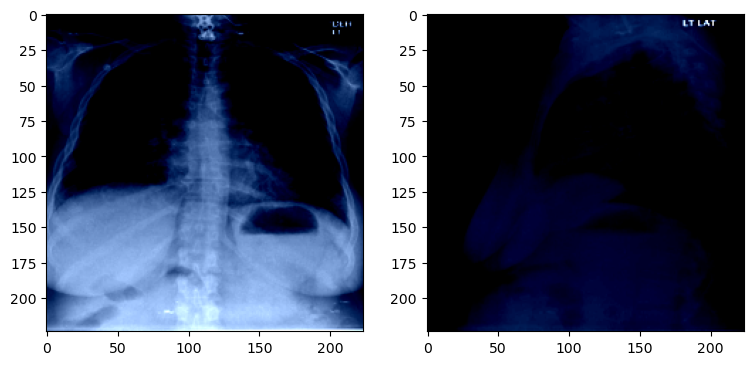

In [99]:
get_result(random.randint(1 , 400))

In [88]:
def rem_fullstops(text):
    '''Removes punctuations'''
    punctuations = '''.''' # full stop is not removed
    new_text = []
    for char in text:
        if char in punctuations: 
            text = text.replace(char, "")
    new_text.append(' '.join(e for e in text.split()))
    return new_text[0]

In [ ]:
from tqdm.notebook import tqdm

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = ' '.join(e for e in rep)
    
    pred_rep = greedysearch(img)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━

In [90]:
a = sum(bleu1)/X_cv.shape[0]
b = sum(bleu2)/X_cv.shape[0]
c = sum(bleu3)/X_cv.shape[0]
d = sum(bleu4)/X_cv.shape[0]

print('Bleu1 Score: ',a)
print('Bleu2 Score: ',b)
print('Bleu3 Score: ',c)
print('Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Blue score:",(a+b+c+d)/4)

Bleu1 Score:  0.25634586803613674
Bleu2 Score:  0.14024715859611814
Bleu3 Score:  0.08049220406351228
Bleu4 Score:  0.035317399126487146
-----------------------------------------------------------------------
Avg Blue score: 0.12810065745556357


In [91]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/128.0 kB ? eta -:--:--
   ---------------------------------------- 128.0/128.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34822 sha256=f6de9286aaf90df8423756a4f7f0813d049ac11253cb7ac04ce7ad6f9d8db6e6
  Stored in directory: c:\users\monik rayu\appdata\local\pip\cache\wheels\4f\d7\32\c6c9b7b05e852e920fd72174487be3a0f18e633a7adcc303be
Successfully built pandoc
